                                                                                                              Kelvin_Project
# PO Shopee x ULI Analysis

## Robotic Process Automation Project from PO Draft Shopee to Unilever

## MANUAL ACTION INSTRUCTIONS

1. If any update of pricelist & product hierarchy, should be update on Master Data.xlsx with sheet "Pricelist" from pricelist all category MT latest (file from Admin Ecomm) and sheet "Product Hierarchy" from latest Product Hierarchy according to COLUMN RULES
2. Delete the topmost/header column (number) on excel downloader from spreadsheet file Shopee (Unilever Catalog).xlsx so that the header is a column name for column mapping in the program -> REQUIRED. It can also delete all sheets except 'Updated Pricelist (LAZ SKU UPDA ' to reduce file size -> OPTIONAL then upload to file directory program as name Shopee (Unilever Catalog).xlsx
3. Update ANDROMEDA.xlsb day/day
4. Latest PC Mapping.xlsx update (not PC Mapping from S&OP) but PC Mapping file from Admin Ecomm -> MAKE SURE FILE PC MAPPING IS UP TO DATE AND NO ISSUES ON NEW MATERIAL MAPPING !
5. Update PODetail_Shopee.xlsx from portal web PO Draft Shopee
6. Rename output files according to processing date on toolbars "Edit -> Find and Replace", ex : 20D1_Final PO Shopee - ULI.xlsx
7. Run program on Toolbars "Kernel" then "Restart & Run All"
8. Wait until process is done then "Download FIle"

IMPORTANT REMARK :

DO NOT CHANGE, REPLACE OR DELETE ANY FUNCTION IN THIS WORKSHEET CODE WITHOUT CONSENT, IF ANY ERROR PLEASE DISCUSS !

In [1]:
import pandas as pd
import openpyxl
from openpyxl import load_workbook
from openpyxl.drawing.image import Image
from IPython.display import FileLink
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.simplefilter("ignore")
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
#deldata and update after processing -> done

In [3]:
delData = openpyxl.load_workbook('PO Shopee x ULI Template Processing.xlsx')

In [4]:
sheetPricelistJawaULI = delData['Pricelist Jawa']
delData.remove(sheetPricelistJawaULI)

In [5]:
sheetPricelistSumateraULI = delData['Pricelist Sumatera']
delData.remove(sheetPricelistSumateraULI)

In [6]:
sheetPricelistKalimantanULI = delData['Pricelist Kalimantan']
delData.remove(sheetPricelistKalimantanULI)

In [7]:
sheetPH = delData['Product Hierarchy']
delData.remove(sheetPH)

In [8]:
sheetPC = delData['PC Mapping']
delData.remove(sheetPC)

In [9]:
sheetPO = delData['podetail']
delData.remove(sheetPO)

In [10]:
sheetStock = delData['ANDROMEDA']
delData.remove(sheetStock)

In [11]:
sheetProses = 'proses'
if sheetProses in delData.sheetnames:
    delData.remove(delData[sheetProses])

In [12]:
delData.save('PO Shopee x ULI Template Processing.xlsx')

In [13]:
#define master data (PRICELIST ULI & PRODUCT HIERARCHY)

In [14]:
file_MasterData = 'Master Data.xlsx'

In [15]:
PricelistJawaULI = pd.read_excel(file_MasterData, sheet_name='Pricelist Jawa', usecols=['SKU', 'Harga terkini sebelum ppn per fib', 'Harga terkini sebelum ppn per satuan', 'Mulai'])

In [16]:
PricelistJawaULI['SKU'] = PricelistJawaULI['SKU'].astype(str)

In [17]:
PricelistJawaULI['Harga terkini sebelum ppn per fib'] = PricelistJawaULI['Harga terkini sebelum ppn per fib'].str.replace(',', '').astype(float)
PricelistJawaULI['Harga terkini sebelum ppn per satuan'] = PricelistJawaULI['Harga terkini sebelum ppn per satuan'].str.replace(',', '').astype(float)

In [18]:
PricelistJawaULI['Mulai'] = pd.to_datetime(PricelistJawaULI['Mulai'])

In [19]:
PricelistJawaULI.dtypes

SKU                                             object
Mulai                                   datetime64[ns]
Harga terkini sebelum ppn per fib              float64
Harga terkini sebelum ppn per satuan           float64
dtype: object

In [20]:
PricelistJawaULI.head()

SKU      Mulai  Harga terkini sebelum ppn per fib  \
0  67313235 2022-04-07                           455004.0   
1  68661383 2022-04-07                           560640.0   
2  67618111 2022-04-07                           811104.0   
3  67978023 2022-04-07                           455004.0   
4  68602340 2022-04-07                           372960.0   

   Harga terkini sebelum ppn per satuan  
0                               12639.0  
1                               11680.0  
2                               16898.0  
3                               12639.0  
4                                7770.0

In [21]:
with pd.ExcelWriter('PO Shopee x ULI Template Processing.xlsx', mode='a', engine='openpyxl') as writer:
    PricelistJawaULI.to_excel(writer, sheet_name='Pricelist Jawa', index=False)

In [22]:
PricelistSumateraULI = pd.read_excel(file_MasterData, sheet_name='Pricelist Sumatera', usecols=['SKU', 'Harga terkini sebelum ppn per fib', 'Harga terkini sebelum ppn per satuan', 'Mulai'])

In [23]:
PricelistSumateraULI['SKU'] = PricelistSumateraULI['SKU'].astype(str)

In [24]:
PricelistSumateraULI['Harga terkini sebelum ppn per fib'] = PricelistSumateraULI['Harga terkini sebelum ppn per fib'].str.replace(',', '').astype(float)
PricelistSumateraULI['Harga terkini sebelum ppn per satuan'] = PricelistSumateraULI['Harga terkini sebelum ppn per satuan'].str.replace(',', '').astype(float)

In [25]:
PricelistSumateraULI['Mulai'] = pd.to_datetime(PricelistSumateraULI['Mulai'])

In [26]:
PricelistSumateraULI.dtypes

SKU                                             object
Mulai                                   datetime64[ns]
Harga terkini sebelum ppn per fib              float64
Harga terkini sebelum ppn per satuan           float64
dtype: object

In [27]:
PricelistSumateraULI.head()

SKU      Mulai  Harga terkini sebelum ppn per fib  \
0  67313235 2022-04-07                           455004.0   
1  69583359 2022-04-07                           811104.0   
2  68392449 2022-04-07                           730680.0   
3  68838962 2022-04-07                           811104.0   
4  68630288 2022-04-07                           463272.0   

   Harga terkini sebelum ppn per satuan  
0                               12639.0  
1                               16898.0  
2                               30445.0  
3                               16898.0  
4                               19303.0

In [28]:
with pd.ExcelWriter('PO Shopee x ULI Template Processing.xlsx', mode='a', engine='openpyxl') as writer:
    PricelistSumateraULI.to_excel(writer, sheet_name='Pricelist Sumatera', index=False)

In [29]:
PricelistKalimantanULI = pd.read_excel(file_MasterData, sheet_name='Pricelist Kalimantan', usecols=['SKU', 'Harga terkini sebelum ppn per fib', 'Harga terkini sebelum ppn per satuan', 'Mulai'])

In [30]:
PricelistKalimantanULI['SKU'] = PricelistKalimantanULI['SKU'].astype(str)

In [31]:
PricelistKalimantanULI['Harga terkini sebelum ppn per fib'] = PricelistKalimantanULI['Harga terkini sebelum ppn per fib'].str.replace(',', '').astype(float)
PricelistKalimantanULI['Harga terkini sebelum ppn per satuan'] = PricelistKalimantanULI['Harga terkini sebelum ppn per satuan'].str.replace(',', '').astype(float)

In [32]:
PricelistKalimantanULI['Mulai'] = pd.to_datetime(PricelistKalimantanULI['Mulai'])

In [33]:
PricelistKalimantanULI.dtypes

SKU                                             object
Mulai                                   datetime64[ns]
Harga terkini sebelum ppn per fib              float64
Harga terkini sebelum ppn per satuan           float64
dtype: object

In [34]:
PricelistKalimantanULI.head()

SKU      Mulai  Harga terkini sebelum ppn per fib  \
0  68890469 2022-04-07                           455004.0   
1  69583359 2022-04-07                           811104.0   
2  67978023 2022-04-07                           455004.0   
3  68237829 2022-04-07                           463272.0   
4  68630288 2022-04-07                           463272.0   

   Harga terkini sebelum ppn per satuan  
0                               12639.0  
1                               16898.0  
2                               12639.0  
3                               19303.0  
4                               19303.0

In [35]:
with pd.ExcelWriter('PO Shopee x ULI Template Processing.xlsx', mode='a', engine='openpyxl') as writer:
    PricelistKalimantanULI.to_excel(writer, sheet_name='Pricelist Kalimantan', index=False)

In [36]:
ProductHierarchy = pd.read_excel(file_MasterData, sheet_name='Product Hierarchy')

In [37]:
with pd.ExcelWriter('PO Shopee x ULI Template Processing.xlsx', mode='a', engine='openpyxl') as writer:
    ProductHierarchy.to_excel(writer, sheet_name='Product Hierarchy', index=False)

In [38]:
#define PO Detail Shopee

In [39]:
POdetail = pd.read_excel('PODetail_Shopee.xls', sheet_name='podetail')

In [40]:
POdetail.dtypes

PR ID                                    object
Warehouse                                object
PR Creation Date                         object
Expected Inbound Date                    object
Shopee SKU ID                            object
Shopee SKU Name                          object
Is Gift                                  object
Shopee Requested Qty (unit)               int64
Supplier Confirmed Qty (unit)           float64
Shopee Requested Qty (pcs)                int64
Unit Name                                object
Shopee Request Price (before-tax)       float64
Shopee Request Price (after-tax)        float64
Supplier Confirmed Price (after-tax)    float64
Tax %                                     int64
Shopee Requested Value (before-tax)     float64
Shopee Requested Value (after-tax)      float64
Supplier SKU ID                           int64
Updated Supplier SKU ID                 float64
EAN / UPC                               float64
Updated EAN / UPC                       

In [41]:
POdetail.head()

PR ID Warehouse  PR Creation Date Expected Inbound Date  \
0  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
1  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
2  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
3  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
4  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   

              Shopee SKU ID  \
0   10117589613_76371252213   
1   11017589620_93375856941   
2   11524035063_36829020360   
3  11617589351_100965943068   
4    5094241986_56371299061   

                                     Shopee SKU Name Is Gift  \
0   Sariwangi Teh Hitam Kurma Madu 25 Kantung Celup:       N   
1  Jawara Saus Sambal Bawang Goreng Chili Sauce E...       N   
2  BANGO Kecap Manis Soy Sauce Refill Terbuat dar...       N   
3  Royco BUMBU KALDU Penyedap Makanan Penyedap Ra...       N   
4                        Royco Cream of Chicken 58g:       N   

   Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
0                           48                            NaN   
1                           24                            NaN   
2                           36                            NaN   
3                           24                            NaN   
4                           96                            NaN   

   Shopee Requested Qty (pcs) Unit Name  Shopee Request Price (before-tax)  \
0                          48       Pcs                            7500.43   
1                          24       Pcs                           10823.43   
2                          36       Pcs                           25935.71   
3                          24       Pcs                            7792.55   
4                          96       Pcs                            7163.45   

   Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
0                           8325.48                                   NaN   
1                          12014.01                                   NaN   
2                          28788.64                                   NaN   
3                           8649.73                                   NaN   
4                           7951.43                                   NaN   

   Tax %  Shopee Requested Value (before-tax)  \
0     11                            360020.64   
1     11                            259762.32   
2     11                            933685.56   
3     11                            187021.20   
4     11                            687691.20   

   Shopee Requested Value (after-tax)  Supplier SKU ID  \
0                           399622.91         68606031   
1                           288336.18         68165037   
2                          1036390.97         68689906   
3                           207593.53         69587286   
4                           763337.23         62019143   

   Updated Supplier SKU ID     EAN / UPC  Updated EAN / UPC  MOQ  Updated MOQ  \
0                      NaN  9.000000e+12                NaN   48          NaN   
1                      NaN  9.000000e+12                NaN   24          NaN   
2                      NaN  9.000000e+12                NaN    6          NaN   
3                      NaN  9.000000e+12                NaN   24          NaN   
4                      NaN  8.999999e+12                NaN   48          NaN   

  Sourcing Status  Updated Sourcing Status  Next Available Date  \
0       AVAILABLE                      NaN                  NaN   
1       AVAILABLE                      NaN                  NaN   
2       AVAILABLE                      NaN                  NaN   
3       AVAILABLE                      NaN                  NaN   
4       AVAILABLE                      NaN                  NaN   

   Updated Next Available Date Selling Type  
0                          NaN          Pcs  
1                          Na

In [42]:
POdetail = POdetail.rename(columns={'PO ID': 'Purchase Order Number', 'Expected Inbound Date': 'Request Delivery Date', 'Supplier SKU ID':  'PC Code', 'Shopee Requested Value (before-tax)': 'Total Value Shopee (excl VAT)', 'Shopee Requested Value (after-tax)': 'Total Value Shopee (incl VAT)'})

In [43]:
# Mengambil kolom 'PC Code'
pc_code_col = POdetail.pop('PC Code')

# Menyisipkan kolom 'PC Code' pada posisi terakhir
POdetail.insert(len(POdetail.columns), 'PC Code', pc_code_col)

In [44]:
POdetail.head()

PR ID Warehouse  PR Creation Date Request Delivery Date  \
0  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
1  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
2  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
3  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
4  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   

              Shopee SKU ID  \
0   10117589613_76371252213   
1   11017589620_93375856941   
2   11524035063_36829020360   
3  11617589351_100965943068   
4    5094241986_56371299061   

                                     Shopee SKU Name Is Gift  \
0   Sariwangi Teh Hitam Kurma Madu 25 Kantung Celup:       N   
1  Jawara Saus Sambal Bawang Goreng Chili Sauce E...       N   
2  BANGO Kecap Manis Soy Sauce Refill Terbuat dar...       N   
3  Royco BUMBU KALDU Penyedap Makanan Penyedap Ra...       N   
4                        Royco Cream of Chicken 58g:       N   

   Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
0                           48                            NaN   
1                           24                            NaN   
2                           36                            NaN   
3                           24                            NaN   
4                           96                            NaN   

   Shopee Requested Qty (pcs) Unit Name  Shopee Request Price (before-tax)  \
0                          48       Pcs                            7500.43   
1                          24       Pcs                           10823.43   
2                          36       Pcs                           25935.71   
3                          24       Pcs                            7792.55   
4                          96       Pcs                            7163.45   

   Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
0                           8325.48                                   NaN   
1                          12014.01                                   NaN   
2                          28788.64                                   NaN   
3                           8649.73                                   NaN   
4                           7951.43                                   NaN   

   Tax %  Total Value Shopee (excl VAT)  Total Value Shopee (incl VAT)  \
0     11                      360020.64                      399622.91   
1     11                      259762.32                      288336.18   
2     11                      933685.56                     1036390.97   
3     11                      187021.20                      207593.53   
4     11                      687691.20                      763337.23   

   Updated Supplier SKU ID     EAN / UPC  Updated EAN / UPC  MOQ  Updated MOQ  \
0                      NaN  9.000000e+12                NaN   48          NaN   
1                      NaN  9.000000e+12                NaN   24          NaN   
2                      NaN  9.000000e+12                NaN    6          NaN   
3                      NaN  9.000000e+12                NaN   24          NaN   
4                      NaN  8.999999e+12                NaN   48          NaN   

  Sourcing Status  Updated Sourcing Status  Next Available Date  \
0       AVAILABLE                      NaN                  NaN   
1       AVAILABLE                      NaN                  NaN   
2       AVAILABLE                      NaN                  NaN   
3       AVAILABLE                      NaN                  NaN   
4       AVAILABLE                      NaN                  NaN   

   Updated Next Available Date Selling Type   PC Code  
0                          NaN          Pcs  68606031  
1                          NaN          Pcs  68165037  
2                          NaN          Pcs  68689906  
3                          NaN          Pcs  69587286  
4                          NaN          

In [45]:
with pd.ExcelWriter('PO Shopee x ULI Template Processing.xlsx', mode='a', engine='openpyxl') as writer:
    POdetail.to_excel(writer, sheet_name='podetail', index=False)

In [46]:
#define PC mapping

In [47]:
PC_Mapping = pd.read_excel('PC Mapping.xlsx', sheet_name='PC Mapping')

In [48]:
PC_Mapping.head()

Old Material                           Old Description    Old Barcode  \
0     67153619  ZWITSAL SHP AVKS+HAIR LOT 36X(100+90)ML   8992694246340   
1     67093743  ZWITSAL SHP AVKS+HAIR LOT 36X(100+50)ML   8992694246340   
2     67306807  ZWITSAL SHP AVKS+ BARSOAP 36X(100ML+80G)  8992694246340   
3     67055098  ZWITSAL PWD SF FLORAL 12X360G             8999999057824   
4     67055100  ZWITSAL PWD MLK&HON 12X360G               8999999057831   

  New Material                         New Description    New Barcode  \
0     21023193  ZWITSAL BABY SHAMPOO NAT AVKS 6X6X100ML  8.992694e+12   
1     21023193  ZWITSAL BABY SHAMPOO NAT AVKS 6X6X100ML  8.992694e+12   
2     21023193  ZWITSAL BABY SHAMPOO NAT AVKS 6X6X100ML  8.992694e+12   
3     60024446     ZWITSAL BB PWD CLSC SOFT FLO 12X300G  8.992694e+12   
4     67494038     ZWITSAL BB NAT RICH HON PWD 12X300GR  8.992694e+12   

                     Remarks Asset Ready Price Ready Stock Availbility Update  \
0                          x         NaN         NaN               NaN    NaN   
1                          x         NaN         NaN               NaN    NaN   
2                          x         NaN         NaN               NaN    NaN   
3  Downfill - Change Barcode         NaN         NaN               NaN    NaN   
4  Downfill - Change Barcode         NaN         NaN               NaN    NaN   

  Recovery GDRIVE Unnamed: 13  
0      NaN    NaN         NaN  
1      NaN    NaN         NaN  
2      NaN    NaN         NaN  
3      NaN    NaN         NaN  
4      NaN    NaN         NaN

In [49]:
with pd.ExcelWriter('PO Shopee x ULI Template Processing.xlsx', mode='a', engine='openpyxl') as writer:
    PC_Mapping.to_excel(writer, sheet_name='PC Mapping', index=False)

In [50]:
#define andromeda

In [51]:
stock = pd.read_excel('ANDROMEDA.xlsb', sheet_name = 'Sheet1', engine='pyxlsb')

In [52]:
stock['uniquecode'] = stock[['Material', 'Plant']].apply(lambda x: ''.join(x.dropna().astype(str)), axis=1)

In [53]:
#Move Unicode Column to Left

In [54]:
move_uniquecode = stock.pop(stock.columns[-1]) #get data unicode

In [55]:
stock.insert(0, move_uniquecode.name, move_uniquecode) #paste data into left column

In [56]:
stock.head()

uniquecode IABBT  LT  Rank   EX Class  Min IPM  Avg IPM  Max IPM  \
0  200611659208    Z2  16     0  SBY   NaN      0.0      0.0      0.0   
1  200611689101    Z2   0     0  JKT   NaN      0.0      0.0      0.0   
2  200611709101    Z2   0     0  JKT   NaN      0.0      0.0      0.0   
3  200613959103    Z2   0     0  JKT   NaN      4.0      4.0      4.0   
4  200617799003    Z2   0     0  JKT   NaN      0.0      0.0      0.0   

  Activity Core / Non Core  Core MT  Material  \
0        0               0        0  20061165   
1        0               0        0  20061168   
2        0               0        0  20061170   
3        0               0        0  20061395   
4        0               0        0  20061779   

                           Description        Barcode  Plant  Stor Location  \
0  LIFEBUOY TS RED TTPR MP 24X(4X115G)  8999999700027   9208           9701   
1    MOLTO ULTRA SB GREEN REF 12X900ML  8999999000462   9101           9888   
2     MOLTO ULTRA SB BLUE REF 12X900ML  8999999000486   9101           9888   
3                   KNORR ROSTIP 6X1KG  8999999000868   9103           9901   
4       LIFEBUOY BW GREEN REF 24X250ML  8999999001100   9003           9005   

                lDesc  UU Stk  Safety Stk  Available  PA  QI Stock    IT  \
0            DC MEDAN     0.0           0        0.0   0       0.0  65.0   
1  Home Care Overflow     0.0           0       -7.0   0       0.0   0.0   
2  Home Care Overflow     0.0           0       -3.0   0       0.0   0.0   
3     UFSDC CIK Sound     0.0           0        0.0   0       0.0   0.0   
4      SKIN-BOF Local     0.0           0        0.0   0       0.0   0.0   

   IT This wk  IT Next wk  IT Two wk  STO Out  STO In  PSO  OTSD PSO  FNL SO  \
0           0           0       65.0        0       0    0         0       0   
1           0           0        0.0        0       0    0         0       0   
2           0           0        0.0        0       0    0         0       0   
3           0           0        0.0        0       0    0         0       0   
4           0           0        0.0        0       0    0         0       0   

   OSTD SO  FNL MT  OSTD MT  FNL GT  OSTD GT  RR_SO 13WK  RR_ACT 13 WK  \
0        0       0        0       0        0         0.0           0.0   
1        0       0        0       0        0         0.0           0.0   
2        0       0        0       0        0         0.0           0.0   
3        0       0        0       0        0         0.0           0.0   
4        0       0        0       0        0         0.0           0.0   

   RR_SO 5WK  RR_ACT 5WK  F WK1  F WK2  F WK3  F WK4  F WK5  \
0        0.0         0.0    0.0    0.0    0.0    0.0    0.0   
1        0.0         0.0    0.0    0.0    0.0    0.0    0.0   
2        0.0         0.0    0.0    0.0    0.0    0.0    0.0   
3        0.0         0.0    0.0    0.0    0.0    0.0    0.0   
4        0.0         0.0    0.0    0.0    0.0    0.0    0.0   

                SNP PLANNER  AVG FORECAST LOC Type          SUB CATEGORY  \
0     SKIN CLEANSING PW BAR           0.0        D        SKIN CLEANSING   
1          FABRIC ENHANCERS           0.0        D      FABRIC ENHANCERS   
2          FABRIC ENHANCERS           0.0        D      FABRIC ENHANCERS   
3      SCRATCH COOKING AIDS           0.0        M  SCRATCH COOKING AIDS   
4  SKIN CLEANSING PW LIQUID           0.0        F        SKIN CLEANSING   

   Blocked  WC BY RR  WC BY FORECAST  SAFETY RF Dispatching flag  \
0      0.0       0.0             0.0        0.0                X   
1      0.0       0.0             0.0        0.0              NaN   
2      0.0       0.0             0.0        0.0              NaN   
3      0.0       0.0             0.0        0.0              NaN   
4      0.0       0.0             0.0        0.0              NaN   

  Boughtin MDC flag              Category Mix Sub Division 2 Mix  
0               NaN     SKIN CLEANSING PW BAR      PERSONAL CARE  
1               NaN          FABRI

In [57]:
with pd.ExcelWriter('PO Shopee x ULI Template Processing.xlsx', mode='a', engine='openpyxl') as writer:
    stock.to_excel(writer, sheet_name='ANDROMEDA', index=False)

In [58]:
#processing

In [59]:
file_processing = 'PO Shopee x ULI Template Processing.xlsx'

In [60]:
df = pd.read_excel(file_processing, sheet_name='podetail')

In [61]:
jumlah_baris = df.shape[0]
print("Jumlah baris data Total:", jumlah_baris)

Jumlah baris data Total: 1923


In [62]:
df.head()

PR ID Warehouse  PR Creation Date Request Delivery Date  \
0  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
1  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
2  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
3  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
4  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   

              Shopee SKU ID  \
0   10117589613_76371252213   
1   11017589620_93375856941   
2   11524035063_36829020360   
3  11617589351_100965943068   
4    5094241986_56371299061   

                                     Shopee SKU Name Is Gift  \
0   Sariwangi Teh Hitam Kurma Madu 25 Kantung Celup:       N   
1  Jawara Saus Sambal Bawang Goreng Chili Sauce E...       N   
2  BANGO Kecap Manis Soy Sauce Refill Terbuat dar...       N   
3  Royco BUMBU KALDU Penyedap Makanan Penyedap Ra...       N   
4                        Royco Cream of Chicken 58g:       N   

   Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
0                           48                            NaN   
1                           24                            NaN   
2                           36                            NaN   
3                           24                            NaN   
4                           96                            NaN   

   Shopee Requested Qty (pcs) Unit Name  Shopee Request Price (before-tax)  \
0                          48       Pcs                            7500.43   
1                          24       Pcs                           10823.43   
2                          36       Pcs                           25935.71   
3                          24       Pcs                            7792.55   
4                          96       Pcs                            7163.45   

   Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
0                           8325.48                                   NaN   
1                          12014.01                                   NaN   
2                          28788.64                                   NaN   
3                           8649.73                                   NaN   
4                           7951.43                                   NaN   

   Tax %  Total Value Shopee (excl VAT)  Total Value Shopee (incl VAT)  \
0     11                      360020.64                      399622.91   
1     11                      259762.32                      288336.18   
2     11                      933685.56                     1036390.97   
3     11                      187021.20                      207593.53   
4     11                      687691.20                      763337.23   

   Updated Supplier SKU ID     EAN / UPC  Updated EAN / UPC  MOQ  Updated MOQ  \
0                      NaN  9.000000e+12                NaN   48          NaN   
1                      NaN  9.000000e+12                NaN   24          NaN   
2                      NaN  9.000000e+12                NaN    6          NaN   
3                      NaN  9.000000e+12                NaN   24          NaN   
4                      NaN  8.999999e+12                NaN   48          NaN   

  Sourcing Status  Updated Sourcing Status  Next Available Date  \
0       AVAILABLE                      NaN                  NaN   
1       AVAILABLE                      NaN                  NaN   
2       AVAILABLE                      NaN                  NaN   
3       AVAILABLE                      NaN                  NaN   
4       AVAILABLE                      NaN                  NaN   

   Updated Next Available Date Selling Type   PC Code  
0                          NaN          Pcs  68606031  
1                          NaN          Pcs  68165037  
2                          NaN          Pcs  68689906  
3                          NaN          Pcs  69587286  
4                          NaN          

In [63]:
df_ProductHierarchy = pd.read_excel(file_processing, sheet_name='Product Hierarchy')

In [64]:
df_ProductHierarchy.head()

SKU CODE                       SKU Description  PC/CS  Barcode Product (PC)
0  20060385  ROYCO FDS CHICKEN MULTIPCK 48X(6X8G)     48          8.999999e+12
1  20060386     ROYCO FDS BEEF MULTIPCK 48X(6X8G)     48          8.999999e+12
2  20060459         TARO NET POTATO FLAVOR 40X10G     40          8.999999e+12
3  20060461         TARO NET POTATO FLAVOR 24X40G     24          8.999999e+12
4  20060485    DOVE SHAMPOO DAILY THERAPY 960X6ML    960          9.000000e+12

In [65]:
df_ProductHierarchy.dtypes

SKU CODE                  int64
SKU Description          object
PC/CS                     int64
Barcode Product (PC)    float64
dtype: object

In [66]:
df['PC Code'] = df['PC Code'].astype(str)
df_ProductHierarchy['SKU CODE'] = df_ProductHierarchy['SKU CODE'].astype(str)

In [67]:
df = pd.merge(left=df, right=df_ProductHierarchy, how='left', left_on='PC Code', right_on='SKU CODE')

In [68]:
df = df.drop(columns=['SKU CODE'])

In [69]:
df = df.rename(columns={'PC/CS': 'Isi per Karton (UOM)', 'Barcode Product (PC)': 'Barcode PC Code' })

In [70]:
df.head()

PR ID Warehouse  PR Creation Date Request Delivery Date  \
0  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
1  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
2  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
3  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
4  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   

              Shopee SKU ID  \
0   10117589613_76371252213   
1   11017589620_93375856941   
2   11524035063_36829020360   
3  11617589351_100965943068   
4    5094241986_56371299061   

                                     Shopee SKU Name Is Gift  \
0   Sariwangi Teh Hitam Kurma Madu 25 Kantung Celup:       N   
1  Jawara Saus Sambal Bawang Goreng Chili Sauce E...       N   
2  BANGO Kecap Manis Soy Sauce Refill Terbuat dar...       N   
3  Royco BUMBU KALDU Penyedap Makanan Penyedap Ra...       N   
4                        Royco Cream of Chicken 58g:       N   

   Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
0                           48                            NaN   
1                           24                            NaN   
2                           36                            NaN   
3                           24                            NaN   
4                           96                            NaN   

   Shopee Requested Qty (pcs) Unit Name  Shopee Request Price (before-tax)  \
0                          48       Pcs                            7500.43   
1                          24       Pcs                           10823.43   
2                          36       Pcs                           25935.71   
3                          24       Pcs                            7792.55   
4                          96       Pcs                            7163.45   

   Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
0                           8325.48                                   NaN   
1                          12014.01                                   NaN   
2                          28788.64                                   NaN   
3                           8649.73                                   NaN   
4                           7951.43                                   NaN   

   Tax %  Total Value Shopee (excl VAT)  Total Value Shopee (incl VAT)  \
0     11                      360020.64                      399622.91   
1     11                      259762.32                      288336.18   
2     11                      933685.56                     1036390.97   
3     11                      187021.20                      207593.53   
4     11                      687691.20                      763337.23   

   Updated Supplier SKU ID     EAN / UPC  Updated EAN / UPC  MOQ  Updated MOQ  \
0                      NaN  9.000000e+12                NaN   48          NaN   
1                      NaN  9.000000e+12                NaN   24          NaN   
2                      NaN  9.000000e+12                NaN    6          NaN   
3                      NaN  9.000000e+12                NaN   24          NaN   
4                      NaN  8.999999e+12                NaN   48          NaN   

  Sourcing Status  Updated Sourcing Status  Next Available Date  \
0       AVAILABLE                      NaN                  NaN   
1       AVAILABLE                      NaN                  NaN   
2       AVAILABLE                      NaN                  NaN   
3       AVAILABLE                      NaN                  NaN   
4       AVAILABLE                      NaN                  NaN   

   Updated Next Available Date Selling Type   PC Code  \
0                          NaN          Pcs  68606031   
1                          NaN          Pcs  68165037   
2                          NaN          Pcs  68689906   
3                          NaN          Pcs  69587286   
4                          NaN     

In [71]:
#column SKU pengganti or not

In [72]:
df_PCMapping = pd.read_excel(file_processing, sheet_name='PC Mapping', usecols=['Old Material', 'New Material', 'New Description ', 'Remarks'])

In [73]:
df_PCMapping.head()

Old Material New Material                         New Description   \
0     67153619     21023193  ZWITSAL BABY SHAMPOO NAT AVKS 6X6X100ML   
1     67093743     21023193  ZWITSAL BABY SHAMPOO NAT AVKS 6X6X100ML   
2     67306807     21023193  ZWITSAL BABY SHAMPOO NAT AVKS 6X6X100ML   
3     67055098     60024446     ZWITSAL BB PWD CLSC SOFT FLO 12X300G   
4     67055100     67494038     ZWITSAL BB NAT RICH HON PWD 12X300GR   

                     Remarks  
0                          x  
1                          x  
2                          x  
3  Downfill - Change Barcode  
4  Downfill - Change Barcode

In [74]:
df_PCMapping.dtypes

Old Material        object
New Material        object
New Description     object
Remarks             object
dtype: object

In [75]:
df = pd.merge(left=df, right=df_PCMapping, how='left', left_on='PC Code', right_on='Old Material')

In [76]:
df.head()

PR ID Warehouse  PR Creation Date Request Delivery Date  \
0  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
1  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
2  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
3  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
4  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   

              Shopee SKU ID  \
0   10117589613_76371252213   
1   11017589620_93375856941   
2   11524035063_36829020360   
3  11617589351_100965943068   
4    5094241986_56371299061   

                                     Shopee SKU Name Is Gift  \
0   Sariwangi Teh Hitam Kurma Madu 25 Kantung Celup:       N   
1  Jawara Saus Sambal Bawang Goreng Chili Sauce E...       N   
2  BANGO Kecap Manis Soy Sauce Refill Terbuat dar...       N   
3  Royco BUMBU KALDU Penyedap Makanan Penyedap Ra...       N   
4                        Royco Cream of Chicken 58g:       N   

   Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
0                           48                            NaN   
1                           24                            NaN   
2                           36                            NaN   
3                           24                            NaN   
4                           96                            NaN   

   Shopee Requested Qty (pcs) Unit Name  Shopee Request Price (before-tax)  \
0                          48       Pcs                            7500.43   
1                          24       Pcs                           10823.43   
2                          36       Pcs                           25935.71   
3                          24       Pcs                            7792.55   
4                          96       Pcs                            7163.45   

   Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
0                           8325.48                                   NaN   
1                          12014.01                                   NaN   
2                          28788.64                                   NaN   
3                           8649.73                                   NaN   
4                           7951.43                                   NaN   

   Tax %  Total Value Shopee (excl VAT)  Total Value Shopee (incl VAT)  \
0     11                      360020.64                      399622.91   
1     11                      259762.32                      288336.18   
2     11                      933685.56                     1036390.97   
3     11                      187021.20                      207593.53   
4     11                      687691.20                      763337.23   

   Updated Supplier SKU ID     EAN / UPC  Updated EAN / UPC  MOQ  Updated MOQ  \
0                      NaN  9.000000e+12                NaN   48          NaN   
1                      NaN  9.000000e+12                NaN   24          NaN   
2                      NaN  9.000000e+12                NaN    6          NaN   
3                      NaN  9.000000e+12                NaN   24          NaN   
4                      NaN  8.999999e+12                NaN   48          NaN   

  Sourcing Status  Updated Sourcing Status  Next Available Date  \
0       AVAILABLE                      NaN                  NaN   
1       AVAILABLE                      NaN                  NaN   
2       AVAILABLE                      NaN                  NaN   
3       AVAILABLE                      NaN                  NaN   
4       AVAILABLE                      NaN                  NaN   

   Updated Next Available Date Selling Type   PC Code  \
0                          NaN          Pcs  68606031   
1                          NaN          Pcs  68165037   
2                          NaN          Pcs  68689906   
3                          NaN          Pcs  69587286   
4                          NaN     

In [77]:
df = df.rename(columns={'Remarks': 'Remarks New Material', 'New Description ': 'New Description'})

In [78]:
df = df.drop(columns=['Old Material'])

In [334]:
df_ProductHierarchy.head()

SKU CODE                       SKU Description  PC/CS  Barcode Product (PC)
0  20060385  ROYCO FDS CHICKEN MULTIPCK 48X(6X8G)     48          8.999999e+12
1  20060386     ROYCO FDS BEEF MULTIPCK 48X(6X8G)     48          8.999999e+12
2  20060459         TARO NET POTATO FLAVOR 40X10G     40          8.999999e+12
3  20060461         TARO NET POTATO FLAVOR 24X40G     24          8.999999e+12
4  20060485    DOVE SHAMPOO DAILY THERAPY 960X6ML    960          9.000000e+12

In [79]:
df = pd.merge(left=df, right=df_ProductHierarchy, how='left', left_on='New Material', right_on='SKU CODE')

In [80]:
df = df.drop(columns=['SKU CODE', 'SKU Description_y', 'PC/CS'])

In [81]:
df = df.rename(columns={'SKU Description_x': 'SKU Description', 'Barcode Product (PC)': 'Barcode New Material'})

In [82]:
df.head(50)

PR ID Warehouse  PR Creation Date Request Delivery Date  \
0   PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
1   PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
2   PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
3   PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
4   PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
5   PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
6   PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
7   PRIDORIDK202306080436       IDK  2023-06-08 19:07      2023-06-16 01:00   
8   PRIDORIDK202306080436       IDK  2023-06-08 19:07      2023-06-16 01:00   
9   PRIDORIDK202306080436       IDK  2023-06-08 19:07      2023-06-16 01:00   
10  PRIDORIDK202306080436       IDK  2023-06-08 19:07      2023-06-16 01:00   
11  PRIDORIDK202306080436       IDK  2023-06-08 19:07      2023-06-16 01:00   
12  PRIDORIDK202306080436       IDK  2023-06-08 19:07      2023-06-16 01:00   
13  PRIDORIDK202306080436       IDK  2023-06-08 19:07      2023-06-16 01:00   
14  PRIDORIDK202306080436       IDK  2023-06-08 19:07      2023-06-16 01:00   
15  PRIDORIDK202306080436       IDK  2023-06-08 19:07      2023-06-16 01:00   
16  PRIDORIDK202306080436       IDK  2023-06-08 19:07      2023-06-16 01:00   
17  PRIDORIDK202306080436       IDK  2023-06-08 19:07      2023-06-16 01:00   
18  PRIDORIDK202306080436       IDK  2023-06-08 19:07      2023-06-16 01:00   
19  PRIDORIDK202306080436       IDK  2023-06-08 19:07      2023-06-16 01:00   
20  PRIDORIDK202306080436       IDK  2023-06-08 19:07      2023-06-16 01:00   
21  PRIDORIDK202306080436       IDK  2023-06-08 19:07      2023-06-16 01:00   
22  PRIDORIDK202306080436       IDK  2023-06-08 19:07      2023-06-16 01:00   
23  PRIDORIDK202306080436       IDK  2023-06-08 19:07      2023-06-16 01:00   
24  PRIDORIDK202306080436       IDK  2023-06-08 19:07      2023-06-16 01:00   
25  PRIDORIDK202306080436       IDK  2023-06-08 19:07      2023-06-16 01:00   
26  PRIDORIDK202306080436       IDK  2023-06-08 19:07      2023-06-16 01:00   
27  PRIDORIDK202306080436       IDK  2023-06-08 19:07      2023-06-16 01:00   
28  PRIDORIDK202306080435       IDK  2023-06-08 19:07      2023-06-16 01:00   
29  PRIDORIDK202306080435       IDK  2023-06-08 19:07      2023-06-16 01:00   
30  PRIDORIDK202306080435       IDK  2023-06-08 19:07      2023-06-16 01:00   
31  PRIDORIDK202306080435       IDK  2023-06-08 19:07      2023-06-16 01:00   
32  PRIDORIDK202306080435       IDK  2023-06-08 19:07      2023-06-16 01:00   
33  PRIDORIDK202306080435       IDK  2023-06-08 19:07      2023-06-16 01:00   
34  PRIDORIDK202306080435       IDK  2023-06-08 19:07      2023-06-16 01:00   
35  PRIDORIDK202306080435       IDK  2023-06-08 19:07      2023-06-16 01:00   
36  PRIDORIDK202306080438       IDK  2023-06-08 19:11      2023-06-16 01:00   
37  PRIDORIDK202306080438       IDK  2023-06-08 19:11      2023-06-16 01:00   
38  PRIDORIDK202306080438       IDK  2023-06-08 19:11      2023-06-16 01:00   
39  PRIDORIDK202306080438       IDK  2023-06-08 19:11      2023-06-16 01:00   
40  PRIDORIDK202306080438       IDK  2023-06-08 19:11      2023-06-16 01:00   
41  PRIDORIDK202306080438       IDK  2023-06-08 19:11      2023-06-16 01:00   
42  PRIDORIDK202306080438       IDK  2023-06-08 19:11      2023-06-16 01:00   
43  PRIDORIDK202306080438       IDK  2023-06-08 19:11      2023-06-16 01:00   
44  PRIDORIDK202306080438       IDK  2023-06-08 19:11      2023-06-16 01:00   
45  PRIDORIDK202306080438       IDK  2023-06-08 19:11      2023-06-16 01:00   
46  PRIDORIDK202306080438       IDK  2023-06-08 19:11      2023-06-16 01:00   
47  PRIDORIDK202306080438       IDK  2023-06-08 19:11      2023-06-16 01:00   
48  PRIDORIDK202306080438       IDK  2023-06-08 19:11      2023-06-16 01:00   
49  PRIDORIDK202306080438       IDK  2023-06-08 19:11      2023-06-16 

In [83]:
jumlah_baris = df.shape[0]
print("Jumlah baris data Total:", jumlah_baris)

Jumlah baris data Total: 1947


In [84]:
#duplicate fix -> on going

In [85]:
duplicate_rows = df[df.duplicated(['PR ID', 'Warehouse', 'PR Creation Date', 'PC Code', 'Shopee Requested Qty (pcs)', 'Shopee SKU ID'], keep=False)]
duplicate_rows.sort_values(by=['PR ID', 'Warehouse', 'PR Creation Date', 'PC Code', 'Shopee Requested Qty (pcs)', 'Shopee SKU ID'], inplace=True)

duplicate_rows

PR ID Warehouse  PR Creation Date  \
728   PRIDORIDDPR1202306080463    IDDPR1  2023-06-08 19:20   
900   PRIDORIDDPR1202306080463    IDDPR1  2023-06-08 19:20   
729   PRIDORIDDPR1202306080463    IDDPR1  2023-06-08 19:20   
901   PRIDORIDDPR1202306080463    IDDPR1  2023-06-08 19:20   
725   PRIDORIDDPR1202306080463    IDDPR1  2023-06-08 19:20   
897   PRIDORIDDPR1202306080463    IDDPR1  2023-06-08 19:20   
726   PRIDORIDDPR1202306080463    IDDPR1  2023-06-08 19:20   
898   PRIDORIDDPR1202306080463    IDDPR1  2023-06-08 19:20   
727   PRIDORIDDPR1202306080463    IDDPR1  2023-06-08 19:20   
899   PRIDORIDDPR1202306080463    IDDPR1  2023-06-08 19:20   
894   PRIDORIDDPR1202306080464    IDDPR1  2023-06-08 19:20   
895   PRIDORIDDPR1202306080464    IDDPR1  2023-06-08 19:20   
720   PRIDORIDDPR1202306080465    IDDPR1  2023-06-08 19:20   
909   PRIDORIDDPR1202306080465    IDDPR1  2023-06-08 19:20   
714   PRIDORIDDPR1202306080465    IDDPR1  2023-06-08 19:20   
903   PRIDORIDDPR1202306080465    IDDPR1  2023-06-08 19:20   
715   PRIDORIDDPR1202306080465    IDDPR1  2023-06-08 19:20   
904   PRIDORIDDPR1202306080465    IDDPR1  2023-06-08 19:20   
719   PRIDORIDDPR1202306080465    IDDPR1  2023-06-08 19:20   
908   PRIDORIDDPR1202306080465    IDDPR1  2023-06-08 19:20   
713   PRIDORIDDPR1202306080465    IDDPR1  2023-06-08 19:20   
902   PRIDORIDDPR1202306080465    IDDPR1  2023-06-08 19:20   
722   PRIDORIDDPR1202306080465    IDDPR1  2023-06-08 19:20   
911   PRIDORIDDPR1202306080465    IDDPR1  2023-06-08 19:20   
724   PRIDORIDDPR1202306080465    IDDPR1  2023-06-08 19:20   
913   PRIDORIDDPR1202306080465    IDDPR1  2023-06-08 19:20   
718   PRIDORIDDPR1202306080465    IDDPR1  2023-06-08 19:20   
907   PRIDORIDDPR1202306080465    IDDPR1  2023-06-08 19:20   
723   PRIDORIDDPR1202306080465    IDDPR1  2023-06-08 19:20   
912   PRIDORIDDPR1202306080465    IDDPR1  2023-06-08 19:20   
716   PRIDORIDDPR1202306080465    IDDPR1  2023-06-08 19:20   
905   PRIDORIDDPR1202306080465    IDDPR1  2023-06-08 19:20   
721   PRIDORIDDPR1202306080465    IDDPR1  2023-06-08 19:20   
910   PRIDORIDDPR1202306080465    IDDPR1  2023-06-08 19:20   
717   PRIDORIDDPR1202306080465    IDDPR1  2023-06-08 19:20   
906   PRIDORIDDPR1202306080465    IDDPR1  2023-06-08 19:20   
691   PRIDORIDDPR1202306080466    IDDPR1  2023-06-08 19:20   
922   PRIDORIDDPR1202306080466    IDDPR1  2023-06-08 19:20   
693   PRIDORIDDPR1202306080466    IDDPR1  2023-06-08 19:20   
924   PRIDORIDDPR1202306080466    IDDPR1  2023-06-08 19:20   
687   PRIDORIDDPR1202306080466    IDDPR1  2023-06-08 19:20   
918   PRIDORIDDPR1202306080466    IDDPR1  2023-06-08 19:20   
694   PRIDORIDDPR1202306080466    IDDPR1  2023-06-08 19:20   
925   PRIDORIDDPR1202306080466    IDDPR1  2023-06-08 19:20   
708   PRIDORIDDPR1202306080466    IDDPR1  2023-06-08 19:20   
939   PRIDORIDDPR1202306080466    IDDPR1  2023-06-08 19:20   
684   PRIDORIDDPR1202306080466    IDDPR1  2023-06-08 19:20   
915   PRIDORIDDPR1202306080466    IDDPR1  2023-06-08 19:20   
711   PRIDORIDDPR1202306080466    IDDPR1  2023-06-08 19:20   
942   PRIDORIDDPR1202306080466    IDDPR1  2023-06-08 19:20   
710   PRIDORIDDPR1202306080466    IDDPR1  2023-06-08 19:20   
941   PRIDORIDDPR1202306080466    IDDPR1  2023-06-08 19:20   
685   PRIDORIDDPR1202306080466    IDDPR1  2023-06-08 19:20   
916   PRIDORIDDPR1202306080466    IDDPR1  2023-06-08 19:20   
712   PRIDORIDDPR1202306080466    IDDPR1  2023-06-08 19:20   
943   PRIDORIDDPR1202306080466    IDDPR1  2023-06-08 19:20   
689   PRIDORIDDPR1202306080466    IDDPR1  2023-06-08 19:20   
920   PRIDORIDDPR1202306080466    IDDPR1  2023-06-08 19:20   
683   PRIDORIDDPR1202306080466    IDDPR1  2023-06-08 19:20   
914   PRIDORIDDPR1202306080466    IDDPR1  2023-06-08 19:20   
697   PRIDORIDDPR1202306080466    IDDPR1  2023-06-08 19:20   
928   PRIDORIDDPR1202306080466    IDDPR1  2023-06-08 19:20   
699   PRIDORIDDPR1202306080466    IDDPR1  2023-06-08 19:20   
930   PRIDORIDDPR1202306080466    IDDPR1  2023-06-08 19:2

In [86]:
jumlah_duplikasi = duplicate_rows.shape[0]
print("Jumlah baris data Total:", jumlah_duplikasi)

Jumlah baris data Total: 634


In [87]:
#column per fib & per satuan

In [88]:
#mapping pricelist jawa, sumatera, kalimantan

In [89]:
df.dtypes

PR ID                                    object
Warehouse                                object
PR Creation Date                         object
Request Delivery Date                    object
Shopee SKU ID                            object
Shopee SKU Name                          object
Is Gift                                  object
Shopee Requested Qty (unit)               int64
Supplier Confirmed Qty (unit)           float64
Shopee Requested Qty (pcs)                int64
Unit Name                                object
Shopee Request Price (before-tax)       float64
Shopee Request Price (after-tax)        float64
Supplier Confirmed Price (after-tax)    float64
Tax %                                     int64
Total Value Shopee (excl VAT)           float64
Total Value Shopee (incl VAT)           float64
Updated Supplier SKU ID                 float64
EAN / UPC                               float64
Updated EAN / UPC                       float64
MOQ                                     

In [90]:
pricelist_jawa = pd.read_excel(file_processing, sheet_name='Pricelist Jawa', usecols = ['SKU', 'Mulai', 'Harga terkini sebelum ppn per fib', 'Harga terkini sebelum ppn per satuan'])

In [91]:
pricelist_jawa['SKU'] = pricelist_jawa['SKU'].astype(str)

In [92]:
pricelist_jawa.dtypes

SKU                                             object
Mulai                                   datetime64[ns]
Harga terkini sebelum ppn per fib                int64
Harga terkini sebelum ppn per satuan             int64
dtype: object

In [93]:
pricelist_jawa.head()

SKU      Mulai  Harga terkini sebelum ppn per fib  \
0  67313235 2022-04-07                             455004   
1  68661383 2022-04-07                             560640   
2  67618111 2022-04-07                             811104   
3  67978023 2022-04-07                             455004   
4  68602340 2022-04-07                             372960   

   Harga terkini sebelum ppn per satuan  
0                                 12639  
1                                 11680  
2                                 16898  
3                                 12639  
4                                  7770

In [94]:
pricelist_sumatera = pd.read_excel(file_processing, sheet_name='Pricelist Sumatera', usecols = ['SKU', 'Mulai', 'Harga terkini sebelum ppn per fib', 'Harga terkini sebelum ppn per satuan'])

In [95]:
pricelist_sumatera['SKU'] = pricelist_sumatera['SKU'].astype(str)

In [96]:
pricelist_sumatera.dtypes

SKU                                             object
Mulai                                   datetime64[ns]
Harga terkini sebelum ppn per fib                int64
Harga terkini sebelum ppn per satuan             int64
dtype: object

In [97]:
pricelist_sumatera.head()

SKU      Mulai  Harga terkini sebelum ppn per fib  \
0  67313235 2022-04-07                             455004   
1  69583359 2022-04-07                             811104   
2  68392449 2022-04-07                             730680   
3  68838962 2022-04-07                             811104   
4  68630288 2022-04-07                             463272   

   Harga terkini sebelum ppn per satuan  
0                                 12639  
1                                 16898  
2                                 30445  
3                                 16898  
4                                 19303

In [98]:
pricelist_kalimantan = pd.read_excel(file_processing, sheet_name='Pricelist Kalimantan', usecols = ['SKU', 'Mulai', 'Harga terkini sebelum ppn per fib', 'Harga terkini sebelum ppn per satuan'])

In [99]:
pricelist_kalimantan['SKU'] = pricelist_kalimantan['SKU'].astype(str)

In [100]:
pricelist_kalimantan.dtypes

SKU                                             object
Mulai                                   datetime64[ns]
Harga terkini sebelum ppn per fib                int64
Harga terkini sebelum ppn per satuan             int64
dtype: object

In [101]:
pricelist_kalimantan.head()

SKU      Mulai  Harga terkini sebelum ppn per fib  \
0  68890469 2022-04-07                             455004   
1  69583359 2022-04-07                             811104   
2  67978023 2022-04-07                             455004   
3  68237829 2022-04-07                             463272   
4  68630288 2022-04-07                             463272   

   Harga terkini sebelum ppn per satuan  
0                                 12639  
1                                 16898  
2                                 12639  
3                                 19303  
4                                 19303

In [102]:
df.head()

PR ID Warehouse  PR Creation Date Request Delivery Date  \
0  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
1  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
2  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
3  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
4  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   

              Shopee SKU ID  \
0   10117589613_76371252213   
1   11017589620_93375856941   
2   11524035063_36829020360   
3  11617589351_100965943068   
4    5094241986_56371299061   

                                     Shopee SKU Name Is Gift  \
0   Sariwangi Teh Hitam Kurma Madu 25 Kantung Celup:       N   
1  Jawara Saus Sambal Bawang Goreng Chili Sauce E...       N   
2  BANGO Kecap Manis Soy Sauce Refill Terbuat dar...       N   
3  Royco BUMBU KALDU Penyedap Makanan Penyedap Ra...       N   
4                        Royco Cream of Chicken 58g:       N   

   Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
0                           48                            NaN   
1                           24                            NaN   
2                           36                            NaN   
3                           24                            NaN   
4                           96                            NaN   

   Shopee Requested Qty (pcs) Unit Name  Shopee Request Price (before-tax)  \
0                          48       Pcs                            7500.43   
1                          24       Pcs                           10823.43   
2                          36       Pcs                           25935.71   
3                          24       Pcs                            7792.55   
4                          96       Pcs                            7163.45   

   Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
0                           8325.48                                   NaN   
1                          12014.01                                   NaN   
2                          28788.64                                   NaN   
3                           8649.73                                   NaN   
4                           7951.43                                   NaN   

   Tax %  Total Value Shopee (excl VAT)  Total Value Shopee (incl VAT)  \
0     11                      360020.64                      399622.91   
1     11                      259762.32                      288336.18   
2     11                      933685.56                     1036390.97   
3     11                      187021.20                      207593.53   
4     11                      687691.20                      763337.23   

   Updated Supplier SKU ID     EAN / UPC  Updated EAN / UPC  MOQ  Updated MOQ  \
0                      NaN  9.000000e+12                NaN   48          NaN   
1                      NaN  9.000000e+12                NaN   24          NaN   
2                      NaN  9.000000e+12                NaN    6          NaN   
3                      NaN  9.000000e+12                NaN   24          NaN   
4                      NaN  8.999999e+12                NaN   48          NaN   

  Sourcing Status  Updated Sourcing Status  Next Available Date  \
0       AVAILABLE                      NaN                  NaN   
1       AVAILABLE                      NaN                  NaN   
2       AVAILABLE                      NaN                  NaN   
3       AVAILABLE                      NaN                  NaN   
4       AVAILABLE                      NaN                  NaN   

   Updated Next Available Date Selling Type   PC Code  \
0                          NaN          Pcs  68606031   
1                          NaN          Pcs  68165037   
2                          NaN          Pcs  68689906   
3                          NaN          Pcs  69587286   
4                          NaN     

In [103]:
# lookup 3 df

In [104]:
def merge_price_list(df, pricelist):
    pricelist_dfs = []

    pricelist_dfs.append(pricelist[['SKU', 'Mulai', 'Harga terkini sebelum ppn per fib', 'Harga terkini sebelum ppn per satuan']])

    if pricelist_dfs:
        merged_df = pd.concat(pricelist_dfs)
        merged_df['SKU'] = merged_df['SKU'].astype(str)
        df['PC Code'] = df['PC Code'].astype(str)
        df = pd.merge(df, merged_df, how='left', left_on='PC Code', right_on='SKU')

    return df


# Filter dan mapping ke Jawa
df_jawa = df[df['Warehouse'].isin(['IDL', 'IDS', 'IDR', 'IDDPR1'])]
if not df_jawa.empty:
    pricelist_jawa = pd.read_excel(file_processing, sheet_name='Pricelist Jawa')
    df_jawa = df_jawa.copy()
    df_jawa.reset_index(drop=True, inplace=True)
    df_jawa = merge_price_list(df_jawa, pricelist_jawa)


# Filter dan mapping ke Sumatera
df_sumatera = df[df['Warehouse'].isin(['IDM', 'IDP', 'IDPBR1'])]
if not df_sumatera.empty:
    pricelist_sumatera = pd.read_excel(file_processing, sheet_name='Pricelist Sumatera')
    df_sumatera = df_sumatera.copy()
    df_sumatera.reset_index(drop=True, inplace=True)
    df_sumatera = merge_price_list(df_sumatera, pricelist_sumatera)


# Filter dan mapping ke Kalimantan
df_kalimantan = df[df['Warehouse'].isin(['IDK', 'IDN'])]
if not df_kalimantan.empty:
    pricelist_kalimantan = pd.read_excel(file_processing, sheet_name='Pricelist Kalimantan')
    df_kalimantan = df_kalimantan.copy()
    df_kalimantan.reset_index(drop=True, inplace=True)
    df_kalimantan = merge_price_list(df_kalimantan, pricelist_kalimantan)


In [105]:
jumlah_baris = df.shape[0]
print("Jumlah baris data Total:", jumlah_baris)

Jumlah baris data Total: 1947


In [106]:
df.head()

PR ID Warehouse  PR Creation Date Request Delivery Date  \
0  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
1  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
2  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
3  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
4  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   

              Shopee SKU ID  \
0   10117589613_76371252213   
1   11017589620_93375856941   
2   11524035063_36829020360   
3  11617589351_100965943068   
4    5094241986_56371299061   

                                     Shopee SKU Name Is Gift  \
0   Sariwangi Teh Hitam Kurma Madu 25 Kantung Celup:       N   
1  Jawara Saus Sambal Bawang Goreng Chili Sauce E...       N   
2  BANGO Kecap Manis Soy Sauce Refill Terbuat dar...       N   
3  Royco BUMBU KALDU Penyedap Makanan Penyedap Ra...       N   
4                        Royco Cream of Chicken 58g:       N   

   Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
0                           48                            NaN   
1                           24                            NaN   
2                           36                            NaN   
3                           24                            NaN   
4                           96                            NaN   

   Shopee Requested Qty (pcs) Unit Name  Shopee Request Price (before-tax)  \
0                          48       Pcs                            7500.43   
1                          24       Pcs                           10823.43   
2                          36       Pcs                           25935.71   
3                          24       Pcs                            7792.55   
4                          96       Pcs                            7163.45   

   Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
0                           8325.48                                   NaN   
1                          12014.01                                   NaN   
2                          28788.64                                   NaN   
3                           8649.73                                   NaN   
4                           7951.43                                   NaN   

   Tax %  Total Value Shopee (excl VAT)  Total Value Shopee (incl VAT)  \
0     11                      360020.64                      399622.91   
1     11                      259762.32                      288336.18   
2     11                      933685.56                     1036390.97   
3     11                      187021.20                      207593.53   
4     11                      687691.20                      763337.23   

   Updated Supplier SKU ID     EAN / UPC  Updated EAN / UPC  MOQ  Updated MOQ  \
0                      NaN  9.000000e+12                NaN   48          NaN   
1                      NaN  9.000000e+12                NaN   24          NaN   
2                      NaN  9.000000e+12                NaN    6          NaN   
3                      NaN  9.000000e+12                NaN   24          NaN   
4                      NaN  8.999999e+12                NaN   48          NaN   

  Sourcing Status  Updated Sourcing Status  Next Available Date  \
0       AVAILABLE                      NaN                  NaN   
1       AVAILABLE                      NaN                  NaN   
2       AVAILABLE                      NaN                  NaN   
3       AVAILABLE                      NaN                  NaN   
4       AVAILABLE                      NaN                  NaN   

   Updated Next Available Date Selling Type   PC Code  \
0                          NaN          Pcs  68606031   
1                          NaN          Pcs  68165037   
2                          NaN          Pcs  68689906   
3                          NaN          Pcs  69587286   
4                          NaN     

In [107]:
df_kalimantan.head()

PR ID Warehouse  PR Creation Date Request Delivery Date  \
0  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
1  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
2  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
3  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
4  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   

              Shopee SKU ID  \
0   10117589613_76371252213   
1   11017589620_93375856941   
2   11524035063_36829020360   
3  11617589351_100965943068   
4    5094241986_56371299061   

                                     Shopee SKU Name Is Gift  \
0   Sariwangi Teh Hitam Kurma Madu 25 Kantung Celup:       N   
1  Jawara Saus Sambal Bawang Goreng Chili Sauce E...       N   
2  BANGO Kecap Manis Soy Sauce Refill Terbuat dar...       N   
3  Royco BUMBU KALDU Penyedap Makanan Penyedap Ra...       N   
4                        Royco Cream of Chicken 58g:       N   

   Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
0                           48                            NaN   
1                           24                            NaN   
2                           36                            NaN   
3                           24                            NaN   
4                           96                            NaN   

   Shopee Requested Qty (pcs) Unit Name  Shopee Request Price (before-tax)  \
0                          48       Pcs                            7500.43   
1                          24       Pcs                           10823.43   
2                          36       Pcs                           25935.71   
3                          24       Pcs                            7792.55   
4                          96       Pcs                            7163.45   

   Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
0                           8325.48                                   NaN   
1                          12014.01                                   NaN   
2                          28788.64                                   NaN   
3                           8649.73                                   NaN   
4                           7951.43                                   NaN   

   Tax %  Total Value Shopee (excl VAT)  Total Value Shopee (incl VAT)  \
0     11                      360020.64                      399622.91   
1     11                      259762.32                      288336.18   
2     11                      933685.56                     1036390.97   
3     11                      187021.20                      207593.53   
4     11                      687691.20                      763337.23   

   Updated Supplier SKU ID     EAN / UPC  Updated EAN / UPC  MOQ  Updated MOQ  \
0                      NaN  9.000000e+12                NaN   48          NaN   
1                      NaN  9.000000e+12                NaN   24          NaN   
2                      NaN  9.000000e+12                NaN    6          NaN   
3                      NaN  9.000000e+12                NaN   24          NaN   
4                      NaN  8.999999e+12                NaN   48          NaN   

  Sourcing Status  Updated Sourcing Status  Next Available Date  \
0       AVAILABLE                      NaN                  NaN   
1       AVAILABLE                      NaN                  NaN   
2       AVAILABLE                      NaN                  NaN   
3       AVAILABLE                      NaN                  NaN   
4       AVAILABLE                      NaN                  NaN   

   Updated Next Available Date Selling Type   PC Code  \
0                          NaN          Pcs  68606031   
1                          NaN          Pcs  68165037   
2                          NaN          Pcs  68689906   
3                          NaN          Pcs  69587286   
4                          NaN     

In [108]:
def drop_sku_column(dataframe):
    if 'SKU' in dataframe.columns:
        dataframe = dataframe.drop(columns=['SKU'])
    return dataframe

 

# Drop 'SKU' column from df_jawa
df_jawa = drop_sku_column(df_jawa)

# Drop 'SKU' column from df_sumatera
df_sumatera = drop_sku_column(df_sumatera)

# Drop 'SKU' column from df_kalimantan
df_kalimantan = drop_sku_column(df_kalimantan)

In [109]:
#cek per wilayah

In [110]:
###JAWA

In [111]:
df_jawa.head()

PR ID Warehouse  PR Creation Date Request Delivery Date  \
0  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21      2023-06-15 01:00   
1  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21      2023-06-15 01:00   
2  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21      2023-06-15 01:00   
3  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21      2023-06-15 01:00   
4  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21      2023-06-15 01:00   

              Shopee SKU ID  \
0   10017589503_66371268728   
1   10117589547_56371296666   
2   10117589719_76371296729   
3  10552144813_112655502191   
4   10617589637_93375856118   

                                     Shopee SKU Name Is Gift  \
0  Citra Night Collagen Glow Hand & Body Lotion 2...       N   
1  Ponds Age Miracle Anti Aging Day Cream Whip Mo...       N   
2  Vaseline Healthy Bright Vitamin Body Serum Sof...       N   
3  AXE MEN DEODORANT BODY SPRAY BLACK 135ML:Deodo...       N   
4  VASELINE Lip Care Tinted Lip Balm Rosy Tinted ...       N   

   Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
0                           24                            NaN   
1                           12                            NaN   
2                           24                            NaN   
3                           24                            NaN   
4                          228                            NaN   

   Shopee Requested Qty (pcs) Unit Name  Shopee Request Price (before-tax)  \
0                          24       Pcs                           23746.55   
1                          12       Pcs                          142391.54   
2                          24       Pcs                           15465.46   
3                          24       Pcs                           29273.91   
4                         228       Pcs                           23138.38   

   Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
0                          26358.67                                   NaN   
1                         158054.61                                   NaN   
2                          17166.66                                   NaN   
3                          32494.04                                   NaN   
4                          25683.60                                   NaN   

   Tax %  Total Value Shopee (excl VAT)  Total Value Shopee (incl VAT)  \
0     11                      569917.20                      632608.09   
1     11                     1708698.48                     1896655.31   
2     11                      371171.04                      411999.85   
3     11                      702573.84                      779856.96   
4     11                     5275550.64                     5855861.21   

   Updated Supplier SKU ID     EAN / UPC  Updated EAN / UPC  MOQ  Updated MOQ  \
0                      NaN  9.000000e+12                NaN   24          NaN   
1                      NaN  4.800888e+12                NaN   12          NaN   
2                      NaN  9.000000e+12                NaN   24          NaN   
3                      NaN  9.000000e+12                NaN   12          NaN   
4                      NaN  9.000000e+12                NaN   12          NaN   

  Sourcing Status  Updated Sourcing Status  Next Available Date  \
0       AVAILABLE                      NaN                  NaN   
1       AVAILABLE                      NaN                  NaN   
2       AVAILABLE                      NaN                  NaN   
3       AVAILABLE                      NaN                  NaN   
4       AVAILABLE                      NaN                  NaN   

   Updated Next Available Date Selling Type   PC Code  \
0                          NaN          Pcs  68943080   
1                          NaN          Pcs  67846980   
2                          NaN          Pcs  68443605   
3                          NaN          Pcs  69566283   
4                   

In [112]:
jumlah_jawa = df_jawa.shape[0]
print("Jumlah baris data Jawa:", jumlah_jawa)

Jumlah baris data Jawa: 1001


In [113]:
missing_price_karton_jawa = df_jawa['Harga terkini sebelum ppn per fib'].isnull().sum()
missing_price_satuan_jawa = df_jawa['Harga terkini sebelum ppn per satuan'].isnull().sum()

print("Jumlah data kosong di kolom 'Price per Karton':", missing_price_karton_jawa)
print("Jumlah data kosong di kolom 'Price per Satuan':", missing_price_satuan_jawa)

Jumlah data kosong di kolom 'Price per Karton': 10
Jumlah data kosong di kolom 'Price per Satuan': 10


In [114]:
missing_price_karton_jawa = df_jawa[df_jawa['Harga terkini sebelum ppn per fib'].isnull()]
missing_price_karton_jawa
missing_price_satuan_jawa = df_jawa[df_jawa['Harga terkini sebelum ppn per satuan'].isnull()]
missing_price_satuan_jawa

PR ID Warehouse  PR Creation Date  \
34   PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21   
70   PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21   
473     PRIDORIDS202306080476       IDS  2023-06-08 19:20   
674  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21   
710  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21   
728     PRIDORIDL202306080421       IDL  2023-06-08 18:44   
729     PRIDORIDL202306080421       IDL  2023-06-08 18:44   
730     PRIDORIDL202306080421       IDL  2023-06-08 18:44   
773     PRIDORIDL202306080485       IDL  2023-06-08 19:24   
834     PRIDORIDL202306080486       IDL  2023-06-08 19:24   

    Request Delivery Date             Shopee SKU ID  \
34       2023-06-15 01:00  19178354168_165821246415   
70       2023-06-15 01:00    9176878912_76371296087   
473      2023-06-15 01:00   10717589726_83375877373   
674      2023-06-15 01:00  19178354168_165821246415   
710      2023-06-15 01:00    9176878912_76371296087   
728      2023-06-14 01:00  22969537841_231656848714   
729      2023-06-14 01:00   23169538206_59313569804   
730      2023-06-14 01:00  23669541960_231656866144   
773      2023-06-14 01:00   10717589726_83375877373   
834      2023-06-14 01:00  19178354168_165821246415   

                                       Shopee SKU Name Is Gift  \
34   Pond's UV Protect Sun Serum SPF35 PA+++ UVA UV...       N   
70   Vaseline Repairing PETROLEUM JELLY Original Ku...       N   
473      Pepsodent Action 123 Pasta Gigi Cengkeh 160g:       N   
674  Pond's UV Protect Sun Serum SPF35 PA+++ UVA UV...       N   
710  Vaseline Repairing PETROLEUM JELLY Original Ku...       N   
728          [GIFT] Close Up Multivitamin 160g:Default       Y   
729     [GIFT] Zwitsal Aloe Vera Shampoo 100ml:Default       Y   
730              [GIFT] Dove Pomegranate 400ml:Default       Y   
773      Pepsodent Action 123 Pasta Gigi Cengkeh 160g:       N   
834  Pond's UV Protect Sun Serum SPF35 PA+++ UVA UV...       N   

     Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
34                            72                            NaN   
70                            36                            NaN   
473                           48                            NaN   
674                           72                            NaN   
710                           36                            NaN   
728                          700                            NaN   
729                          700                            NaN   
730                         2000                            NaN   
773                           48                            NaN   
834                          960                            NaN   

     Shopee Requested Qty (pcs) Unit Name  Shopee Request Price (before-tax)  \
34                           72       Pcs                           22904.08   
70                           36       Pcs                           39516.09   
473                          48       Pcs                           16847.31   
674                          72       Pcs                           22904.08   
710                          36       Pcs                           39516.09   
728                         700       Pcs                               0.00   
729                         700       Pcs                               0.00   
730                        2000       Pcs                               0.00   
773                          48       Pcs                           16847.31   
834                         960       Pcs                           22904.08   

     Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
34                           25423.53                                   NaN   
70                           43862.86                                   NaN   
473                          18700.51                                   NaN   
674                          25423.53                                   NaN   
710  

In [115]:
#cek pricelist based on New Material

In [116]:
df_jawa = pd.merge(left=df_jawa, right=pricelist_jawa, how='left', left_on='New Material', right_on='SKU', suffixes=('', '_new'))

In [117]:
df_jawa['Harga terkini sebelum ppn per fib'].fillna(df_jawa['Harga terkini sebelum ppn per fib_new'], inplace=True)
df_jawa['Harga terkini sebelum ppn per satuan'].fillna(df_jawa['Harga terkini sebelum ppn per satuan_new'], inplace=True)
df_jawa['Mulai'].fillna(df_jawa['Mulai_new'], inplace=True)

In [118]:
df_jawa.head()

PR ID Warehouse  PR Creation Date Request Delivery Date  \
0  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21      2023-06-15 01:00   
1  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21      2023-06-15 01:00   
2  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21      2023-06-15 01:00   
3  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21      2023-06-15 01:00   
4  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21      2023-06-15 01:00   

              Shopee SKU ID  \
0   10017589503_66371268728   
1   10117589547_56371296666   
2   10117589719_76371296729   
3  10552144813_112655502191   
4   10617589637_93375856118   

                                     Shopee SKU Name Is Gift  \
0  Citra Night Collagen Glow Hand & Body Lotion 2...       N   
1  Ponds Age Miracle Anti Aging Day Cream Whip Mo...       N   
2  Vaseline Healthy Bright Vitamin Body Serum Sof...       N   
3  AXE MEN DEODORANT BODY SPRAY BLACK 135ML:Deodo...       N   
4  VASELINE Lip Care Tinted Lip Balm Rosy Tinted ...       N   

   Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
0                           24                            NaN   
1                           12                            NaN   
2                           24                            NaN   
3                           24                            NaN   
4                          228                            NaN   

   Shopee Requested Qty (pcs) Unit Name  Shopee Request Price (before-tax)  \
0                          24       Pcs                           23746.55   
1                          12       Pcs                          142391.54   
2                          24       Pcs                           15465.46   
3                          24       Pcs                           29273.91   
4                         228       Pcs                           23138.38   

   Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
0                          26358.67                                   NaN   
1                         158054.61                                   NaN   
2                          17166.66                                   NaN   
3                          32494.04                                   NaN   
4                          25683.60                                   NaN   

   Tax %  Total Value Shopee (excl VAT)  Total Value Shopee (incl VAT)  \
0     11                      569917.20                      632608.09   
1     11                     1708698.48                     1896655.31   
2     11                      371171.04                      411999.85   
3     11                      702573.84                      779856.96   
4     11                     5275550.64                     5855861.21   

   Updated Supplier SKU ID     EAN / UPC  Updated EAN / UPC  MOQ  Updated MOQ  \
0                      NaN  9.000000e+12                NaN   24          NaN   
1                      NaN  4.800888e+12                NaN   12          NaN   
2                      NaN  9.000000e+12                NaN   24          NaN   
3                      NaN  9.000000e+12                NaN   12          NaN   
4                      NaN  9.000000e+12                NaN   12          NaN   

  Sourcing Status  Updated Sourcing Status  Next Available Date  \
0       AVAILABLE                      NaN                  NaN   
1       AVAILABLE                      NaN                  NaN   
2       AVAILABLE                      NaN                  NaN   
3       AVAILABLE                      NaN                  NaN   
4       AVAILABLE                      NaN                  NaN   

   Updated Next Available Date Selling Type   PC Code  \
0                          NaN          Pcs  68943080   
1                          NaN          Pcs  67846980   
2                          NaN          Pcs  68443605   
3                          NaN          Pcs  69566283   
4                   

In [119]:
df_jawa.drop(['SKU', 'Harga terkini sebelum ppn per fib_new', 'Harga terkini sebelum ppn per satuan_new', 'Mulai_new'], axis=1, inplace=True)

In [120]:
#rename column

In [121]:
df_jawa = df_jawa.rename(columns={'Harga terkini sebelum ppn per fib': 'Price per Karton', 'Harga terkini sebelum ppn per satuan' : 'Price per Satuan', 'Mulai': 'Price Effective Date'})

In [122]:
df_jawa.head()

PR ID Warehouse  PR Creation Date Request Delivery Date  \
0  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21      2023-06-15 01:00   
1  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21      2023-06-15 01:00   
2  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21      2023-06-15 01:00   
3  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21      2023-06-15 01:00   
4  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21      2023-06-15 01:00   

              Shopee SKU ID  \
0   10017589503_66371268728   
1   10117589547_56371296666   
2   10117589719_76371296729   
3  10552144813_112655502191   
4   10617589637_93375856118   

                                     Shopee SKU Name Is Gift  \
0  Citra Night Collagen Glow Hand & Body Lotion 2...       N   
1  Ponds Age Miracle Anti Aging Day Cream Whip Mo...       N   
2  Vaseline Healthy Bright Vitamin Body Serum Sof...       N   
3  AXE MEN DEODORANT BODY SPRAY BLACK 135ML:Deodo...       N   
4  VASELINE Lip Care Tinted Lip Balm Rosy Tinted ...       N   

   Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
0                           24                            NaN   
1                           12                            NaN   
2                           24                            NaN   
3                           24                            NaN   
4                          228                            NaN   

   Shopee Requested Qty (pcs) Unit Name  Shopee Request Price (before-tax)  \
0                          24       Pcs                           23746.55   
1                          12       Pcs                          142391.54   
2                          24       Pcs                           15465.46   
3                          24       Pcs                           29273.91   
4                         228       Pcs                           23138.38   

   Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
0                          26358.67                                   NaN   
1                         158054.61                                   NaN   
2                          17166.66                                   NaN   
3                          32494.04                                   NaN   
4                          25683.60                                   NaN   

   Tax %  Total Value Shopee (excl VAT)  Total Value Shopee (incl VAT)  \
0     11                      569917.20                      632608.09   
1     11                     1708698.48                     1896655.31   
2     11                      371171.04                      411999.85   
3     11                      702573.84                      779856.96   
4     11                     5275550.64                     5855861.21   

   Updated Supplier SKU ID     EAN / UPC  Updated EAN / UPC  MOQ  Updated MOQ  \
0                      NaN  9.000000e+12                NaN   24          NaN   
1                      NaN  4.800888e+12                NaN   12          NaN   
2                      NaN  9.000000e+12                NaN   24          NaN   
3                      NaN  9.000000e+12                NaN   12          NaN   
4                      NaN  9.000000e+12                NaN   12          NaN   

  Sourcing Status  Updated Sourcing Status  Next Available Date  \
0       AVAILABLE                      NaN                  NaN   
1       AVAILABLE                      NaN                  NaN   
2       AVAILABLE                      NaN                  NaN   
3       AVAILABLE                      NaN                  NaN   
4       AVAILABLE                      NaN                  NaN   

   Updated Next Available Date Selling Type   PC Code  \
0                          NaN          Pcs  68943080   
1                          NaN          Pcs  67846980   
2                          NaN          Pcs  68443605   
3                          NaN          Pcs  69566283   
4                   

In [123]:
missing_price_karton_count = df_jawa['Price per Karton'].isnull().sum()
missing_price_satuan_count = df_jawa['Price per Satuan'].isnull().sum()

print("Jumlah data kosong di kolom 'Price per Karton':", missing_price_karton_count)
print("Jumlah data kosong di kolom 'Price per Satuan':", missing_price_satuan_count)

Jumlah data kosong di kolom 'Price per Karton': 10
Jumlah data kosong di kolom 'Price per Satuan': 10


In [124]:
missing_price_karton = df_jawa[df_jawa['Price per Karton'].isnull()]
missing_price_karton
missing_price_satuan = df_jawa[df_jawa['Price per Satuan'].isnull()]
missing_price_satuan

PR ID Warehouse  PR Creation Date  \
34   PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21   
70   PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21   
473     PRIDORIDS202306080476       IDS  2023-06-08 19:20   
674  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21   
710  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21   
728     PRIDORIDL202306080421       IDL  2023-06-08 18:44   
729     PRIDORIDL202306080421       IDL  2023-06-08 18:44   
730     PRIDORIDL202306080421       IDL  2023-06-08 18:44   
773     PRIDORIDL202306080485       IDL  2023-06-08 19:24   
834     PRIDORIDL202306080486       IDL  2023-06-08 19:24   

    Request Delivery Date             Shopee SKU ID  \
34       2023-06-15 01:00  19178354168_165821246415   
70       2023-06-15 01:00    9176878912_76371296087   
473      2023-06-15 01:00   10717589726_83375877373   
674      2023-06-15 01:00  19178354168_165821246415   
710      2023-06-15 01:00    9176878912_76371296087   
728      2023-06-14 01:00  22969537841_231656848714   
729      2023-06-14 01:00   23169538206_59313569804   
730      2023-06-14 01:00  23669541960_231656866144   
773      2023-06-14 01:00   10717589726_83375877373   
834      2023-06-14 01:00  19178354168_165821246415   

                                       Shopee SKU Name Is Gift  \
34   Pond's UV Protect Sun Serum SPF35 PA+++ UVA UV...       N   
70   Vaseline Repairing PETROLEUM JELLY Original Ku...       N   
473      Pepsodent Action 123 Pasta Gigi Cengkeh 160g:       N   
674  Pond's UV Protect Sun Serum SPF35 PA+++ UVA UV...       N   
710  Vaseline Repairing PETROLEUM JELLY Original Ku...       N   
728          [GIFT] Close Up Multivitamin 160g:Default       Y   
729     [GIFT] Zwitsal Aloe Vera Shampoo 100ml:Default       Y   
730              [GIFT] Dove Pomegranate 400ml:Default       Y   
773      Pepsodent Action 123 Pasta Gigi Cengkeh 160g:       N   
834  Pond's UV Protect Sun Serum SPF35 PA+++ UVA UV...       N   

     Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
34                            72                            NaN   
70                            36                            NaN   
473                           48                            NaN   
674                           72                            NaN   
710                           36                            NaN   
728                          700                            NaN   
729                          700                            NaN   
730                         2000                            NaN   
773                           48                            NaN   
834                          960                            NaN   

     Shopee Requested Qty (pcs) Unit Name  Shopee Request Price (before-tax)  \
34                           72       Pcs                           22904.08   
70                           36       Pcs                           39516.09   
473                          48       Pcs                           16847.31   
674                          72       Pcs                           22904.08   
710                          36       Pcs                           39516.09   
728                         700       Pcs                               0.00   
729                         700       Pcs                               0.00   
730                        2000       Pcs                               0.00   
773                          48       Pcs                           16847.31   
834                         960       Pcs                           22904.08   

     Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
34                           25423.53                                   NaN   
70                           43862.86                                   NaN   
473                          18700.51                                   NaN   
674                          25423.53                                   NaN   
710  

In [125]:
df_null_price = df_jawa[df_jawa['Price per Satuan'].isnull()]
df_null_price

PR ID Warehouse  PR Creation Date  \
34   PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21   
70   PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21   
473     PRIDORIDS202306080476       IDS  2023-06-08 19:20   
674  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21   
710  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21   
728     PRIDORIDL202306080421       IDL  2023-06-08 18:44   
729     PRIDORIDL202306080421       IDL  2023-06-08 18:44   
730     PRIDORIDL202306080421       IDL  2023-06-08 18:44   
773     PRIDORIDL202306080485       IDL  2023-06-08 19:24   
834     PRIDORIDL202306080486       IDL  2023-06-08 19:24   

    Request Delivery Date             Shopee SKU ID  \
34       2023-06-15 01:00  19178354168_165821246415   
70       2023-06-15 01:00    9176878912_76371296087   
473      2023-06-15 01:00   10717589726_83375877373   
674      2023-06-15 01:00  19178354168_165821246415   
710      2023-06-15 01:00    9176878912_76371296087   
728      2023-06-14 01:00  22969537841_231656848714   
729      2023-06-14 01:00   23169538206_59313569804   
730      2023-06-14 01:00  23669541960_231656866144   
773      2023-06-14 01:00   10717589726_83375877373   
834      2023-06-14 01:00  19178354168_165821246415   

                                       Shopee SKU Name Is Gift  \
34   Pond's UV Protect Sun Serum SPF35 PA+++ UVA UV...       N   
70   Vaseline Repairing PETROLEUM JELLY Original Ku...       N   
473      Pepsodent Action 123 Pasta Gigi Cengkeh 160g:       N   
674  Pond's UV Protect Sun Serum SPF35 PA+++ UVA UV...       N   
710  Vaseline Repairing PETROLEUM JELLY Original Ku...       N   
728          [GIFT] Close Up Multivitamin 160g:Default       Y   
729     [GIFT] Zwitsal Aloe Vera Shampoo 100ml:Default       Y   
730              [GIFT] Dove Pomegranate 400ml:Default       Y   
773      Pepsodent Action 123 Pasta Gigi Cengkeh 160g:       N   
834  Pond's UV Protect Sun Serum SPF35 PA+++ UVA UV...       N   

     Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
34                            72                            NaN   
70                            36                            NaN   
473                           48                            NaN   
674                           72                            NaN   
710                           36                            NaN   
728                          700                            NaN   
729                          700                            NaN   
730                         2000                            NaN   
773                           48                            NaN   
834                          960                            NaN   

     Shopee Requested Qty (pcs) Unit Name  Shopee Request Price (before-tax)  \
34                           72       Pcs                           22904.08   
70                           36       Pcs                           39516.09   
473                          48       Pcs                           16847.31   
674                          72       Pcs                           22904.08   
710                          36       Pcs                           39516.09   
728                         700       Pcs                               0.00   
729                         700       Pcs                               0.00   
730                        2000       Pcs                               0.00   
773                          48       Pcs                           16847.31   
834                         960       Pcs                           22904.08   

     Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
34                           25423.53                                   NaN   
70                           43862.86                                   NaN   
473                          18700.51                                   NaN   
674                          25423.53                                   NaN   
710  

In [126]:
df_jawa.head()

PR ID Warehouse  PR Creation Date Request Delivery Date  \
0  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21      2023-06-15 01:00   
1  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21      2023-06-15 01:00   
2  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21      2023-06-15 01:00   
3  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21      2023-06-15 01:00   
4  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21      2023-06-15 01:00   

              Shopee SKU ID  \
0   10017589503_66371268728   
1   10117589547_56371296666   
2   10117589719_76371296729   
3  10552144813_112655502191   
4   10617589637_93375856118   

                                     Shopee SKU Name Is Gift  \
0  Citra Night Collagen Glow Hand & Body Lotion 2...       N   
1  Ponds Age Miracle Anti Aging Day Cream Whip Mo...       N   
2  Vaseline Healthy Bright Vitamin Body Serum Sof...       N   
3  AXE MEN DEODORANT BODY SPRAY BLACK 135ML:Deodo...       N   
4  VASELINE Lip Care Tinted Lip Balm Rosy Tinted ...       N   

   Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
0                           24                            NaN   
1                           12                            NaN   
2                           24                            NaN   
3                           24                            NaN   
4                          228                            NaN   

   Shopee Requested Qty (pcs) Unit Name  Shopee Request Price (before-tax)  \
0                          24       Pcs                           23746.55   
1                          12       Pcs                          142391.54   
2                          24       Pcs                           15465.46   
3                          24       Pcs                           29273.91   
4                         228       Pcs                           23138.38   

   Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
0                          26358.67                                   NaN   
1                         158054.61                                   NaN   
2                          17166.66                                   NaN   
3                          32494.04                                   NaN   
4                          25683.60                                   NaN   

   Tax %  Total Value Shopee (excl VAT)  Total Value Shopee (incl VAT)  \
0     11                      569917.20                      632608.09   
1     11                     1708698.48                     1896655.31   
2     11                      371171.04                      411999.85   
3     11                      702573.84                      779856.96   
4     11                     5275550.64                     5855861.21   

   Updated Supplier SKU ID     EAN / UPC  Updated EAN / UPC  MOQ  Updated MOQ  \
0                      NaN  9.000000e+12                NaN   24          NaN   
1                      NaN  4.800888e+12                NaN   12          NaN   
2                      NaN  9.000000e+12                NaN   24          NaN   
3                      NaN  9.000000e+12                NaN   12          NaN   
4                      NaN  9.000000e+12                NaN   12          NaN   

  Sourcing Status  Updated Sourcing Status  Next Available Date  \
0       AVAILABLE                      NaN                  NaN   
1       AVAILABLE                      NaN                  NaN   
2       AVAILABLE                      NaN                  NaN   
3       AVAILABLE                      NaN                  NaN   
4       AVAILABLE                      NaN                  NaN   

   Updated Next Available Date Selling Type   PC Code  \
0                          NaN          Pcs  68943080   
1                          NaN          Pcs  67846980   
2                          NaN          Pcs  68443605   
3                          NaN          Pcs  69566283   
4                   

In [127]:
###SUMATERA

In [128]:
df_sumatera.head()

PR ID Warehouse  PR Creation Date Request Delivery Date  \
0  PRIDORIDPBR1202306080462    IDPBR1  2023-06-08 19:15      2023-06-15 01:00   
1  PRIDORIDPBR1202306080462    IDPBR1  2023-06-08 19:15      2023-06-15 01:00   
2  PRIDORIDPBR1202306080462    IDPBR1  2023-06-08 19:15      2023-06-15 01:00   
3  PRIDORIDPBR1202306080462    IDPBR1  2023-06-08 19:15      2023-06-15 01:00   
4  PRIDORIDPBR1202306080462    IDPBR1  2023-06-08 19:15      2023-06-15 01:00   

              Shopee SKU ID  \
0   10017589503_66371268728   
1   10517589487_93375867264   
2   10517589487_93375867264   
3   10517589669_93375876816   
4  10552144813_112655502191   

                                     Shopee SKU Name Is Gift  \
0  Citra Night Collagen Glow Hand & Body Lotion 2...       N   
1                   Dove Shampo Anti Ketombe 290 ML:       N   
2                   Dove Shampo Anti Ketombe 290 ML:       N   
3  Dove Body Wash Pump Deeply Nourishing Kulit Le...       N   
4  AXE MEN DEODORANT BODY SPRAY BLACK 135ML:Deodo...       N   

   Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
0                           72                            NaN   
1                           12                            NaN   
2                           12                            NaN   
3                           12                            NaN   
4                           12                            NaN   

   Shopee Requested Qty (pcs) Unit Name  Shopee Request Price (before-tax)  \
0                          72       Pcs                           24254.02   
1                          12       Pcs                           33713.56   
2                          12       Pcs                           33713.56   
3                          12       Pcs                           82602.45   
4                          12       Pcs                           29273.91   

   Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
0                          26921.96                                   NaN   
1                          37422.05                                   NaN   
2                          37422.05                                   NaN   
3                          91688.72                                   NaN   
4                          32494.04                                   NaN   

   Tax %  Total Value Shopee (excl VAT)  Total Value Shopee (incl VAT)  \
0     11                     1746289.44                     1938381.28   
1     11                      404562.72                      449064.62   
2     11                      404562.72                      449064.62   
3     11                      991229.40                     1100264.63   
4     11                      351286.92                      389928.48   

   Updated Supplier SKU ID     EAN / UPC  Updated EAN / UPC  MOQ  Updated MOQ  \
0                      NaN  9.000000e+12                NaN   24          NaN   
1                      NaN  9.000000e+12                NaN   12          NaN   
2                      NaN  9.000000e+12                NaN   12          NaN   
3                      NaN  8.999999e+12                NaN   12          NaN   
4                      NaN  9.000000e+12                NaN   12          NaN   

  Sourcing Status  Updated Sourcing Status  Next Available Date  \
0       AVAILABLE                      NaN                  NaN   
1       AVAILABLE                      NaN                  NaN   
2       AVAILABLE                      NaN                  NaN   
3       AVAILABLE                      NaN                  NaN   
4       AVAILABLE                      NaN                  NaN   

   Updated Next Available Date Selling Type   PC Code  \
0                          NaN          Pcs  68943080   
1                          NaN          Pcs  68510994   
2                          NaN          Pcs  68510994   
3                          NaN          Pcs  67007010   
4                   

In [129]:
jumlah_sumatera = df_sumatera.shape[0]
print("Jumlah baris data Sumatera:", jumlah_sumatera)

Jumlah baris data Sumatera: 474


In [130]:
if 'Harga terkini sebelum ppn per fib' in df_sumatera.columns:
    missing_price_karton_count = df_sumatera['Harga terkini sebelum ppn per fib'].isnull().sum()
else:
    missing_price_karton_count = 0

if 'Harga terkini sebelum ppn per satuan' in df_sumatera.columns:
    missing_price_satuan_count = df_sumatera['Harga terkini sebelum ppn per satuan'].isnull().sum()
else:
    missing_price_satuan_count = 0

print("Jumlah data kosong di kolom 'Harga terkini sebelum ppn per fib':", missing_price_karton_count)
print("Jumlah data kosong di kolom 'Harga terkini sebelum ppn per satuan':", missing_price_satuan_count)

Jumlah data kosong di kolom 'Harga terkini sebelum ppn per fib': 1
Jumlah data kosong di kolom 'Harga terkini sebelum ppn per satuan': 1


In [131]:
if 'Harga terkini sebelum ppn per fib' in df_sumatera.columns:
    missing_price_karton = df_sumatera[df_sumatera['Harga terkini sebelum ppn per fib'].isnull()]
    missing_price_karton

if 'Harga terkini sebelum ppn per satuan' in df_sumatera.columns:
    missing_price_satuan = df_sumatera[df_sumatera['Harga terkini sebelum ppn per satuan'].isnull()]
    missing_price_satuan

In [132]:
#cek pricelist based on New Material

In [133]:
df_sumatera = pd.merge(left=df_sumatera, right=pricelist_sumatera, how='left', left_on='New Material', right_on='SKU', suffixes=('', '_new'))

In [134]:
if 'Harga terkini sebelum ppn per fib' in df_sumatera.columns and 'Harga terkini sebelum ppn per fib_new' in df_sumatera.columns:
    df_sumatera['Harga terkini sebelum ppn per fib'].fillna(df_sumatera['Harga terkini sebelum ppn per fib_new'], inplace=True)

if 'Harga terkini sebelum ppn per satuan' in df_sumatera.columns and 'Harga terkini sebelum ppn per satuan_new' in df_sumatera.columns:
    df_sumatera['Harga terkini sebelum ppn per satuan'].fillna(df_sumatera['Harga terkini sebelum ppn per satuan_new'], inplace=True)

if 'Mulai' in df_sumatera.columns and 'Mulai_new' in df_sumatera.columns:
    df_sumatera['Mulai'].fillna(df_sumatera['Mulai_new'], inplace=True)

In [135]:
df_sumatera.head()

PR ID Warehouse  PR Creation Date Request Delivery Date  \
0  PRIDORIDPBR1202306080462    IDPBR1  2023-06-08 19:15      2023-06-15 01:00   
1  PRIDORIDPBR1202306080462    IDPBR1  2023-06-08 19:15      2023-06-15 01:00   
2  PRIDORIDPBR1202306080462    IDPBR1  2023-06-08 19:15      2023-06-15 01:00   
3  PRIDORIDPBR1202306080462    IDPBR1  2023-06-08 19:15      2023-06-15 01:00   
4  PRIDORIDPBR1202306080462    IDPBR1  2023-06-08 19:15      2023-06-15 01:00   

              Shopee SKU ID  \
0   10017589503_66371268728   
1   10517589487_93375867264   
2   10517589487_93375867264   
3   10517589669_93375876816   
4  10552144813_112655502191   

                                     Shopee SKU Name Is Gift  \
0  Citra Night Collagen Glow Hand & Body Lotion 2...       N   
1                   Dove Shampo Anti Ketombe 290 ML:       N   
2                   Dove Shampo Anti Ketombe 290 ML:       N   
3  Dove Body Wash Pump Deeply Nourishing Kulit Le...       N   
4  AXE MEN DEODORANT BODY SPRAY BLACK 135ML:Deodo...       N   

   Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
0                           72                            NaN   
1                           12                            NaN   
2                           12                            NaN   
3                           12                            NaN   
4                           12                            NaN   

   Shopee Requested Qty (pcs) Unit Name  Shopee Request Price (before-tax)  \
0                          72       Pcs                           24254.02   
1                          12       Pcs                           33713.56   
2                          12       Pcs                           33713.56   
3                          12       Pcs                           82602.45   
4                          12       Pcs                           29273.91   

   Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
0                          26921.96                                   NaN   
1                          37422.05                                   NaN   
2                          37422.05                                   NaN   
3                          91688.72                                   NaN   
4                          32494.04                                   NaN   

   Tax %  Total Value Shopee (excl VAT)  Total Value Shopee (incl VAT)  \
0     11                     1746289.44                     1938381.28   
1     11                      404562.72                      449064.62   
2     11                      404562.72                      449064.62   
3     11                      991229.40                     1100264.63   
4     11                      351286.92                      389928.48   

   Updated Supplier SKU ID     EAN / UPC  Updated EAN / UPC  MOQ  Updated MOQ  \
0                      NaN  9.000000e+12                NaN   24          NaN   
1                      NaN  9.000000e+12                NaN   12          NaN   
2                      NaN  9.000000e+12                NaN   12          NaN   
3                      NaN  8.999999e+12                NaN   12          NaN   
4                      NaN  9.000000e+12                NaN   12          NaN   

  Sourcing Status  Updated Sourcing Status  Next Available Date  \
0       AVAILABLE                      NaN                  NaN   
1       AVAILABLE                      NaN                  NaN   
2       AVAILABLE                      NaN                  NaN   
3       AVAILABLE                      NaN                  NaN   
4       AVAILABLE                      NaN                  NaN   

   Updated Next Available Date Selling Type   PC Code  \
0                          NaN          Pcs  68943080   
1                          NaN          Pcs  68510994   
2                          NaN          Pcs  68510994   
3                          NaN          Pcs  67007010   
4                   

In [136]:
sumatera_to_drop = ['SKU', 'Harga terkini sebelum ppn per fib_new', 'Harga terkini sebelum ppn per satuan_new', 'Mulai_new']
sumatera_to_drop_existing = [col for col in sumatera_to_drop if col in df_sumatera.columns]
df_sumatera.drop(sumatera_to_drop_existing, axis=1, inplace=True)

In [137]:
#rename column

In [138]:
df_sumatera = df_sumatera.rename(columns={'Harga terkini sebelum ppn per fib': 'Price per Karton', 'Harga terkini sebelum ppn per satuan' : 'Price per Satuan', 'Mulai': 'Price Effective Date'})

In [139]:
df_sumatera.head()

PR ID Warehouse  PR Creation Date Request Delivery Date  \
0  PRIDORIDPBR1202306080462    IDPBR1  2023-06-08 19:15      2023-06-15 01:00   
1  PRIDORIDPBR1202306080462    IDPBR1  2023-06-08 19:15      2023-06-15 01:00   
2  PRIDORIDPBR1202306080462    IDPBR1  2023-06-08 19:15      2023-06-15 01:00   
3  PRIDORIDPBR1202306080462    IDPBR1  2023-06-08 19:15      2023-06-15 01:00   
4  PRIDORIDPBR1202306080462    IDPBR1  2023-06-08 19:15      2023-06-15 01:00   

              Shopee SKU ID  \
0   10017589503_66371268728   
1   10517589487_93375867264   
2   10517589487_93375867264   
3   10517589669_93375876816   
4  10552144813_112655502191   

                                     Shopee SKU Name Is Gift  \
0  Citra Night Collagen Glow Hand & Body Lotion 2...       N   
1                   Dove Shampo Anti Ketombe 290 ML:       N   
2                   Dove Shampo Anti Ketombe 290 ML:       N   
3  Dove Body Wash Pump Deeply Nourishing Kulit Le...       N   
4  AXE MEN DEODORANT BODY SPRAY BLACK 135ML:Deodo...       N   

   Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
0                           72                            NaN   
1                           12                            NaN   
2                           12                            NaN   
3                           12                            NaN   
4                           12                            NaN   

   Shopee Requested Qty (pcs) Unit Name  Shopee Request Price (before-tax)  \
0                          72       Pcs                           24254.02   
1                          12       Pcs                           33713.56   
2                          12       Pcs                           33713.56   
3                          12       Pcs                           82602.45   
4                          12       Pcs                           29273.91   

   Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
0                          26921.96                                   NaN   
1                          37422.05                                   NaN   
2                          37422.05                                   NaN   
3                          91688.72                                   NaN   
4                          32494.04                                   NaN   

   Tax %  Total Value Shopee (excl VAT)  Total Value Shopee (incl VAT)  \
0     11                     1746289.44                     1938381.28   
1     11                      404562.72                      449064.62   
2     11                      404562.72                      449064.62   
3     11                      991229.40                     1100264.63   
4     11                      351286.92                      389928.48   

   Updated Supplier SKU ID     EAN / UPC  Updated EAN / UPC  MOQ  Updated MOQ  \
0                      NaN  9.000000e+12                NaN   24          NaN   
1                      NaN  9.000000e+12                NaN   12          NaN   
2                      NaN  9.000000e+12                NaN   12          NaN   
3                      NaN  8.999999e+12                NaN   12          NaN   
4                      NaN  9.000000e+12                NaN   12          NaN   

  Sourcing Status  Updated Sourcing Status  Next Available Date  \
0       AVAILABLE                      NaN                  NaN   
1       AVAILABLE                      NaN                  NaN   
2       AVAILABLE                      NaN                  NaN   
3       AVAILABLE                      NaN                  NaN   
4       AVAILABLE                      NaN                  NaN   

   Updated Next Available Date Selling Type   PC Code  \
0                          NaN          Pcs  68943080   
1                          NaN          Pcs  68510994   
2                          NaN          Pcs  68510994   
3                          NaN          Pcs  67007010   
4                   

In [140]:
missing_price_karton_count = df_sumatera['Price per Karton'].isnull().sum()
missing_price_satuan_count = df_sumatera['Price per Satuan'].isnull().sum()

print("Jumlah data kosong di kolom 'Price per Karton':", missing_price_karton_count)
print("Jumlah data kosong di kolom 'Price per Satuan':", missing_price_satuan_count)

Jumlah data kosong di kolom 'Price per Karton': 1
Jumlah data kosong di kolom 'Price per Satuan': 1


In [141]:
missing_price_karton = df_sumatera[df_sumatera['Price per Karton'].isnull()]
missing_price_karton
missing_price_satuan = df_sumatera[df_sumatera['Price per Satuan'].isnull()]
missing_price_satuan

PR ID Warehouse  PR Creation Date Request Delivery Date  \
432  PRIDORIDM202306080450       IDM  2023-06-08 19:16      2023-06-14 01:00   

                Shopee SKU ID  \
432  18553655782_117555155556   

                                       Shopee SKU Name Is Gift  \
432  Tresemme Keratin Smooth Shampoo Refill Pouch 9...       N   

     Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
432                           48                            NaN   

     Shopee Requested Qty (pcs) Unit Name  Shopee Request Price (before-tax)  \
432                          48       Pcs                           82634.35   

     Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
432                          91724.13                                   NaN   

     Tax %  Total Value Shopee (excl VAT)  Total Value Shopee (incl VAT)  \
432     11                      3966448.8                     4402758.17   

     Updated Supplier SKU ID     EAN / UPC  Updated EAN / UPC  MOQ  \
432                      NaN  9.000000e+12                NaN   12   

     Updated MOQ Sourcing Status  Updated Sourcing Status  \
432          NaN       AVAILABLE                      NaN   

     Next Available Date  Updated Next Available Date Selling Type   PC Code  \
432                  NaN                          NaN          Pcs  69555838   

                              SKU Description  Isi per Karton (UOM)  \
432  TRESEMME SHP KRATIN SMOOTH ELXR 12X900ML                  12.0   

     Barcode PC Code New Material New Description Remarks New Material  \
432     9.000000e+12          NaN             NaN                  NaN   

     Barcode New Material Price Effective Date  Price per Karton  \
432                   NaN                  NaT               NaN   

     Price per Satuan  
432               NaN

In [142]:
df_null_price = df_sumatera[df_sumatera['Price per Satuan'].isnull()]
df_null_price

PR ID Warehouse  PR Creation Date Request Delivery Date  \
432  PRIDORIDM202306080450       IDM  2023-06-08 19:16      2023-06-14 01:00   

                Shopee SKU ID  \
432  18553655782_117555155556   

                                       Shopee SKU Name Is Gift  \
432  Tresemme Keratin Smooth Shampoo Refill Pouch 9...       N   

     Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
432                           48                            NaN   

     Shopee Requested Qty (pcs) Unit Name  Shopee Request Price (before-tax)  \
432                          48       Pcs                           82634.35   

     Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
432                          91724.13                                   NaN   

     Tax %  Total Value Shopee (excl VAT)  Total Value Shopee (incl VAT)  \
432     11                      3966448.8                     4402758.17   

     Updated Supplier SKU ID     EAN / UPC  Updated EAN / UPC  MOQ  \
432                      NaN  9.000000e+12                NaN   12   

     Updated MOQ Sourcing Status  Updated Sourcing Status  \
432          NaN       AVAILABLE                      NaN   

     Next Available Date  Updated Next Available Date Selling Type   PC Code  \
432                  NaN                          NaN          Pcs  69555838   

                              SKU Description  Isi per Karton (UOM)  \
432  TRESEMME SHP KRATIN SMOOTH ELXR 12X900ML                  12.0   

     Barcode PC Code New Material New Description Remarks New Material  \
432     9.000000e+12          NaN             NaN                  NaN   

     Barcode New Material Price Effective Date  Price per Karton  \
432                   NaN                  NaT               NaN   

     Price per Satuan  
432               NaN

In [143]:
df_sumatera.head()

PR ID Warehouse  PR Creation Date Request Delivery Date  \
0  PRIDORIDPBR1202306080462    IDPBR1  2023-06-08 19:15      2023-06-15 01:00   
1  PRIDORIDPBR1202306080462    IDPBR1  2023-06-08 19:15      2023-06-15 01:00   
2  PRIDORIDPBR1202306080462    IDPBR1  2023-06-08 19:15      2023-06-15 01:00   
3  PRIDORIDPBR1202306080462    IDPBR1  2023-06-08 19:15      2023-06-15 01:00   
4  PRIDORIDPBR1202306080462    IDPBR1  2023-06-08 19:15      2023-06-15 01:00   

              Shopee SKU ID  \
0   10017589503_66371268728   
1   10517589487_93375867264   
2   10517589487_93375867264   
3   10517589669_93375876816   
4  10552144813_112655502191   

                                     Shopee SKU Name Is Gift  \
0  Citra Night Collagen Glow Hand & Body Lotion 2...       N   
1                   Dove Shampo Anti Ketombe 290 ML:       N   
2                   Dove Shampo Anti Ketombe 290 ML:       N   
3  Dove Body Wash Pump Deeply Nourishing Kulit Le...       N   
4  AXE MEN DEODORANT BODY SPRAY BLACK 135ML:Deodo...       N   

   Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
0                           72                            NaN   
1                           12                            NaN   
2                           12                            NaN   
3                           12                            NaN   
4                           12                            NaN   

   Shopee Requested Qty (pcs) Unit Name  Shopee Request Price (before-tax)  \
0                          72       Pcs                           24254.02   
1                          12       Pcs                           33713.56   
2                          12       Pcs                           33713.56   
3                          12       Pcs                           82602.45   
4                          12       Pcs                           29273.91   

   Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
0                          26921.96                                   NaN   
1                          37422.05                                   NaN   
2                          37422.05                                   NaN   
3                          91688.72                                   NaN   
4                          32494.04                                   NaN   

   Tax %  Total Value Shopee (excl VAT)  Total Value Shopee (incl VAT)  \
0     11                     1746289.44                     1938381.28   
1     11                      404562.72                      449064.62   
2     11                      404562.72                      449064.62   
3     11                      991229.40                     1100264.63   
4     11                      351286.92                      389928.48   

   Updated Supplier SKU ID     EAN / UPC  Updated EAN / UPC  MOQ  Updated MOQ  \
0                      NaN  9.000000e+12                NaN   24          NaN   
1                      NaN  9.000000e+12                NaN   12          NaN   
2                      NaN  9.000000e+12                NaN   12          NaN   
3                      NaN  8.999999e+12                NaN   12          NaN   
4                      NaN  9.000000e+12                NaN   12          NaN   

  Sourcing Status  Updated Sourcing Status  Next Available Date  \
0       AVAILABLE                      NaN                  NaN   
1       AVAILABLE                      NaN                  NaN   
2       AVAILABLE                      NaN                  NaN   
3       AVAILABLE                      NaN                  NaN   
4       AVAILABLE                      NaN                  NaN   

   Updated Next Available Date Selling Type   PC Code  \
0                          NaN          Pcs  68943080   
1                          NaN          Pcs  68510994   
2                          NaN          Pcs  68510994   
3                          NaN          Pcs  67007010   
4                   

In [144]:
###KALIMANTAN

In [145]:
df_kalimantan.head()

PR ID Warehouse  PR Creation Date Request Delivery Date  \
0  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
1  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
2  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
3  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
4  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   

              Shopee SKU ID  \
0   10117589613_76371252213   
1   11017589620_93375856941   
2   11524035063_36829020360   
3  11617589351_100965943068   
4    5094241986_56371299061   

                                     Shopee SKU Name Is Gift  \
0   Sariwangi Teh Hitam Kurma Madu 25 Kantung Celup:       N   
1  Jawara Saus Sambal Bawang Goreng Chili Sauce E...       N   
2  BANGO Kecap Manis Soy Sauce Refill Terbuat dar...       N   
3  Royco BUMBU KALDU Penyedap Makanan Penyedap Ra...       N   
4                        Royco Cream of Chicken 58g:       N   

   Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
0                           48                            NaN   
1                           24                            NaN   
2                           36                            NaN   
3                           24                            NaN   
4                           96                            NaN   

   Shopee Requested Qty (pcs) Unit Name  Shopee Request Price (before-tax)  \
0                          48       Pcs                            7500.43   
1                          24       Pcs                           10823.43   
2                          36       Pcs                           25935.71   
3                          24       Pcs                            7792.55   
4                          96       Pcs                            7163.45   

   Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
0                           8325.48                                   NaN   
1                          12014.01                                   NaN   
2                          28788.64                                   NaN   
3                           8649.73                                   NaN   
4                           7951.43                                   NaN   

   Tax %  Total Value Shopee (excl VAT)  Total Value Shopee (incl VAT)  \
0     11                      360020.64                      399622.91   
1     11                      259762.32                      288336.18   
2     11                      933685.56                     1036390.97   
3     11                      187021.20                      207593.53   
4     11                      687691.20                      763337.23   

   Updated Supplier SKU ID     EAN / UPC  Updated EAN / UPC  MOQ  Updated MOQ  \
0                      NaN  9.000000e+12                NaN   48          NaN   
1                      NaN  9.000000e+12                NaN   24          NaN   
2                      NaN  9.000000e+12                NaN    6          NaN   
3                      NaN  9.000000e+12                NaN   24          NaN   
4                      NaN  8.999999e+12                NaN   48          NaN   

  Sourcing Status  Updated Sourcing Status  Next Available Date  \
0       AVAILABLE                      NaN                  NaN   
1       AVAILABLE                      NaN                  NaN   
2       AVAILABLE                      NaN                  NaN   
3       AVAILABLE                      NaN                  NaN   
4       AVAILABLE                      NaN                  NaN   

   Updated Next Available Date Selling Type   PC Code  \
0                          NaN          Pcs  68606031   
1                          NaN          Pcs  68165037   
2                          NaN          Pcs  68689906   
3                          NaN          Pcs  69587286   
4                          NaN     

In [146]:
jumlah_kalimantan = df_kalimantan.shape[0]
print("Jumlah baris data Kalimantan:", jumlah_kalimantan)

Jumlah baris data Kalimantan: 472


In [147]:
if 'Harga terkini sebelum ppn per fib' in df_kalimantan.columns:
    missing_price_karton_count = df_kalimantan['Harga terkini sebelum ppn per fib'].isnull().sum()
else:
    missing_price_karton_count = 0

if 'Harga terkini sebelum ppn per satuan' in df_kalimantan.columns:
    missing_price_satuan_count = df_kalimantan['Harga terkini sebelum ppn per satuan'].isnull().sum()
else:
    missing_price_satuan_count = 0

print("Jumlah data kosong di kolom 'Harga terkini sebelum ppn per fib':", missing_price_karton_count)
print("Jumlah data kosong di kolom 'Harga terkini sebelum ppn per satuan':", missing_price_satuan_count)

Jumlah data kosong di kolom 'Harga terkini sebelum ppn per fib': 4
Jumlah data kosong di kolom 'Harga terkini sebelum ppn per satuan': 4


In [148]:
if 'Harga terkini sebelum ppn per fib' in df_kalimantan.columns:
    missing_price_karton = df_kalimantan[df_kalimantan['Harga terkini sebelum ppn per fib'].isnull()]
    missing_price_karton

if 'Harga terkini sebelum ppn per satuan' in df_kalimantan.columns:
    missing_price_satuan = df_kalimantan[df_kalimantan['Harga terkini sebelum ppn per satuan'].isnull()]
    missing_price_satuan

In [149]:
#cek pricelist based on New Material

In [150]:
df_kalimantan = pd.merge(left=df_kalimantan, right=pricelist_kalimantan, how='left', left_on='New Material', right_on='SKU', suffixes=('', '_new'))

In [151]:
if 'Harga terkini sebelum ppn per fib' in df_kalimantan.columns and 'Harga terkini sebelum ppn per fib_new' in df_kalimantan.columns:
    df_kalimantan['Harga terkini sebelum ppn per fib'].fillna(df_kalimantan['Harga terkini sebelum ppn per fib_new'], inplace=True)

if 'Harga terkini sebelum ppn per satuan' in df_kalimantan.columns and 'Harga terkini sebelum ppn per satuan_new' in df_kalimantan.columns:
    df_kalimantan['Harga terkini sebelum ppn per satuan'].fillna(df_kalimantan['Harga terkini sebelum ppn per satuan_new'], inplace=True)

if 'Mulai' in df_kalimantan.columns and 'Mulai_new' in df_kalimantan.columns:
    df_kalimantan['Mulai'].fillna(df_kalimantan['Mulai_new'], inplace=True)

In [152]:
df_kalimantan.head()

PR ID Warehouse  PR Creation Date Request Delivery Date  \
0  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
1  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
2  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
3  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
4  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   

              Shopee SKU ID  \
0   10117589613_76371252213   
1   11017589620_93375856941   
2   11524035063_36829020360   
3  11617589351_100965943068   
4    5094241986_56371299061   

                                     Shopee SKU Name Is Gift  \
0   Sariwangi Teh Hitam Kurma Madu 25 Kantung Celup:       N   
1  Jawara Saus Sambal Bawang Goreng Chili Sauce E...       N   
2  BANGO Kecap Manis Soy Sauce Refill Terbuat dar...       N   
3  Royco BUMBU KALDU Penyedap Makanan Penyedap Ra...       N   
4                        Royco Cream of Chicken 58g:       N   

   Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
0                           48                            NaN   
1                           24                            NaN   
2                           36                            NaN   
3                           24                            NaN   
4                           96                            NaN   

   Shopee Requested Qty (pcs) Unit Name  Shopee Request Price (before-tax)  \
0                          48       Pcs                            7500.43   
1                          24       Pcs                           10823.43   
2                          36       Pcs                           25935.71   
3                          24       Pcs                            7792.55   
4                          96       Pcs                            7163.45   

   Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
0                           8325.48                                   NaN   
1                          12014.01                                   NaN   
2                          28788.64                                   NaN   
3                           8649.73                                   NaN   
4                           7951.43                                   NaN   

   Tax %  Total Value Shopee (excl VAT)  Total Value Shopee (incl VAT)  \
0     11                      360020.64                      399622.91   
1     11                      259762.32                      288336.18   
2     11                      933685.56                     1036390.97   
3     11                      187021.20                      207593.53   
4     11                      687691.20                      763337.23   

   Updated Supplier SKU ID     EAN / UPC  Updated EAN / UPC  MOQ  Updated MOQ  \
0                      NaN  9.000000e+12                NaN   48          NaN   
1                      NaN  9.000000e+12                NaN   24          NaN   
2                      NaN  9.000000e+12                NaN    6          NaN   
3                      NaN  9.000000e+12                NaN   24          NaN   
4                      NaN  8.999999e+12                NaN   48          NaN   

  Sourcing Status  Updated Sourcing Status  Next Available Date  \
0       AVAILABLE                      NaN                  NaN   
1       AVAILABLE                      NaN                  NaN   
2       AVAILABLE                      NaN                  NaN   
3       AVAILABLE                      NaN                  NaN   
4       AVAILABLE                      NaN                  NaN   

   Updated Next Available Date Selling Type   PC Code  \
0                          NaN          Pcs  68606031   
1                          NaN          Pcs  68165037   
2                          NaN          Pcs  68689906   
3                          NaN          Pcs  69587286   
4                          NaN     

In [153]:
kalimantan_to_drop = ['SKU', 'Harga terkini sebelum ppn per fib_new', 'Harga terkini sebelum ppn per satuan_new', 'Mulai_new']
kalimantan_to_drop_existing = [col for col in kalimantan_to_drop if col in df_kalimantan.columns]
df_kalimantan.drop(kalimantan_to_drop_existing, axis=1, inplace=True)

In [154]:
#rename column

In [155]:
df_kalimantan = df_kalimantan.rename(columns={'Harga terkini sebelum ppn per fib': 'Price per Karton', 'Harga terkini sebelum ppn per satuan' : 'Price per Satuan', 'Mulai': 'Price Effective Date'})

In [156]:
df_kalimantan.head()

PR ID Warehouse  PR Creation Date Request Delivery Date  \
0  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
1  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
2  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
3  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
4  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   

              Shopee SKU ID  \
0   10117589613_76371252213   
1   11017589620_93375856941   
2   11524035063_36829020360   
3  11617589351_100965943068   
4    5094241986_56371299061   

                                     Shopee SKU Name Is Gift  \
0   Sariwangi Teh Hitam Kurma Madu 25 Kantung Celup:       N   
1  Jawara Saus Sambal Bawang Goreng Chili Sauce E...       N   
2  BANGO Kecap Manis Soy Sauce Refill Terbuat dar...       N   
3  Royco BUMBU KALDU Penyedap Makanan Penyedap Ra...       N   
4                        Royco Cream of Chicken 58g:       N   

   Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
0                           48                            NaN   
1                           24                            NaN   
2                           36                            NaN   
3                           24                            NaN   
4                           96                            NaN   

   Shopee Requested Qty (pcs) Unit Name  Shopee Request Price (before-tax)  \
0                          48       Pcs                            7500.43   
1                          24       Pcs                           10823.43   
2                          36       Pcs                           25935.71   
3                          24       Pcs                            7792.55   
4                          96       Pcs                            7163.45   

   Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
0                           8325.48                                   NaN   
1                          12014.01                                   NaN   
2                          28788.64                                   NaN   
3                           8649.73                                   NaN   
4                           7951.43                                   NaN   

   Tax %  Total Value Shopee (excl VAT)  Total Value Shopee (incl VAT)  \
0     11                      360020.64                      399622.91   
1     11                      259762.32                      288336.18   
2     11                      933685.56                     1036390.97   
3     11                      187021.20                      207593.53   
4     11                      687691.20                      763337.23   

   Updated Supplier SKU ID     EAN / UPC  Updated EAN / UPC  MOQ  Updated MOQ  \
0                      NaN  9.000000e+12                NaN   48          NaN   
1                      NaN  9.000000e+12                NaN   24          NaN   
2                      NaN  9.000000e+12                NaN    6          NaN   
3                      NaN  9.000000e+12                NaN   24          NaN   
4                      NaN  8.999999e+12                NaN   48          NaN   

  Sourcing Status  Updated Sourcing Status  Next Available Date  \
0       AVAILABLE                      NaN                  NaN   
1       AVAILABLE                      NaN                  NaN   
2       AVAILABLE                      NaN                  NaN   
3       AVAILABLE                      NaN                  NaN   
4       AVAILABLE                      NaN                  NaN   

   Updated Next Available Date Selling Type   PC Code  \
0                          NaN          Pcs  68606031   
1                          NaN          Pcs  68165037   
2                          NaN          Pcs  68689906   
3                          NaN          Pcs  69587286   
4                          NaN     

In [157]:
missing_price_karton_count = df_kalimantan['Price per Karton'].isnull().sum()
missing_price_satuan_count = df_kalimantan['Price per Satuan'].isnull().sum()

print("Jumlah data kosong di kolom 'Price per Karton':", missing_price_karton_count)
print("Jumlah data kosong di kolom 'Price per Satuan':", missing_price_satuan_count)

Jumlah data kosong di kolom 'Price per Karton': 4
Jumlah data kosong di kolom 'Price per Satuan': 4


In [158]:
missing_price_karton = df_kalimantan[df_kalimantan['Price per Karton'].isnull()]
missing_price_karton
missing_price_satuan = df_kalimantan[df_kalimantan['Price per Satuan'].isnull()]
missing_price_satuan

PR ID Warehouse  PR Creation Date Request Delivery Date  \
28   PRIDORIDK202306080435       IDK  2023-06-08 19:07      2023-06-16 01:00   
100  PRIDORIDK202306080438       IDK  2023-06-08 19:11      2023-06-16 01:00   
209  PRIDORIDN202306080444       IDN  2023-06-08 19:11      2023-06-15 01:00   
383  PRIDORIDN202306080444       IDN  2023-06-08 19:11      2023-06-15 01:00   

               Shopee SKU ID  \
28   10717589726_83375877373   
100   9176878912_76371296087   
209   9176878912_76371296087   
383   9176878912_76371296087   

                                       Shopee SKU Name Is Gift  \
28       Pepsodent Action 123 Pasta Gigi Cengkeh 160g:       N   
100  Vaseline Repairing PETROLEUM JELLY Original Ku...       N   
209  Vaseline Repairing PETROLEUM JELLY Original Ku...       N   
383  Vaseline Repairing PETROLEUM JELLY Original Ku...       N   

     Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
28                            48                            NaN   
100                           60                            NaN   
209                           24                            NaN   
383                           24                            NaN   

     Shopee Requested Qty (pcs) Unit Name  Shopee Request Price (before-tax)  \
28                           48       Pcs                           16847.31   
100                          60       Pcs                           40263.84   
209                          24       Pcs                           40263.84   
383                          24       Pcs                           40263.84   

     Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
28                           18700.51                                   NaN   
100                          44692.86                                   NaN   
209                          44692.86                                   NaN   
383                          44692.86                                   NaN   

     Tax %  Total Value Shopee (excl VAT)  Total Value Shopee (incl VAT)  \
28      11                      808670.88                      897624.68   
100     11                     2415830.40                     2681571.74   
209     11                      966332.16                     1072628.70   
383     11                      966332.16                     1072628.70   

     Updated Supplier SKU ID     EAN / UPC  Updated EAN / UPC  MOQ  \
28                       NaN  9.000000e+12                NaN   48   
100                      NaN  9.000000e+12                NaN   12   
209                      NaN  9.000000e+12                NaN   12   
383                      NaN  9.000000e+12                NaN   12   

     Updated MOQ Sourcing Status  Updated Sourcing Status  \
28           NaN       AVAILABLE                      NaN   
100          NaN       AVAILABLE                      NaN   
209          NaN       AVAILABLE                      NaN   
383          NaN       AVAILABLE                      NaN   

     Next Available Date  Updated Next Available Date Selling Type   PC Code  \
28                   NaN                          NaN          Pcs  69624520   
100                  NaN                          NaN          Pcs  67106849   
209                  NaN                          NaN          Pcs  67106849   
383                  NaN                          NaN          Pcs  67106849   

                      SKU Description  Isi per Karton (UOM)  Barcode PC Code  \
28   PEPSODENT CENGKEH RL PAR 48X160G                  48.0     9.000000e+12   
100  VASELINE PURE JELLY WIP 12X100ML                  12.0     9.000000e+12   
209  VASELINE PURE JELLY WIP 12X100ML                  12.0     9.000000e+12   
383  VASELINE PURE JELLY WIP 12X100ML                  12.0     9.000000e+12   

    New Material New Description Remarks New Material  Barcode New Material  \
28           NaN             NaN                  NaN                   NaN 

In [159]:
df_null_price = df_kalimantan[df_kalimantan['Price per Satuan'].isnull()]
df_null_price

PR ID Warehouse  PR Creation Date Request Delivery Date  \
28   PRIDORIDK202306080435       IDK  2023-06-08 19:07      2023-06-16 01:00   
100  PRIDORIDK202306080438       IDK  2023-06-08 19:11      2023-06-16 01:00   
209  PRIDORIDN202306080444       IDN  2023-06-08 19:11      2023-06-15 01:00   
383  PRIDORIDN202306080444       IDN  2023-06-08 19:11      2023-06-15 01:00   

               Shopee SKU ID  \
28   10717589726_83375877373   
100   9176878912_76371296087   
209   9176878912_76371296087   
383   9176878912_76371296087   

                                       Shopee SKU Name Is Gift  \
28       Pepsodent Action 123 Pasta Gigi Cengkeh 160g:       N   
100  Vaseline Repairing PETROLEUM JELLY Original Ku...       N   
209  Vaseline Repairing PETROLEUM JELLY Original Ku...       N   
383  Vaseline Repairing PETROLEUM JELLY Original Ku...       N   

     Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
28                            48                            NaN   
100                           60                            NaN   
209                           24                            NaN   
383                           24                            NaN   

     Shopee Requested Qty (pcs) Unit Name  Shopee Request Price (before-tax)  \
28                           48       Pcs                           16847.31   
100                          60       Pcs                           40263.84   
209                          24       Pcs                           40263.84   
383                          24       Pcs                           40263.84   

     Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
28                           18700.51                                   NaN   
100                          44692.86                                   NaN   
209                          44692.86                                   NaN   
383                          44692.86                                   NaN   

     Tax %  Total Value Shopee (excl VAT)  Total Value Shopee (incl VAT)  \
28      11                      808670.88                      897624.68   
100     11                     2415830.40                     2681571.74   
209     11                      966332.16                     1072628.70   
383     11                      966332.16                     1072628.70   

     Updated Supplier SKU ID     EAN / UPC  Updated EAN / UPC  MOQ  \
28                       NaN  9.000000e+12                NaN   48   
100                      NaN  9.000000e+12                NaN   12   
209                      NaN  9.000000e+12                NaN   12   
383                      NaN  9.000000e+12                NaN   12   

     Updated MOQ Sourcing Status  Updated Sourcing Status  \
28           NaN       AVAILABLE                      NaN   
100          NaN       AVAILABLE                      NaN   
209          NaN       AVAILABLE                      NaN   
383          NaN       AVAILABLE                      NaN   

     Next Available Date  Updated Next Available Date Selling Type   PC Code  \
28                   NaN                          NaN          Pcs  69624520   
100                  NaN                          NaN          Pcs  67106849   
209                  NaN                          NaN          Pcs  67106849   
383                  NaN                          NaN          Pcs  67106849   

                      SKU Description  Isi per Karton (UOM)  Barcode PC Code  \
28   PEPSODENT CENGKEH RL PAR 48X160G                  48.0     9.000000e+12   
100  VASELINE PURE JELLY WIP 12X100ML                  12.0     9.000000e+12   
209  VASELINE PURE JELLY WIP 12X100ML                  12.0     9.000000e+12   
383  VASELINE PURE JELLY WIP 12X100ML                  12.0     9.000000e+12   

    New Material New Description Remarks New Material  Barcode New Material  \
28           NaN             NaN                  NaN                   NaN 

In [160]:
df_kalimantan.head()

PR ID Warehouse  PR Creation Date Request Delivery Date  \
0  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
1  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
2  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
3  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   
4  PRIDORIDK202306080434       IDK  2023-06-08 19:07      2023-06-16 01:00   

              Shopee SKU ID  \
0   10117589613_76371252213   
1   11017589620_93375856941   
2   11524035063_36829020360   
3  11617589351_100965943068   
4    5094241986_56371299061   

                                     Shopee SKU Name Is Gift  \
0   Sariwangi Teh Hitam Kurma Madu 25 Kantung Celup:       N   
1  Jawara Saus Sambal Bawang Goreng Chili Sauce E...       N   
2  BANGO Kecap Manis Soy Sauce Refill Terbuat dar...       N   
3  Royco BUMBU KALDU Penyedap Makanan Penyedap Ra...       N   
4                        Royco Cream of Chicken 58g:       N   

   Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
0                           48                            NaN   
1                           24                            NaN   
2                           36                            NaN   
3                           24                            NaN   
4                           96                            NaN   

   Shopee Requested Qty (pcs) Unit Name  Shopee Request Price (before-tax)  \
0                          48       Pcs                            7500.43   
1                          24       Pcs                           10823.43   
2                          36       Pcs                           25935.71   
3                          24       Pcs                            7792.55   
4                          96       Pcs                            7163.45   

   Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
0                           8325.48                                   NaN   
1                          12014.01                                   NaN   
2                          28788.64                                   NaN   
3                           8649.73                                   NaN   
4                           7951.43                                   NaN   

   Tax %  Total Value Shopee (excl VAT)  Total Value Shopee (incl VAT)  \
0     11                      360020.64                      399622.91   
1     11                      259762.32                      288336.18   
2     11                      933685.56                     1036390.97   
3     11                      187021.20                      207593.53   
4     11                      687691.20                      763337.23   

   Updated Supplier SKU ID     EAN / UPC  Updated EAN / UPC  MOQ  Updated MOQ  \
0                      NaN  9.000000e+12                NaN   48          NaN   
1                      NaN  9.000000e+12                NaN   24          NaN   
2                      NaN  9.000000e+12                NaN    6          NaN   
3                      NaN  9.000000e+12                NaN   24          NaN   
4                      NaN  8.999999e+12                NaN   48          NaN   

  Sourcing Status  Updated Sourcing Status  Next Available Date  \
0       AVAILABLE                      NaN                  NaN   
1       AVAILABLE                      NaN                  NaN   
2       AVAILABLE                      NaN                  NaN   
3       AVAILABLE                      NaN                  NaN   
4       AVAILABLE                      NaN                  NaN   

   Updated Next Available Date Selling Type   PC Code  \
0                          NaN          Pcs  68606031   
1                          NaN          Pcs  68165037   
2                          NaN          Pcs  68689906   
3                          NaN          Pcs  69587286   
4                          NaN     

In [161]:
#REMAP & GABUNG ALL DATA

In [162]:
df_remap = pd.concat([df_jawa, df_sumatera, df_kalimantan], ignore_index=True)

In [163]:
jumlah_remap = df_remap.shape[0]
print("Jumlah baris data after remapping pricelist:", jumlah_remap)

Jumlah baris data after remapping pricelist: 1947


In [164]:
df_remap.head()

PR ID Warehouse  PR Creation Date Request Delivery Date  \
0  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21      2023-06-15 01:00   
1  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21      2023-06-15 01:00   
2  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21      2023-06-15 01:00   
3  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21      2023-06-15 01:00   
4  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21      2023-06-15 01:00   

              Shopee SKU ID  \
0   10017589503_66371268728   
1   10117589547_56371296666   
2   10117589719_76371296729   
3  10552144813_112655502191   
4   10617589637_93375856118   

                                     Shopee SKU Name Is Gift  \
0  Citra Night Collagen Glow Hand & Body Lotion 2...       N   
1  Ponds Age Miracle Anti Aging Day Cream Whip Mo...       N   
2  Vaseline Healthy Bright Vitamin Body Serum Sof...       N   
3  AXE MEN DEODORANT BODY SPRAY BLACK 135ML:Deodo...       N   
4  VASELINE Lip Care Tinted Lip Balm Rosy Tinted ...       N   

   Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
0                           24                            NaN   
1                           12                            NaN   
2                           24                            NaN   
3                           24                            NaN   
4                          228                            NaN   

   Shopee Requested Qty (pcs) Unit Name  Shopee Request Price (before-tax)  \
0                          24       Pcs                           23746.55   
1                          12       Pcs                          142391.54   
2                          24       Pcs                           15465.46   
3                          24       Pcs                           29273.91   
4                         228       Pcs                           23138.38   

   Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
0                          26358.67                                   NaN   
1                         158054.61                                   NaN   
2                          17166.66                                   NaN   
3                          32494.04                                   NaN   
4                          25683.60                                   NaN   

   Tax %  Total Value Shopee (excl VAT)  Total Value Shopee (incl VAT)  \
0     11                      569917.20                      632608.09   
1     11                     1708698.48                     1896655.31   
2     11                      371171.04                      411999.85   
3     11                      702573.84                      779856.96   
4     11                     5275550.64                     5855861.21   

   Updated Supplier SKU ID     EAN / UPC  Updated EAN / UPC  MOQ  Updated MOQ  \
0                      NaN  9.000000e+12                NaN   24          NaN   
1                      NaN  4.800888e+12                NaN   12          NaN   
2                      NaN  9.000000e+12                NaN   24          NaN   
3                      NaN  9.000000e+12                NaN   12          NaN   
4                      NaN  9.000000e+12                NaN   12          NaN   

  Sourcing Status  Updated Sourcing Status  Next Available Date  \
0       AVAILABLE                      NaN                  NaN   
1       AVAILABLE                      NaN                  NaN   
2       AVAILABLE                      NaN                  NaN   
3       AVAILABLE                      NaN                  NaN   
4       AVAILABLE                      NaN                  NaN   

   Updated Next Available Date Selling Type   PC Code  \
0                          NaN          Pcs  68943080   
1                          NaN          Pcs  67846980   
2                          NaN          Pcs  68443605   
3                          NaN          Pcs  69566283   
4                   

In [165]:
df = df.drop(df.index)
df = df.append(df_remap, ignore_index=True)

In [166]:
df.head()

PR ID Warehouse  PR Creation Date Request Delivery Date  \
0  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21      2023-06-15 01:00   
1  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21      2023-06-15 01:00   
2  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21      2023-06-15 01:00   
3  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21      2023-06-15 01:00   
4  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21      2023-06-15 01:00   

              Shopee SKU ID  \
0   10017589503_66371268728   
1   10117589547_56371296666   
2   10117589719_76371296729   
3  10552144813_112655502191   
4   10617589637_93375856118   

                                     Shopee SKU Name Is Gift  \
0  Citra Night Collagen Glow Hand & Body Lotion 2...       N   
1  Ponds Age Miracle Anti Aging Day Cream Whip Mo...       N   
2  Vaseline Healthy Bright Vitamin Body Serum Sof...       N   
3  AXE MEN DEODORANT BODY SPRAY BLACK 135ML:Deodo...       N   
4  VASELINE Lip Care Tinted Lip Balm Rosy Tinted ...       N   

   Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
0                           24                            NaN   
1                           12                            NaN   
2                           24                            NaN   
3                           24                            NaN   
4                          228                            NaN   

   Shopee Requested Qty (pcs) Unit Name  Shopee Request Price (before-tax)  \
0                          24       Pcs                           23746.55   
1                          12       Pcs                          142391.54   
2                          24       Pcs                           15465.46   
3                          24       Pcs                           29273.91   
4                         228       Pcs                           23138.38   

   Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
0                          26358.67                                   NaN   
1                         158054.61                                   NaN   
2                          17166.66                                   NaN   
3                          32494.04                                   NaN   
4                          25683.60                                   NaN   

   Tax %  Total Value Shopee (excl VAT)  Total Value Shopee (incl VAT)  \
0     11                      569917.20                      632608.09   
1     11                     1708698.48                     1896655.31   
2     11                      371171.04                      411999.85   
3     11                      702573.84                      779856.96   
4     11                     5275550.64                     5855861.21   

   Updated Supplier SKU ID     EAN / UPC  Updated EAN / UPC  MOQ  Updated MOQ  \
0                      NaN  9.000000e+12                NaN   24          NaN   
1                      NaN  4.800888e+12                NaN   12          NaN   
2                      NaN  9.000000e+12                NaN   24          NaN   
3                      NaN  9.000000e+12                NaN   12          NaN   
4                      NaN  9.000000e+12                NaN   12          NaN   

  Sourcing Status  Updated Sourcing Status  Next Available Date  \
0       AVAILABLE                      NaN                  NaN   
1       AVAILABLE                      NaN                  NaN   
2       AVAILABLE                      NaN                  NaN   
3       AVAILABLE                      NaN                  NaN   
4       AVAILABLE                      NaN                  NaN   

   Updated Next Available Date Selling Type   PC Code  \
0                          NaN          Pcs  68943080   
1                          NaN          Pcs  67846980   
2                          NaN          Pcs  68443605   
3                          NaN          Pcs  69566283   
4                   

In [167]:
jumlah_df = df.shape[0]
print("Jumlah baris data df:", jumlah_df)

Jumlah baris data df: 1947


In [168]:
#column konversi ke karton

In [169]:
jumlah_kolom_remap = len(df_remap.columns)
print("Jumlah kolom pada df_remap:", jumlah_kolom_remap)

Jumlah kolom pada df_remap: 38


In [170]:
df_remap.dtypes

PR ID                                           object
Warehouse                                       object
PR Creation Date                                object
Request Delivery Date                           object
Shopee SKU ID                                   object
Shopee SKU Name                                 object
Is Gift                                         object
Shopee Requested Qty (unit)                      int64
Supplier Confirmed Qty (unit)                  float64
Shopee Requested Qty (pcs)                       int64
Unit Name                                       object
Shopee Request Price (before-tax)              float64
Shopee Request Price (after-tax)               float64
Supplier Confirmed Price (after-tax)           float64
Tax %                                            int64
Total Value Shopee (excl VAT)                  float64
Total Value Shopee (incl VAT)                  float64
Updated Supplier SKU ID                        float64
EAN / UPC 

In [171]:
jumlah_kolom = len(df.columns)
print("Jumlah kolom pada df:", jumlah_kolom)

Jumlah kolom pada df: 38


In [172]:
df.dtypes

PR ID                                           object
Warehouse                                       object
PR Creation Date                                object
Request Delivery Date                           object
Shopee SKU ID                                   object
Shopee SKU Name                                 object
Is Gift                                         object
Shopee Requested Qty (unit)                      int64
Supplier Confirmed Qty (unit)                  float64
Shopee Requested Qty (pcs)                       int64
Unit Name                                       object
Shopee Request Price (before-tax)              float64
Shopee Request Price (after-tax)               float64
Supplier Confirmed Price (after-tax)           float64
Tax %                                            int64
Total Value Shopee (excl VAT)                  float64
Total Value Shopee (incl VAT)                  float64
Updated Supplier SKU ID                        float64
EAN / UPC 

In [173]:
df = df.dropna(subset=['Shopee Requested Qty (pcs)'])
df['Shopee Requested Qty (pcs)'] = df['Shopee Requested Qty (pcs)'].astype(int)
df['Shopee Requested Qty (pcs)'] = df['Shopee Requested Qty (pcs)'].fillna(0).astype(int)

In [174]:
df['Konversi ke Karton'] = df.apply(lambda row: np.floor(row['Shopee Requested Qty (pcs)'] / row['Isi per Karton (UOM)']), axis=1)

In [175]:
df.head()

PR ID Warehouse  PR Creation Date Request Delivery Date  \
0  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21      2023-06-15 01:00   
1  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21      2023-06-15 01:00   
2  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21      2023-06-15 01:00   
3  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21      2023-06-15 01:00   
4  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21      2023-06-15 01:00   

              Shopee SKU ID  \
0   10017589503_66371268728   
1   10117589547_56371296666   
2   10117589719_76371296729   
3  10552144813_112655502191   
4   10617589637_93375856118   

                                     Shopee SKU Name Is Gift  \
0  Citra Night Collagen Glow Hand & Body Lotion 2...       N   
1  Ponds Age Miracle Anti Aging Day Cream Whip Mo...       N   
2  Vaseline Healthy Bright Vitamin Body Serum Sof...       N   
3  AXE MEN DEODORANT BODY SPRAY BLACK 135ML:Deodo...       N   
4  VASELINE Lip Care Tinted Lip Balm Rosy Tinted ...       N   

   Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
0                           24                            NaN   
1                           12                            NaN   
2                           24                            NaN   
3                           24                            NaN   
4                          228                            NaN   

   Shopee Requested Qty (pcs) Unit Name  Shopee Request Price (before-tax)  \
0                          24       Pcs                           23746.55   
1                          12       Pcs                          142391.54   
2                          24       Pcs                           15465.46   
3                          24       Pcs                           29273.91   
4                         228       Pcs                           23138.38   

   Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
0                          26358.67                                   NaN   
1                         158054.61                                   NaN   
2                          17166.66                                   NaN   
3                          32494.04                                   NaN   
4                          25683.60                                   NaN   

   Tax %  Total Value Shopee (excl VAT)  Total Value Shopee (incl VAT)  \
0     11                      569917.20                      632608.09   
1     11                     1708698.48                     1896655.31   
2     11                      371171.04                      411999.85   
3     11                      702573.84                      779856.96   
4     11                     5275550.64                     5855861.21   

   Updated Supplier SKU ID     EAN / UPC  Updated EAN / UPC  MOQ  Updated MOQ  \
0                      NaN  9.000000e+12                NaN   24          NaN   
1                      NaN  4.800888e+12                NaN   12          NaN   
2                      NaN  9.000000e+12                NaN   24          NaN   
3                      NaN  9.000000e+12                NaN   12          NaN   
4                      NaN  9.000000e+12                NaN   12          NaN   

  Sourcing Status  Updated Sourcing Status  Next Available Date  \
0       AVAILABLE                      NaN                  NaN   
1       AVAILABLE                      NaN                  NaN   
2       AVAILABLE                      NaN                  NaN   
3       AVAILABLE                      NaN                  NaN   
4       AVAILABLE                      NaN                  NaN   

   Updated Next Available Date Selling Type   PC Code  \
0                          NaN          Pcs  68943080   
1                          NaN          Pcs  67846980   
2                          NaN          Pcs  68443605   
3                          NaN          Pcs  69566283   
4                   

In [176]:
#column WAREHOUSE-PLANT mapping

In [177]:
def wh_loc(value):
    if value == 'IDL':
        return 'Bekasi'
    elif value == 'IDS':
        return 'Surabaya'
    elif value == 'IDR':
        return 'Semarang'
    elif value == 'IDM':
        return 'Medan'
    elif value == 'IDP':
        return 'Palembang'
    elif value == 'IDK':
        return 'Makassar'
    elif value == 'IDN':
        return 'Balikpapan'
    elif value == 'IDDPR1':
        return 'Denpasar'
    elif value == 'IDPBR1':
        return 'Pekanbaru'
    else:
        return None

In [178]:
df['Warehouse Location'] = df['Warehouse'].apply(wh_loc)

In [179]:
def plant_formula(value):
    if value == 'IDL':
        return 9150
    elif value == 'IDS':
        return 9105
    elif value == 'IDR':
        return 9150
    elif value == 'IDM':
        return 9208
    elif value == 'IDP':
        return 9202
    elif value == 'IDK':
        return 9207
    elif value == 'IDN':
        return 9205
    elif value == 'IDDPR1':
        return 9105
    elif value == 'IDPBR1':
        return 9201
    else:
        return None

In [180]:
df['PLANT'] = df['Warehouse'].apply(plant_formula)

In [181]:
def sold_code(value):
    if value == 'IDL':
        return 15498300
    elif value == 'IDS':
        return 15500970
    elif value == 'IDR':
        return 15553973
    elif value == 'IDM':
        return 15519993
    elif value == 'IDP':
        return 15553974
    elif value == 'IDK':
        return 15532199
    elif value == 'IDN':
        return 15532200
    elif value == 'IDDPR1':
        return 15500970
    elif value == 'IDPBR1':
        return 15616637
    else:
        return None

In [182]:
df['Sold-to Party Code'] = df['Warehouse'].apply(sold_code)

In [183]:
def sold_desc(value):
    if value == 'IDL':
        return 'PT SHOPEE INTERNATIONAL INDONESIA B'
    elif value == 'IDS':
        return 'PT SHOPEE INDONESIA WH SBY BARU'
    elif value == 'IDR':
        return 'PT SHOPEE INTERNATIONAL INDONESIA S'
    elif value == 'IDM':
        return 'PT SHOPEE INTERNASIONAL INDONESIA M'
    elif value == 'IDP':
        return 'PT SHOPEE INTERNATIONAL INDONESIA P'
    elif value == 'IDK':
        return 'PT SHOPEE INTERNATIONAL INDONESIA M'
    elif value == 'IDN':
        return 'PT SHOPEE INTERNATIONAL INDONESIA M'
    elif value == 'IDDPR1':
        return 'PT SHOPEE INDONESIA WH SBY BARU'
    elif value == 'IDPBR1':
        return 'PT SHOPEE INTERNATIONAL INDONESIA P'
    else:
        return None

In [184]:
df['Sold-to Party Description'] = df['Warehouse'].apply(sold_desc)

In [185]:
df.head()

PR ID Warehouse  PR Creation Date Request Delivery Date  \
0  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21      2023-06-15 01:00   
1  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21      2023-06-15 01:00   
2  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21      2023-06-15 01:00   
3  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21      2023-06-15 01:00   
4  PRIDORIDDPR1202306080467    IDDPR1  2023-06-08 19:21      2023-06-15 01:00   

              Shopee SKU ID  \
0   10017589503_66371268728   
1   10117589547_56371296666   
2   10117589719_76371296729   
3  10552144813_112655502191   
4   10617589637_93375856118   

                                     Shopee SKU Name Is Gift  \
0  Citra Night Collagen Glow Hand & Body Lotion 2...       N   
1  Ponds Age Miracle Anti Aging Day Cream Whip Mo...       N   
2  Vaseline Healthy Bright Vitamin Body Serum Sof...       N   
3  AXE MEN DEODORANT BODY SPRAY BLACK 135ML:Deodo...       N   
4  VASELINE Lip Care Tinted Lip Balm Rosy Tinted ...       N   

   Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
0                           24                            NaN   
1                           12                            NaN   
2                           24                            NaN   
3                           24                            NaN   
4                          228                            NaN   

   Shopee Requested Qty (pcs) Unit Name  Shopee Request Price (before-tax)  \
0                          24       Pcs                           23746.55   
1                          12       Pcs                          142391.54   
2                          24       Pcs                           15465.46   
3                          24       Pcs                           29273.91   
4                         228       Pcs                           23138.38   

   Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
0                          26358.67                                   NaN   
1                         158054.61                                   NaN   
2                          17166.66                                   NaN   
3                          32494.04                                   NaN   
4                          25683.60                                   NaN   

   Tax %  Total Value Shopee (excl VAT)  Total Value Shopee (incl VAT)  \
0     11                      569917.20                      632608.09   
1     11                     1708698.48                     1896655.31   
2     11                      371171.04                      411999.85   
3     11                      702573.84                      779856.96   
4     11                     5275550.64                     5855861.21   

   Updated Supplier SKU ID     EAN / UPC  Updated EAN / UPC  MOQ  Updated MOQ  \
0                      NaN  9.000000e+12                NaN   24          NaN   
1                      NaN  4.800888e+12                NaN   12          NaN   
2                      NaN  9.000000e+12                NaN   24          NaN   
3                      NaN  9.000000e+12                NaN   12          NaN   
4                      NaN  9.000000e+12                NaN   12          NaN   

  Sourcing Status  Updated Sourcing Status  Next Available Date  \
0       AVAILABLE                      NaN                  NaN   
1       AVAILABLE                      NaN                  NaN   
2       AVAILABLE                      NaN                  NaN   
3       AVAILABLE                      NaN                  NaN   
4       AVAILABLE                      NaN                  NaN   

   Updated Next Available Date Selling Type   PC Code  \
0                          NaN          Pcs  68943080   
1                          NaN          Pcs  67846980   
2                          NaN          Pcs  68443605   
3                          NaN          Pcs  69566283   
4                   

In [186]:
df['unicode'] = df[['PC Code', 'PLANT']].apply(lambda x: ''.join(x.dropna().astype(str)), axis=1)

In [187]:
df['unicodeNewMaterial'] = df[['New Material', 'PLANT']].apply(lambda x: ''.join(x.dropna().astype(str)), axis=1)

In [188]:
### Move Unicode Column to Left

In [189]:
move_unicodeNM = df.pop(df.columns[-1]) #get data unicode

In [190]:
df.insert(0, move_unicodeNM.name, move_unicodeNM) #paste data into left

In [191]:
move_unicode = df.pop(df.columns[-1]) #get data unicode

In [192]:
df.insert(0, move_unicode.name, move_unicode) #paste data into left

In [193]:
df.head()

unicode unicodeNewMaterial                     PR ID Warehouse  \
0  689430809105               9105  PRIDORIDDPR1202306080467    IDDPR1   
1  678469809105               9105  PRIDORIDDPR1202306080467    IDDPR1   
2  684436059105               9105  PRIDORIDDPR1202306080467    IDDPR1   
3  695662839105               9105  PRIDORIDDPR1202306080467    IDDPR1   
4  685714489105               9105  PRIDORIDDPR1202306080467    IDDPR1   

   PR Creation Date Request Delivery Date             Shopee SKU ID  \
0  2023-06-08 19:21      2023-06-15 01:00   10017589503_66371268728   
1  2023-06-08 19:21      2023-06-15 01:00   10117589547_56371296666   
2  2023-06-08 19:21      2023-06-15 01:00   10117589719_76371296729   
3  2023-06-08 19:21      2023-06-15 01:00  10552144813_112655502191   
4  2023-06-08 19:21      2023-06-15 01:00   10617589637_93375856118   

                                     Shopee SKU Name Is Gift  \
0  Citra Night Collagen Glow Hand & Body Lotion 2...       N   
1  Ponds Age Miracle Anti Aging Day Cream Whip Mo...       N   
2  Vaseline Healthy Bright Vitamin Body Serum Sof...       N   
3  AXE MEN DEODORANT BODY SPRAY BLACK 135ML:Deodo...       N   
4  VASELINE Lip Care Tinted Lip Balm Rosy Tinted ...       N   

   Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
0                           24                            NaN   
1                           12                            NaN   
2                           24                            NaN   
3                           24                            NaN   
4                          228                            NaN   

   Shopee Requested Qty (pcs) Unit Name  Shopee Request Price (before-tax)  \
0                          24       Pcs                           23746.55   
1                          12       Pcs                          142391.54   
2                          24       Pcs                           15465.46   
3                          24       Pcs                           29273.91   
4                         228       Pcs                           23138.38   

   Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
0                          26358.67                                   NaN   
1                         158054.61                                   NaN   
2                          17166.66                                   NaN   
3                          32494.04                                   NaN   
4                          25683.60                                   NaN   

   Tax %  Total Value Shopee (excl VAT)  Total Value Shopee (incl VAT)  \
0     11                      569917.20                      632608.09   
1     11                     1708698.48                     1896655.31   
2     11                      371171.04                      411999.85   
3     11                      702573.84                      779856.96   
4     11                     5275550.64                     5855861.21   

   Updated Supplier SKU ID     EAN / UPC  Updated EAN / UPC  MOQ  Updated MOQ  \
0                      NaN  9.000000e+12                NaN   24          NaN   
1                      NaN  4.800888e+12                NaN   12          NaN   
2                      NaN  9.000000e+12                NaN   24          NaN   
3                      NaN  9.000000e+12                NaN   12          NaN   
4                      NaN  9.000000e+12                NaN   12          NaN   

  Sourcing Status  Updated Sourcing Status  Next Available Date  \
0       AVAILABLE                      NaN                  NaN   
1       AVAILABLE                      NaN                  NaN   
2       AVAILABLE                      NaN                  NaN   
3       AVAILABLE                      NaN                  NaN   
4       AVAILABLE                      NaN                  NaN   

   Updated Next Available Date Selling Type   PC Code  \
0                          NaN      

In [194]:
df['unicode'].nunique()

1479

In [195]:
df.dtypes

unicode                                         object
unicodeNewMaterial                              object
PR ID                                           object
Warehouse                                       object
PR Creation Date                                object
Request Delivery Date                           object
Shopee SKU ID                                   object
Shopee SKU Name                                 object
Is Gift                                         object
Shopee Requested Qty (unit)                      int64
Supplier Confirmed Qty (unit)                  float64
Shopee Requested Qty (pcs)                       int32
Unit Name                                       object
Shopee Request Price (before-tax)              float64
Shopee Request Price (after-tax)               float64
Supplier Confirmed Price (after-tax)           float64
Tax %                                            int64
Total Value Shopee (excl VAT)                  float64
Total Valu

In [196]:
#define andromeda as stock value

In [197]:
#column stock available, iabbt, qi, it ths wk, it next wk

In [198]:
df_stock = pd.read_excel(file_processing, sheet_name='ANDROMEDA', usecols=['uniquecode', 'IABBT', 'lDesc', 'Available', 'QI Stock', 'IT', 'IT This wk', 'IT Next wk', 'RR_SO 13WK', 'RR_ACT 13 WK', 'RR_SO 5WK', 'RR_ACT 5WK'])

In [199]:
df_stock.head()

uniquecode IABBT               lDesc  Available  QI Stock    IT  \
0  200611659208    Z2            DC MEDAN        0.0       0.0  65.0   
1  200611689101    Z2  Home Care Overflow       -7.0       0.0   0.0   
2  200611709101    Z2  Home Care Overflow       -3.0       0.0   0.0   
3  200613959103    Z2     UFSDC CIK Sound        0.0       0.0   0.0   
4  200617799003    Z2      SKIN-BOF Local        0.0       0.0   0.0   

   IT This wk  IT Next wk  RR_SO 13WK  RR_ACT 13 WK  RR_SO 5WK  RR_ACT 5WK  
0           0           0         0.0           0.0        0.0         0.0  
1           0           0         0.0           0.0        0.0         0.0  
2           0           0         0.0           0.0        0.0         0.0  
3           0           0         0.0           0.0        0.0         0.0  
4           0           0         0.0           0.0        0.0         0.0

In [200]:
df['unicode'] = df['unicode'].astype(str)
df['unicodeNewMaterial'] = df['unicodeNewMaterial'].astype(str)
df_stock['uniquecode'] = df_stock['uniquecode'].astype(str)

In [201]:
df = pd.merge(left=df, right=df_stock, how='left', left_on='unicode', right_on='uniquecode')

In [202]:
#check apakah ada data result yg N/A atau SKU undefine per PLANT

In [203]:
df.head()

unicode unicodeNewMaterial                     PR ID Warehouse  \
0  689430809105               9105  PRIDORIDDPR1202306080467    IDDPR1   
1  678469809105               9105  PRIDORIDDPR1202306080467    IDDPR1   
2  684436059105               9105  PRIDORIDDPR1202306080467    IDDPR1   
3  695662839105               9105  PRIDORIDDPR1202306080467    IDDPR1   
4  685714489105               9105  PRIDORIDDPR1202306080467    IDDPR1   

   PR Creation Date Request Delivery Date             Shopee SKU ID  \
0  2023-06-08 19:21      2023-06-15 01:00   10017589503_66371268728   
1  2023-06-08 19:21      2023-06-15 01:00   10117589547_56371296666   
2  2023-06-08 19:21      2023-06-15 01:00   10117589719_76371296729   
3  2023-06-08 19:21      2023-06-15 01:00  10552144813_112655502191   
4  2023-06-08 19:21      2023-06-15 01:00   10617589637_93375856118   

                                     Shopee SKU Name Is Gift  \
0  Citra Night Collagen Glow Hand & Body Lotion 2...       N   
1  Ponds Age Miracle Anti Aging Day Cream Whip Mo...       N   
2  Vaseline Healthy Bright Vitamin Body Serum Sof...       N   
3  AXE MEN DEODORANT BODY SPRAY BLACK 135ML:Deodo...       N   
4  VASELINE Lip Care Tinted Lip Balm Rosy Tinted ...       N   

   Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
0                           24                            NaN   
1                           12                            NaN   
2                           24                            NaN   
3                           24                            NaN   
4                          228                            NaN   

   Shopee Requested Qty (pcs) Unit Name  Shopee Request Price (before-tax)  \
0                          24       Pcs                           23746.55   
1                          12       Pcs                          142391.54   
2                          24       Pcs                           15465.46   
3                          24       Pcs                           29273.91   
4                         228       Pcs                           23138.38   

   Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
0                          26358.67                                   NaN   
1                         158054.61                                   NaN   
2                          17166.66                                   NaN   
3                          32494.04                                   NaN   
4                          25683.60                                   NaN   

   Tax %  Total Value Shopee (excl VAT)  Total Value Shopee (incl VAT)  \
0     11                      569917.20                      632608.09   
1     11                     1708698.48                     1896655.31   
2     11                      371171.04                      411999.85   
3     11                      702573.84                      779856.96   
4     11                     5275550.64                     5855861.21   

   Updated Supplier SKU ID     EAN / UPC  Updated EAN / UPC  MOQ  Updated MOQ  \
0                      NaN  9.000000e+12                NaN   24          NaN   
1                      NaN  4.800888e+12                NaN   12          NaN   
2                      NaN  9.000000e+12                NaN   24          NaN   
3                      NaN  9.000000e+12                NaN   12          NaN   
4                      NaN  9.000000e+12                NaN   12          NaN   

  Sourcing Status  Updated Sourcing Status  Next Available Date  \
0       AVAILABLE                      NaN                  NaN   
1       AVAILABLE                      NaN                  NaN   
2       AVAILABLE                      NaN                  NaN   
3       AVAILABLE                      NaN                  NaN   
4       AVAILABLE                      NaN                  NaN   

   Updated Next Available Date Selling Type   PC Code  \
0                          NaN      

In [204]:
missing_data = df['uniquecode'].isna().sum()
if missing_data > 0:
    print(f"Ada {missing_data} data dengan nilai kosong atau N/A pada kolom 'uniquecode'.")
else:
    print("Tidak ada data dengan nilai kosong atau N/A pada kolom 'uniquecode'.")

Ada 65 data dengan nilai kosong atau N/A pada kolom 'uniquecode'.


In [205]:
undefine_SKUPlant = df[df['uniquecode'].isna()]
undefine_SKUPlant.head()

unicode unicodeNewMaterial                     PR ID Warehouse  \
37   689337599105               9105  PRIDORIDDPR1202306080467    IDDPR1   
78   671068499105               9105  PRIDORIDDPR1202306080467    IDDPR1   
730  689337599105               9105  PRIDORIDDPR1202306080467    IDDPR1   
771  671068499105               9105  PRIDORIDDPR1202306080467    IDDPR1   
791         19150               9150     PRIDORIDL202306080421       IDL   

     PR Creation Date Request Delivery Date             Shopee SKU ID  \
37   2023-06-08 19:21      2023-06-15 01:00  19888730479_206744042619   
78   2023-06-08 19:21      2023-06-15 01:00    9176878912_76371296087   
730  2023-06-08 19:21      2023-06-15 01:00  19888730479_206744042619   
771  2023-06-08 19:21      2023-06-15 01:00    9176878912_76371296087   
791  2023-06-08 18:44      2023-06-14 01:00  22969537841_231656848714   

                                       Shopee SKU Name Is Gift  \
37   Vaseline SPF50 Refreshing Daily Sunscreen Seru...       N   
78   Vaseline Repairing PETROLEUM JELLY Original Ku...       N   
730  Vaseline SPF50 Refreshing Daily Sunscreen Seru...       N   
771  Vaseline Repairing PETROLEUM JELLY Original Ku...       N   
791          [GIFT] Close Up Multivitamin 160g:Default       Y   

     Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
37                            84                            NaN   
78                            36                            NaN   
730                           84                            NaN   
771                           36                            NaN   
791                          700                            NaN   

     Shopee Requested Qty (pcs) Unit Name  Shopee Request Price (before-tax)  \
37                           84       Pcs                           74101.03   
78                           36       Pcs                           39516.09   
730                          84       Pcs                           74101.03   
771                          36       Pcs                           39516.09   
791                         700       Pcs                               0.00   

     Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
37                           82252.14                                   NaN   
78                           43862.86                                   NaN   
730                          82252.14                                   NaN   
771                          43862.86                                   NaN   
791                              0.00                                   NaN   

     Tax %  Total Value Shopee (excl VAT)  Total Value Shopee (incl VAT)  \
37      11                     6224486.52                     6909180.04   
78      11                     1422579.24                     1579062.96   
730     11                     6224486.52                     6909180.04   
771     11                     1422579.24                     1579062.96   
791      0                           0.00                           0.00   

     Updated Supplier SKU ID     EAN / UPC  Updated EAN / UPC  MOQ  \
37                       NaN  8.851932e+12                NaN   12   
78                       NaN  9.000000e+12                NaN   12   
730                      NaN  8.851932e+12                NaN   12   
771                      NaN  9.000000e+12                NaN   12   
791                      NaN  9.000000e+12                NaN    1   

     Updated MOQ Sourcing Status  Updated Sourcing Status  \
37           NaN       AVAILABLE                      NaN   
78           NaN       AVAILABLE                      NaN   
730          NaN       AVAILABLE                      NaN   
771          NaN       AVAILABLE                      NaN   
791          NaN       AVAILABLE                      NaN   

     Next Available Date  Updated Next Available Date Selling Type   PC Code  \
37                   NaN         

In [206]:
#remarks jika SKU Undefine (n/a) -> REJECTION SKU UNDEFINE

In [207]:
# Mengganti nilai kosong atau N/A pada kolom 'uniquecode' dengan 'SKU Undefine'
df['uniquecode'].fillna('SKU Undefine', inplace=True)

# Membuat kolom 'Remarks SKU Undefine' berdasarkan kondisi
df['Remarks SKU Undefine'] = np.where(df['uniquecode'] == 'SKU Undefine', 'REJECTION SKU Undefine', 'VALID')

# Menampilkan data yang hanya memiliki SKU Undefine
sku_Undefine_data = df.loc[df['uniquecode'] == 'SKU Undefine']

sku_Undefine_data

unicode unicodeNewMaterial                     PR ID Warehouse  \
37    689337599105               9105  PRIDORIDDPR1202306080467    IDDPR1   
78    671068499105               9105  PRIDORIDDPR1202306080467    IDDPR1   
730   689337599105               9105  PRIDORIDDPR1202306080467    IDDPR1   
771   671068499105               9105  PRIDORIDDPR1202306080467    IDDPR1   
791          19150               9150     PRIDORIDL202306080421       IDL   
792          19150               9150     PRIDORIDL202306080421       IDL   
793          19150               9150     PRIDORIDL202306080421       IDL   
1065  685109949201               9201  PRIDORIDPBR1202306080462    IDPBR1   
1066  685109949201               9201  PRIDORIDPBR1202306080462    IDPBR1   
1071  684720199201               9201  PRIDORIDPBR1202306080462    IDPBR1   
1081  687701899201               9201  PRIDORIDPBR1202306080462    IDPBR1   
1082  687701899201               9201  PRIDORIDPBR1202306080462    IDPBR1   
1085  687701929201               9201  PRIDORIDPBR1202306080462    IDPBR1   
1090  695569919201               9201  PRIDORIDPBR1202306080462    IDPBR1   
1092  689408259201               9201  PRIDORIDPBR1202306080462    IDPBR1   
1097  689408239201               9201  PRIDORIDPBR1202306080462    IDPBR1   
1099  695729809201               9201  PRIDORIDPBR1202306080462    IDPBR1   
1102  685261669201               9201  PRIDORIDPBR1202306080462    IDPBR1   
1128  687277979202       688061829202     PRIDORIDP202306080454       IDP   
1132  688759419202               9202     PRIDORIDP202306080454       IDP   
1136  688759409202               9202     PRIDORIDP202306080454       IDP   
1221  687715919202               9202     PRIDORIDP202306080455       IDP   
1223  687701929202               9202     PRIDORIDP202306080455       IDP   
1224  687701909202               9202     PRIDORIDP202306080455       IDP   
1225  687701909202               9202     PRIDORIDP202306080455       IDP   
1231  695569919202               9202     PRIDORIDP202306080455       IDP   
1234  689149149202               9202     PRIDORIDP202306080455       IDP   
1235  689408239202               9202     PRIDORIDP202306080455       IDP   
1240  696250279202               9202     PRIDORIDP202306080455       IDP   
1364  687277979208       688061829208     PRIDORIDM202306080448       IDM   
1416  687715919208               9208     PRIDORIDM202306080449       IDM   
1420  687701929208               9208     PRIDORIDM202306080449       IDM   
1427  695569919208               9208     PRIDORIDM202306080449       IDM   
1431  689149149208               9208     PRIDORIDM202306080449       IDM   
1433  689408239208               9208     PRIDORIDM202306080449       IDM   
1438  696250279208               9208     PRIDORIDM202306080449       IDM   
1490  687534389208               9208     PRIDORIDM202306080450       IDM   
1494  687736049208               9208     PRIDORIDM202306080450       IDM   
1496  695558389208               9208     PRIDORIDM202306080450       IDM   
1498  689337599208               9208     PRIDORIDM202306080450       IDM   
1500  689408179208               9208     PRIDORIDM202306080450       IDM   
1504  696249989208               9208     PRIDORIDM202306080450       IDM   
1595  687534409207               9207     PRIDORIDK202306080438       IDK   
1601  687701929207               9207     PRIDORIDK202306080438       IDK   
1609  689337599207               9207     PRIDORIDK202306080438       IDK   
1610  689408179207               9207     PRIDORIDK202306080438       IDK   
1618  685261669207               9207     PRIDORIDK202306080438       IDK   
1638  671068499207               9207     PRIDORIDK202306080438       IDK   
1709  687534389205               9205     PRIDORIDN202306080444       IDN   
1712  687701929205               9205     PRIDORIDN202306080444       IDN   
1718  695569919205               9205     PRIDORIDN202306080444       IDN   
1721  6

In [208]:
#delete column uniquecode

In [209]:
df = df.drop(columns=['uniquecode'])

In [210]:
#create column check stock PC CODE = Available+QI+In Transit total

In [211]:
df['Check Stock PC CODE'] = df['Available'] + df['QI Stock'] + df['IT']

In [212]:
df = df.rename(columns={'lDesc': 'lDesc PC Code', 'IABBT': 'IABBT PC CODE', 'Available': 'Available PC CODE', 'QI Stock': 'QI Stock PC CODE', 
                        'IT': 'IT PC CODE', 'IT This wk': 'IT This wk PC CODE', 'IT Next wk': 'IT Next wk PC CODE', 
                       'RR_ACT 13 WK': 'RR_ACT 13 WK PC CODE', 'RR_SO 13WK': 'RR_SO 13WK PC CODE', 'RR_ACT 13 WK': 'RR_ACT 13 WK PC CODE', 'RR_SO 5WK': 'RR_SO 5WK PC CODE', 'RR_ACT 5WK': 'RR_ACT 5WK PC CODE'})

In [213]:
df.head()

unicode unicodeNewMaterial                     PR ID Warehouse  \
0  689430809105               9105  PRIDORIDDPR1202306080467    IDDPR1   
1  678469809105               9105  PRIDORIDDPR1202306080467    IDDPR1   
2  684436059105               9105  PRIDORIDDPR1202306080467    IDDPR1   
3  695662839105               9105  PRIDORIDDPR1202306080467    IDDPR1   
4  685714489105               9105  PRIDORIDDPR1202306080467    IDDPR1   

   PR Creation Date Request Delivery Date             Shopee SKU ID  \
0  2023-06-08 19:21      2023-06-15 01:00   10017589503_66371268728   
1  2023-06-08 19:21      2023-06-15 01:00   10117589547_56371296666   
2  2023-06-08 19:21      2023-06-15 01:00   10117589719_76371296729   
3  2023-06-08 19:21      2023-06-15 01:00  10552144813_112655502191   
4  2023-06-08 19:21      2023-06-15 01:00   10617589637_93375856118   

                                     Shopee SKU Name Is Gift  \
0  Citra Night Collagen Glow Hand & Body Lotion 2...       N   
1  Ponds Age Miracle Anti Aging Day Cream Whip Mo...       N   
2  Vaseline Healthy Bright Vitamin Body Serum Sof...       N   
3  AXE MEN DEODORANT BODY SPRAY BLACK 135ML:Deodo...       N   
4  VASELINE Lip Care Tinted Lip Balm Rosy Tinted ...       N   

   Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
0                           24                            NaN   
1                           12                            NaN   
2                           24                            NaN   
3                           24                            NaN   
4                          228                            NaN   

   Shopee Requested Qty (pcs) Unit Name  Shopee Request Price (before-tax)  \
0                          24       Pcs                           23746.55   
1                          12       Pcs                          142391.54   
2                          24       Pcs                           15465.46   
3                          24       Pcs                           29273.91   
4                         228       Pcs                           23138.38   

   Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
0                          26358.67                                   NaN   
1                         158054.61                                   NaN   
2                          17166.66                                   NaN   
3                          32494.04                                   NaN   
4                          25683.60                                   NaN   

   Tax %  Total Value Shopee (excl VAT)  Total Value Shopee (incl VAT)  \
0     11                      569917.20                      632608.09   
1     11                     1708698.48                     1896655.31   
2     11                      371171.04                      411999.85   
3     11                      702573.84                      779856.96   
4     11                     5275550.64                     5855861.21   

   Updated Supplier SKU ID     EAN / UPC  Updated EAN / UPC  MOQ  Updated MOQ  \
0                      NaN  9.000000e+12                NaN   24          NaN   
1                      NaN  4.800888e+12                NaN   12          NaN   
2                      NaN  9.000000e+12                NaN   24          NaN   
3                      NaN  9.000000e+12                NaN   12          NaN   
4                      NaN  9.000000e+12                NaN   12          NaN   

  Sourcing Status  Updated Sourcing Status  Next Available Date  \
0       AVAILABLE                      NaN                  NaN   
1       AVAILABLE                      NaN                  NaN   
2       AVAILABLE                      NaN                  NaN   
3       AVAILABLE                      NaN                  NaN   
4       AVAILABLE                      NaN                  NaN   

   Updated Next Available Date Selling Type   PC Code  \
0                          NaN      

In [214]:
#kolom check stock New Material = Available+QI+In Transit total

In [215]:
df = pd.merge(left=df, right=df_stock, how='left', left_on='unicodeNewMaterial', right_on='uniquecode')

In [216]:
df['Check Stock New Material'] = df['Available'] + df['QI Stock'] + df['IT']

In [217]:
df = df.rename(columns={'lDesc': 'lDesc New Material', 'IABBT': 'IABBT New Material', 'Available': 'Available New Material', 'QI Stock': 'QI Stock New Material', 
                        'IT': 'IT New Material', 'IT This wk': 'IT This wk New Material', 'IT Next wk': 'IT Next wk New Material', 
                       'RR_SO 13WK': 'RR_SO 13WK New Material', 'RR_ACT 13 WK': 'RR_ACT 13 WK New Material', 'RR_SO 5WK': 'RR_SO 5WK New Material', 'RR_ACT 5WK': 'RR_ACT 5WK New Material'})

In [218]:
uniquecode_data = df[df['uniquecode'].notna()]
uniquecode_data

unicode unicodeNewMaterial                     PR ID Warehouse  \
71    681249219105       686474429105  PRIDORIDDPR1202306080467    IDDPR1   
81    678389549105       687197009105  PRIDORIDDPR1202306080467    IDDPR1   
82    678389549105       687197009105  PRIDORIDDPR1202306080467    IDDPR1   
112   695983049150       685035379150     PRIDORIDL202306080487       IDL   
114   687277979150       688061829150     PRIDORIDL202306080487       IDL   
119   688820689150       688820789150     PRIDORIDL202306080487       IDL   
131   695983059150       685035239150     PRIDORIDL202306080487       IDL   
132   695983039150       685035359150     PRIDORIDL202306080487       IDL   
136   696903059150       687410119150     PRIDORIDL202306080487       IDL   
159   695983049150       685035379150     PRIDORIDR202306080471       IDR   
161   684799449150       685038969150     PRIDORIDR202306080471       IDR   
162   687277979150       688061829150     PRIDORIDR202306080471       IDR   
169   688820689150       688820789150     PRIDORIDR202306080471       IDR   
182   695983059150       685035239150     PRIDORIDR202306080471       IDR   
186   696903059150       687410119150     PRIDORIDR202306080471       IDR   
281   678389629150       687360279150     PRIDORIDL202306080489       IDL   
323   684713549150       686333839150     PRIDORIDR202306080469       IDR   
353   695983049105       685035379105  PRIDORIDDPR1202306080466    IDDPR1   
354   695983049105       685035379105  PRIDORIDDPR1202306080466    IDDPR1   
355   684799449105       685038969105  PRIDORIDDPR1202306080466    IDDPR1   
356   687277979105       688061829105  PRIDORIDDPR1202306080466    IDDPR1   
371   696903059105       687410119105  PRIDORIDDPR1202306080466    IDDPR1   
381   684713549105       686333839105  PRIDORIDDPR1202306080465    IDDPR1   
418   684568929105       688677679105     PRIDORIDS202306080475       IDS   
422   684713549105       686333839105     PRIDORIDS202306080475       IDS   
463   695983049105       685035379105     PRIDORIDS202306080477       IDS   
464   695983049105       685035379105     PRIDORIDS202306080477       IDS   
466   684799489105       685038979105     PRIDORIDS202306080477       IDS   
467   684799449105       685038969105     PRIDORIDS202306080477       IDS   
468   687277979105       688061829105     PRIDORIDS202306080477       IDS   
490   695983059105       685035239105     PRIDORIDS202306080477       IDS   
491   695983059105       685035239105     PRIDORIDS202306080477       IDS   
492   695983039105       685035359105     PRIDORIDS202306080477       IDS   
493   695983039105       685035359105     PRIDORIDS202306080477       IDS   
512   211333299105       686613839105     PRIDORIDS202306080476       IDS   
550   211333289105       687186709105  PRIDORIDDPR1202306080464    IDDPR1   
564   684713549105       686333839105  PRIDORIDDPR1202306080465    IDDPR1   
587   695983049105       685035379105  PRIDORIDDPR1202306080466    IDDPR1   
588   695983049105       685035379105  PRIDORIDDPR1202306080466    IDDPR1   
589   684799449105       685038969105  PRIDORIDDPR1202306080466    IDDPR1   
590   687277979105       688061829105  PRIDORIDDPR1202306080466    IDDPR1   
605   696903059105       687410119105  PRIDORIDDPR1202306080466    IDDPR1   
769   681249219105       686474429105  PRIDORIDDPR1202306080467    IDDPR1   
779   678389549105       687197009105  PRIDORIDDPR1202306080467    IDDPR1   
780   678389549105       687197009105  PRIDORIDDPR1202306080467    IDDPR1   
812   684568929150       688677679150     PRIDORIDL202306080484       IDL   
814   684713549150       686333839150     PRIDORIDL202306080484       IDL   
828   679320659150       687420149150     PRIDORIDL202306080484       IDL   
839   211333299150       686613839150     PRIDORIDL202306080485       IDL   
867   684229969150       686008159150     PRIDORIDL202306080485       IDL   
876   211333289150       687186709150     PRIDORIDL202306080485       IDL   
917   6

In [219]:
#ubah data new material -> define ke valid

In [220]:
valid_NewMaterial = (df['uniquecode'].notna()) & (df['Remarks SKU Undefine'] == 'REJECTION SKU Undefine')
df.loc[valid_NewMaterial, 'Remarks SKU Undefine'] = 'VALID'

In [221]:
#delete column uniquecode

In [222]:
df = df.drop(columns=['uniquecode'])

In [223]:
total_data = df.shape[0]
print("Jumlah seluruh data:", total_data)

Jumlah seluruh data: 2015


In [224]:
#cek & delete duplikasi

In [225]:
df.head()

unicode unicodeNewMaterial                     PR ID Warehouse  \
0  689430809105               9105  PRIDORIDDPR1202306080467    IDDPR1   
1  678469809105               9105  PRIDORIDDPR1202306080467    IDDPR1   
2  684436059105               9105  PRIDORIDDPR1202306080467    IDDPR1   
3  695662839105               9105  PRIDORIDDPR1202306080467    IDDPR1   
4  685714489105               9105  PRIDORIDDPR1202306080467    IDDPR1   

   PR Creation Date Request Delivery Date             Shopee SKU ID  \
0  2023-06-08 19:21      2023-06-15 01:00   10017589503_66371268728   
1  2023-06-08 19:21      2023-06-15 01:00   10117589547_56371296666   
2  2023-06-08 19:21      2023-06-15 01:00   10117589719_76371296729   
3  2023-06-08 19:21      2023-06-15 01:00  10552144813_112655502191   
4  2023-06-08 19:21      2023-06-15 01:00   10617589637_93375856118   

                                     Shopee SKU Name Is Gift  \
0  Citra Night Collagen Glow Hand & Body Lotion 2...       N   
1  Ponds Age Miracle Anti Aging Day Cream Whip Mo...       N   
2  Vaseline Healthy Bright Vitamin Body Serum Sof...       N   
3  AXE MEN DEODORANT BODY SPRAY BLACK 135ML:Deodo...       N   
4  VASELINE Lip Care Tinted Lip Balm Rosy Tinted ...       N   

   Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
0                           24                            NaN   
1                           12                            NaN   
2                           24                            NaN   
3                           24                            NaN   
4                          228                            NaN   

   Shopee Requested Qty (pcs) Unit Name  Shopee Request Price (before-tax)  \
0                          24       Pcs                           23746.55   
1                          12       Pcs                          142391.54   
2                          24       Pcs                           15465.46   
3                          24       Pcs                           29273.91   
4                         228       Pcs                           23138.38   

   Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
0                          26358.67                                   NaN   
1                         158054.61                                   NaN   
2                          17166.66                                   NaN   
3                          32494.04                                   NaN   
4                          25683.60                                   NaN   

   Tax %  Total Value Shopee (excl VAT)  Total Value Shopee (incl VAT)  \
0     11                      569917.20                      632608.09   
1     11                     1708698.48                     1896655.31   
2     11                      371171.04                      411999.85   
3     11                      702573.84                      779856.96   
4     11                     5275550.64                     5855861.21   

   Updated Supplier SKU ID     EAN / UPC  Updated EAN / UPC  MOQ  Updated MOQ  \
0                      NaN  9.000000e+12                NaN   24          NaN   
1                      NaN  4.800888e+12                NaN   12          NaN   
2                      NaN  9.000000e+12                NaN   24          NaN   
3                      NaN  9.000000e+12                NaN   12          NaN   
4                      NaN  9.000000e+12                NaN   12          NaN   

  Sourcing Status  Updated Sourcing Status  Next Available Date  \
0       AVAILABLE                      NaN                  NaN   
1       AVAILABLE                      NaN                  NaN   
2       AVAILABLE                      NaN                  NaN   
3       AVAILABLE                      NaN                  NaN   
4       AVAILABLE                      NaN                  NaN   

   Updated Next Available Date Selling Type   PC Code  \
0                          NaN      

In [226]:
duplicated_data = df[df.duplicated(subset='unicode', keep=False)]
duplicated_data_sorted = duplicated_data.sort_values(by='unicode')
duplicated_data_sorted.head(30)

unicode unicodeNewMaterial                     PR ID Warehouse  \
798          19150               9150     PRIDORIDL202306080421       IDL   
797          19150               9150     PRIDORIDL202306080421       IDL   
796          19150               9150     PRIDORIDL202306080421       IDL   
5     210103929105               9105  PRIDORIDDPR1202306080467    IDDPR1   
703   210103929105               9105  PRIDORIDDPR1202306080467    IDDPR1   
1698  210103929205               9205     PRIDORIDN202306080444       IDN   
1872  210103929205               9205     PRIDORIDN202306080444       IDN   
432   210111499105               9105     PRIDORIDS202306080475       IDS   
433   210111499105               9105     PRIDORIDS202306080475       IDS   
824   210111499150               9150     PRIDORIDL202306080484       IDL   
329   210111499150               9150     PRIDORIDR202306080469       IDR   
1978  210111549205               9205     PRIDORIDN202306080442       IDN   
1967  210111549205               9205     PRIDORIDN202306080442       IDN   
1815  210111549205               9205     PRIDORIDN202306080442       IDN   
408   210231849105               9105     PRIDORIDS202306080475       IDS   
409   210231849105               9105     PRIDORIDS202306080475       IDS   
1970  210231849205               9205     PRIDORIDN202306080442       IDN   
1807  210231849205               9205     PRIDORIDN202306080442       IDN   
1959  210231849205               9205     PRIDORIDN202306080442       IDN   
834   210231939150               9150     PRIDORIDL202306080484       IDL   
337   210231939150               9150     PRIDORIDR202306080469       IDR   
426   210354239105               9105     PRIDORIDS202306080475       IDS   
427   210354239105               9105     PRIDORIDS202306080475       IDS   
1766  210377279205               9205     PRIDORIDN202306080444       IDN   
1940  210377279205               9205     PRIDORIDN202306080444       IDN   
709   210727899105               9105  PRIDORIDDPR1202306080467    IDDPR1   
11    210727899105               9105  PRIDORIDDPR1202306080467    IDDPR1   
12    210727899105               9105  PRIDORIDDPR1202306080467    IDDPR1   
710   210727899105               9105  PRIDORIDDPR1202306080467    IDDPR1   
549   211333289105               9105  PRIDORIDDPR1202306080464    IDDPR1   

      PR Creation Date Request Delivery Date             Shopee SKU ID  \
798   2023-06-08 18:44      2023-06-14 01:00  23669541960_231656866144   
797   2023-06-08 18:44      2023-06-14 01:00   23169538206_59313569804   
796   2023-06-08 18:44      2023-06-14 01:00  22969537841_231656848714   
5     2023-06-08 19:21      2023-06-15 01:00   10717589518_36371270293   
703   2023-06-08 19:21      2023-06-15 01:00   10717589518_36371270293   
1698  2023-06-08 19:11      2023-06-15 01:00   10717589518_36371270293   
1872  2023-06-08 19:11      2023-06-15 01:00   10717589518_36371270293   
432   2023-06-08 19:20      2023-06-15 01:00    8076859590_93375872610   
433   2023-06-08 19:20      2023-06-15 01:00    8076859590_93375872610   
824   2023-06-08 19:24      2023-06-14 01:00    8076859590_93375872610   
329   2023-06-08 19:20      2023-06-15 01:00    8076859590_93375872610   
1978  2023-06-08 19:06      2023-06-15 01:00    9376878632_36371270423   
1967  2023-06-08 19:06      2023-06-15 01:00    9376878632_36371270423   
1815  2023-06-08 19:06      2023-06-15 01:00    9376878632_36371270423   
408   2023-06-08 19:20      2023-06-15 01:00   10517589579_56371253015   
409   2023-06-08 19:20      2023-06-15 01:00   10517589579_56371253015   
1970  2023-06-08 19:06      2023-06-15 01:00   10517589579_56371253015   
1807  2023-06-08 19:06      2023-06-15 01:00   10517589579_56371253015   
1959  2023-06-08 19:06      2023-06-15 01:00   10517589579_56371253015   
834   2023-06-08 19:24      2023-06-14 01:00   9176878789_100965940613   
337   2023-06-08 19:20      2023-06-15 01:00   9176878789_10096594061

In [227]:
df.drop_duplicates(subset=['PR ID', 'PR Creation Date', 'unicode', 'Shopee SKU ID'], keep='first', inplace=True)
print(df['unicode'].nunique())

1479


In [228]:
duplicatedData = df[df.duplicated(subset='unicode', keep=False)]
duplicatedData_sorted = duplicatedData.sort_values(by='unicode')
duplicatedData_sorted

unicode unicodeNewMaterial                     PR ID Warehouse  \
797         19150               9150     PRIDORIDL202306080421       IDL   
798         19150               9150     PRIDORIDL202306080421       IDL   
796         19150               9150     PRIDORIDL202306080421       IDL   
329  210111499150               9150     PRIDORIDR202306080469       IDR   
824  210111499150               9150     PRIDORIDL202306080484       IDL   
834  210231939150               9150     PRIDORIDL202306080484       IDL   
337  210231939150               9150     PRIDORIDR202306080469       IDR   
330  211553809150               9150     PRIDORIDR202306080469       IDR   
825  211553809150               9150     PRIDORIDL202306080484       IDL   
322  600244469150               9150     PRIDORIDR202306080469       IDR   
810  600244469150               9150     PRIDORIDL202306080484       IDL   
387  600247689105               9105  PRIDORIDDPR1202306080465    IDDPR1   
435  600247689105               9105     PRIDORIDS202306080475       IDS   
830  600247689150               9150     PRIDORIDL202306080484       IDL   
333  600247689150               9150     PRIDORIDR202306080469       IDR   
404  670148349105               9105     PRIDORIDS202306080475       IDS   
377  670148349105               9105  PRIDORIDDPR1202306080465    IDDPR1   
806  670148349150               9150     PRIDORIDL202306080484       IDL   
316  670148349150               9150     PRIDORIDR202306080469       IDR   
548  674352049105               9105  PRIDORIDDPR1202306080464    IDDPR1   
542  674352049105               9105     PRIDORIDS202306080476       IDS   
334  674940369150               9150     PRIDORIDR202306080469       IDR   
831  674940369150               9150     PRIDORIDL202306080484       IDL   
385  674940389105               9105  PRIDORIDDPR1202306080465    IDDPR1   
430  674940389105               9105     PRIDORIDS202306080475       IDS   
328  674940389150               9150     PRIDORIDR202306080469       IDR   
823  674940389150               9150     PRIDORIDL202306080484       IDL   
820  675099319150               9150     PRIDORIDL202306080484       IDL   
326  675099319150               9150     PRIDORIDR202306080469       IDR   
342  675578729150               9150     PRIDORIDR202306080469       IDR   
838  675578729150               9150     PRIDORIDL202306080484       IDL   
309  676568989150               9150     PRIDORIDR202306080468       IDR   
985  676568989150               9150     PRIDORIDL202306080483       IDL   
808  677206799150               9150     PRIDORIDL202306080484       IDL   
318  677206799150               9150     PRIDORIDR202306080469       IDR   
76   678133069105       686222399105  PRIDORIDDPR1202306080467    IDDPR1   
689  678133069105       686222399105     PRIDORIDS202306080480       IDS   
688  678133089105               9105     PRIDORIDS202306080480       IDS   
75   678133089105               9105  PRIDORIDDPR1202306080467    IDDPR1   
400  678333599105               9105     PRIDORIDS202306080475       IDS   
375  678333599105               9105  PRIDORIDDPR1202306080465    IDDPR1   
799  678333599150               9150     PRIDORIDL202306080484       IDL   
312  678333599150               9150     PRIDORIDR202306080469       IDR   
800  678838009150               9150     PRIDORIDL202306080484       IDL   
313  678838009150               9150     PRIDORIDR202306080469       IDR   
801  678838029150               9150     PRIDORIDL202306080484       IDL   
314  678838029150               9150     PRIDORIDR202306080469       IDR   
315  678838089150               9150     PRIDORIDR202306080469       IDR   
803  678838089150               9150     PRIDORIDL202306080484       IDL   
390  679439289105               9105  PRIDORIDDPR1202306080465    IDDPR1   
439  679439289105               9105     PRIDORIDS202306080475       IDS   
336  679439289150               9150     PRIDORIDR20230608

In [229]:
#remarks barcode same/not !!!

In [230]:
df['Remarks Barcode'] = np.where(df['Barcode PC Code'] == df['Barcode New Material'], 'SAME BARCODE', 'DIFFERENT BARCODE')

In [231]:
df.head()

unicode unicodeNewMaterial                     PR ID Warehouse  \
0  689430809105               9105  PRIDORIDDPR1202306080467    IDDPR1   
1  678469809105               9105  PRIDORIDDPR1202306080467    IDDPR1   
2  684436059105               9105  PRIDORIDDPR1202306080467    IDDPR1   
3  695662839105               9105  PRIDORIDDPR1202306080467    IDDPR1   
4  685714489105               9105  PRIDORIDDPR1202306080467    IDDPR1   

   PR Creation Date Request Delivery Date             Shopee SKU ID  \
0  2023-06-08 19:21      2023-06-15 01:00   10017589503_66371268728   
1  2023-06-08 19:21      2023-06-15 01:00   10117589547_56371296666   
2  2023-06-08 19:21      2023-06-15 01:00   10117589719_76371296729   
3  2023-06-08 19:21      2023-06-15 01:00  10552144813_112655502191   
4  2023-06-08 19:21      2023-06-15 01:00   10617589637_93375856118   

                                     Shopee SKU Name Is Gift  \
0  Citra Night Collagen Glow Hand & Body Lotion 2...       N   
1  Ponds Age Miracle Anti Aging Day Cream Whip Mo...       N   
2  Vaseline Healthy Bright Vitamin Body Serum Sof...       N   
3  AXE MEN DEODORANT BODY SPRAY BLACK 135ML:Deodo...       N   
4  VASELINE Lip Care Tinted Lip Balm Rosy Tinted ...       N   

   Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
0                           24                            NaN   
1                           12                            NaN   
2                           24                            NaN   
3                           24                            NaN   
4                          228                            NaN   

   Shopee Requested Qty (pcs) Unit Name  Shopee Request Price (before-tax)  \
0                          24       Pcs                           23746.55   
1                          12       Pcs                          142391.54   
2                          24       Pcs                           15465.46   
3                          24       Pcs                           29273.91   
4                         228       Pcs                           23138.38   

   Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
0                          26358.67                                   NaN   
1                         158054.61                                   NaN   
2                          17166.66                                   NaN   
3                          32494.04                                   NaN   
4                          25683.60                                   NaN   

   Tax %  Total Value Shopee (excl VAT)  Total Value Shopee (incl VAT)  \
0     11                      569917.20                      632608.09   
1     11                     1708698.48                     1896655.31   
2     11                      371171.04                      411999.85   
3     11                      702573.84                      779856.96   
4     11                     5275550.64                     5855861.21   

   Updated Supplier SKU ID     EAN / UPC  Updated EAN / UPC  MOQ  Updated MOQ  \
0                      NaN  9.000000e+12                NaN   24          NaN   
1                      NaN  4.800888e+12                NaN   12          NaN   
2                      NaN  9.000000e+12                NaN   24          NaN   
3                      NaN  9.000000e+12                NaN   12          NaN   
4                      NaN  9.000000e+12                NaN   12          NaN   

  Sourcing Status  Updated Sourcing Status  Next Available Date  \
0       AVAILABLE                      NaN                  NaN   
1       AVAILABLE                      NaN                  NaN   
2       AVAILABLE                      NaN                  NaN   
3       AVAILABLE                      NaN                  NaN   
4       AVAILABLE                      NaN                  NaN   

   Updated Next Available Date Selling Type   PC Code  \
0                          NaN      

In [232]:
#move kolom price

In [233]:
cols = df.columns.tolist()

In [234]:
cols.remove('Price per Satuan')
cols.remove('Price per Karton')

In [235]:
cols.extend(['Price per Satuan', 'Price per Karton'])

In [236]:
df.head()

unicode unicodeNewMaterial                     PR ID Warehouse  \
0  689430809105               9105  PRIDORIDDPR1202306080467    IDDPR1   
1  678469809105               9105  PRIDORIDDPR1202306080467    IDDPR1   
2  684436059105               9105  PRIDORIDDPR1202306080467    IDDPR1   
3  695662839105               9105  PRIDORIDDPR1202306080467    IDDPR1   
4  685714489105               9105  PRIDORIDDPR1202306080467    IDDPR1   

   PR Creation Date Request Delivery Date             Shopee SKU ID  \
0  2023-06-08 19:21      2023-06-15 01:00   10017589503_66371268728   
1  2023-06-08 19:21      2023-06-15 01:00   10117589547_56371296666   
2  2023-06-08 19:21      2023-06-15 01:00   10117589719_76371296729   
3  2023-06-08 19:21      2023-06-15 01:00  10552144813_112655502191   
4  2023-06-08 19:21      2023-06-15 01:00   10617589637_93375856118   

                                     Shopee SKU Name Is Gift  \
0  Citra Night Collagen Glow Hand & Body Lotion 2...       N   
1  Ponds Age Miracle Anti Aging Day Cream Whip Mo...       N   
2  Vaseline Healthy Bright Vitamin Body Serum Sof...       N   
3  AXE MEN DEODORANT BODY SPRAY BLACK 135ML:Deodo...       N   
4  VASELINE Lip Care Tinted Lip Balm Rosy Tinted ...       N   

   Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
0                           24                            NaN   
1                           12                            NaN   
2                           24                            NaN   
3                           24                            NaN   
4                          228                            NaN   

   Shopee Requested Qty (pcs) Unit Name  Shopee Request Price (before-tax)  \
0                          24       Pcs                           23746.55   
1                          12       Pcs                          142391.54   
2                          24       Pcs                           15465.46   
3                          24       Pcs                           29273.91   
4                         228       Pcs                           23138.38   

   Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
0                          26358.67                                   NaN   
1                         158054.61                                   NaN   
2                          17166.66                                   NaN   
3                          32494.04                                   NaN   
4                          25683.60                                   NaN   

   Tax %  Total Value Shopee (excl VAT)  Total Value Shopee (incl VAT)  \
0     11                      569917.20                      632608.09   
1     11                     1708698.48                     1896655.31   
2     11                      371171.04                      411999.85   
3     11                      702573.84                      779856.96   
4     11                     5275550.64                     5855861.21   

   Updated Supplier SKU ID     EAN / UPC  Updated EAN / UPC  MOQ  Updated MOQ  \
0                      NaN  9.000000e+12                NaN   24          NaN   
1                      NaN  4.800888e+12                NaN   12          NaN   
2                      NaN  9.000000e+12                NaN   24          NaN   
3                      NaN  9.000000e+12                NaN   12          NaN   
4                      NaN  9.000000e+12                NaN   12          NaN   

  Sourcing Status  Updated Sourcing Status  Next Available Date  \
0       AVAILABLE                      NaN                  NaN   
1       AVAILABLE                      NaN                  NaN   
2       AVAILABLE                      NaN                  NaN   
3       AVAILABLE                      NaN                  NaN   
4       AVAILABLE                      NaN                  NaN   

   Updated Next Available Date Selling Type   PC Code  \
0                          NaN      

In [237]:
df = df.reindex(columns=cols)

In [238]:
df.head(100)

unicode unicodeNewMaterial                     PR ID Warehouse  \
0    689430809105               9105  PRIDORIDDPR1202306080467    IDDPR1   
1    678469809105               9105  PRIDORIDDPR1202306080467    IDDPR1   
2    684436059105               9105  PRIDORIDDPR1202306080467    IDDPR1   
3    695662839105               9105  PRIDORIDDPR1202306080467    IDDPR1   
4    685714489105               9105  PRIDORIDDPR1202306080467    IDDPR1   
5    210103929105               9105  PRIDORIDDPR1202306080467    IDDPR1   
6    688469159105               9105  PRIDORIDDPR1202306080467    IDDPR1   
7    685177989105               9105  PRIDORIDDPR1202306080467    IDDPR1   
8    684720199105               9105  PRIDORIDDPR1202306080467    IDDPR1   
9    687255359105               9105  PRIDORIDDPR1202306080467    IDDPR1   
10   687254849105               9105  PRIDORIDDPR1202306080467    IDDPR1   
11   210727899105               9105  PRIDORIDDPR1202306080467    IDDPR1   
13   682860849105               9105  PRIDORIDDPR1202306080467    IDDPR1   
14   679514049105               9105  PRIDORIDDPR1202306080467    IDDPR1   
15   684038939105               9105  PRIDORIDDPR1202306080467    IDDPR1   
16   688265829105               9105  PRIDORIDDPR1202306080467    IDDPR1   
17   687534409105               9105  PRIDORIDDPR1202306080467    IDDPR1   
18   689232819105               9105  PRIDORIDDPR1202306080467    IDDPR1   
19   685734649105               9105  PRIDORIDDPR1202306080467    IDDPR1   
20   688847819105               9105  PRIDORIDDPR1202306080467    IDDPR1   
21   688847769105               9105  PRIDORIDDPR1202306080467    IDDPR1   
22   687730979105               9105  PRIDORIDDPR1202306080467    IDDPR1   
23   695662819105               9105  PRIDORIDDPR1202306080467    IDDPR1   
24   687701899105               9105  PRIDORIDDPR1202306080467    IDDPR1   
26   688199959105               9105  PRIDORIDDPR1202306080467    IDDPR1   
27   695662779105               9105  PRIDORIDDPR1202306080467    IDDPR1   
28   687701929105               9105  PRIDORIDDPR1202306080467    IDDPR1   
29   687352879105               9105  PRIDORIDDPR1202306080467    IDDPR1   
30   688029029105               9105  PRIDORIDDPR1202306080467    IDDPR1   
31   695965619105               9105  PRIDORIDDPR1202306080467    IDDPR1   
32   695569919105               9105  PRIDORIDDPR1202306080467    IDDPR1   
33   688466529105               9105  PRIDORIDDPR1202306080467    IDDPR1   
34   695558389105               9105  PRIDORIDDPR1202306080467    IDDPR1   
35   696115219105               9105  PRIDORIDDPR1202306080467    IDDPR1   
36   689149149105               9105  PRIDORIDDPR1202306080467    IDDPR1   
37   689337599105               9105  PRIDORIDDPR1202306080467    IDDPR1   
38   695774509105               9105  PRIDORIDDPR1202306080467    IDDPR1   
39   689261749105               9105  PRIDORIDDPR1202306080467    IDDPR1   
40   689284799105               9105  PRIDORIDDPR1202306080467    IDDPR1   
41   689305489105               9105  PRIDORIDDPR1202306080467    IDDPR1   
42   688645629105               9105  PRIDORIDDPR1202306080467    IDDPR1   
43   696979619105               9105  PRIDORIDDPR1202306080467    IDDPR1   
44   678389569105               9105  PRIDORIDDPR1202306080467    IDDPR1   
45   685261669105               9105  PRIDORIDDPR1202306080467    IDDPR1   
46   682607589105               9105  PRIDORIDDPR1202306080467    IDDPR1   
48   688376129105               9105  PRIDORIDDPR1202306080467    IDDPR1   
49   684875919105               9105  PRIDORIDDPR1202306080467    IDDPR1   
51   688847779105               9105  PRIDORIDDPR1202306080467    IDDPR1   
52   684875909105               9105  PRIDORIDDPR1202306080467    IDDPR1   
54   681482619105               9105  PRIDORIDDPR1202306080467    IDDPR1   
55   679868049105               9105  PRIDORIDDPR1202306080467    IDDPR1   
56   688265649105               9105  PRIDORIDDPR120230608

In [239]:
df.dtypes

unicode                                         object
unicodeNewMaterial                              object
PR ID                                           object
Warehouse                                       object
PR Creation Date                                object
Request Delivery Date                           object
Shopee SKU ID                                   object
Shopee SKU Name                                 object
Is Gift                                         object
Shopee Requested Qty (unit)                      int64
Supplier Confirmed Qty (unit)                  float64
Shopee Requested Qty (pcs)                       int32
Unit Name                                       object
Shopee Request Price (before-tax)              float64
Shopee Request Price (after-tax)               float64
Supplier Confirmed Price (after-tax)           float64
Tax %                                            int64
Total Value Shopee (excl VAT)                  float64
Total Valu

In [240]:
df['Shopee Requested Qty (pcs)'] = df['Shopee Requested Qty (pcs)'].astype(float)

In [241]:
#column Unilever price excl PPN, incl ullage (pcs) & (cs)

In [242]:
df['Price per Satuan'] = df['Price per Satuan'].astype(str).str.replace(',', '').astype(float)
df['Price per Karton'] = df['Price per Karton'].astype(str).str.replace(',', '').astype(float)

In [243]:
df['Unilever price excl PPN, incl ullage (pcs)'] = df['Price per Satuan'] * (1 - 0.003)

In [244]:
df['Unilever price excl PPN, incl ullage (cs)'] = df['Price per Karton'] * (1 - 0.003)

In [245]:
df.head()

unicode unicodeNewMaterial                     PR ID Warehouse  \
0  689430809105               9105  PRIDORIDDPR1202306080467    IDDPR1   
1  678469809105               9105  PRIDORIDDPR1202306080467    IDDPR1   
2  684436059105               9105  PRIDORIDDPR1202306080467    IDDPR1   
3  695662839105               9105  PRIDORIDDPR1202306080467    IDDPR1   
4  685714489105               9105  PRIDORIDDPR1202306080467    IDDPR1   

   PR Creation Date Request Delivery Date             Shopee SKU ID  \
0  2023-06-08 19:21      2023-06-15 01:00   10017589503_66371268728   
1  2023-06-08 19:21      2023-06-15 01:00   10117589547_56371296666   
2  2023-06-08 19:21      2023-06-15 01:00   10117589719_76371296729   
3  2023-06-08 19:21      2023-06-15 01:00  10552144813_112655502191   
4  2023-06-08 19:21      2023-06-15 01:00   10617589637_93375856118   

                                     Shopee SKU Name Is Gift  \
0  Citra Night Collagen Glow Hand & Body Lotion 2...       N   
1  Ponds Age Miracle Anti Aging Day Cream Whip Mo...       N   
2  Vaseline Healthy Bright Vitamin Body Serum Sof...       N   
3  AXE MEN DEODORANT BODY SPRAY BLACK 135ML:Deodo...       N   
4  VASELINE Lip Care Tinted Lip Balm Rosy Tinted ...       N   

   Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
0                           24                            NaN   
1                           12                            NaN   
2                           24                            NaN   
3                           24                            NaN   
4                          228                            NaN   

   Shopee Requested Qty (pcs) Unit Name  Shopee Request Price (before-tax)  \
0                        24.0       Pcs                           23746.55   
1                        12.0       Pcs                          142391.54   
2                        24.0       Pcs                           15465.46   
3                        24.0       Pcs                           29273.91   
4                       228.0       Pcs                           23138.38   

   Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
0                          26358.67                                   NaN   
1                         158054.61                                   NaN   
2                          17166.66                                   NaN   
3                          32494.04                                   NaN   
4                          25683.60                                   NaN   

   Tax %  Total Value Shopee (excl VAT)  Total Value Shopee (incl VAT)  \
0     11                      569917.20                      632608.09   
1     11                     1708698.48                     1896655.31   
2     11                      371171.04                      411999.85   
3     11                      702573.84                      779856.96   
4     11                     5275550.64                     5855861.21   

   Updated Supplier SKU ID     EAN / UPC  Updated EAN / UPC  MOQ  Updated MOQ  \
0                      NaN  9.000000e+12                NaN   24          NaN   
1                      NaN  4.800888e+12                NaN   12          NaN   
2                      NaN  9.000000e+12                NaN   24          NaN   
3                      NaN  9.000000e+12                NaN   12          NaN   
4                      NaN  9.000000e+12                NaN   12          NaN   

  Sourcing Status  Updated Sourcing Status  Next Available Date  \
0       AVAILABLE                      NaN                  NaN   
1       AVAILABLE                      NaN                  NaN   
2       AVAILABLE                      NaN                  NaN   
3       AVAILABLE                      NaN                  NaN   
4       AVAILABLE                      NaN                  NaN   

   Updated Next Available Date Selling Type   PC Code  \
0                          NaN      

In [246]:
df['Unilever Total Value excl PPN, incl ullage'] = df['Unilever price excl PPN, incl ullage (pcs)'] * df['Shopee Requested Qty (pcs)']

In [247]:
df.head()

unicode unicodeNewMaterial                     PR ID Warehouse  \
0  689430809105               9105  PRIDORIDDPR1202306080467    IDDPR1   
1  678469809105               9105  PRIDORIDDPR1202306080467    IDDPR1   
2  684436059105               9105  PRIDORIDDPR1202306080467    IDDPR1   
3  695662839105               9105  PRIDORIDDPR1202306080467    IDDPR1   
4  685714489105               9105  PRIDORIDDPR1202306080467    IDDPR1   

   PR Creation Date Request Delivery Date             Shopee SKU ID  \
0  2023-06-08 19:21      2023-06-15 01:00   10017589503_66371268728   
1  2023-06-08 19:21      2023-06-15 01:00   10117589547_56371296666   
2  2023-06-08 19:21      2023-06-15 01:00   10117589719_76371296729   
3  2023-06-08 19:21      2023-06-15 01:00  10552144813_112655502191   
4  2023-06-08 19:21      2023-06-15 01:00   10617589637_93375856118   

                                     Shopee SKU Name Is Gift  \
0  Citra Night Collagen Glow Hand & Body Lotion 2...       N   
1  Ponds Age Miracle Anti Aging Day Cream Whip Mo...       N   
2  Vaseline Healthy Bright Vitamin Body Serum Sof...       N   
3  AXE MEN DEODORANT BODY SPRAY BLACK 135ML:Deodo...       N   
4  VASELINE Lip Care Tinted Lip Balm Rosy Tinted ...       N   

   Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
0                           24                            NaN   
1                           12                            NaN   
2                           24                            NaN   
3                           24                            NaN   
4                          228                            NaN   

   Shopee Requested Qty (pcs) Unit Name  Shopee Request Price (before-tax)  \
0                        24.0       Pcs                           23746.55   
1                        12.0       Pcs                          142391.54   
2                        24.0       Pcs                           15465.46   
3                        24.0       Pcs                           29273.91   
4                       228.0       Pcs                           23138.38   

   Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
0                          26358.67                                   NaN   
1                         158054.61                                   NaN   
2                          17166.66                                   NaN   
3                          32494.04                                   NaN   
4                          25683.60                                   NaN   

   Tax %  Total Value Shopee (excl VAT)  Total Value Shopee (incl VAT)  \
0     11                      569917.20                      632608.09   
1     11                     1708698.48                     1896655.31   
2     11                      371171.04                      411999.85   
3     11                      702573.84                      779856.96   
4     11                     5275550.64                     5855861.21   

   Updated Supplier SKU ID     EAN / UPC  Updated EAN / UPC  MOQ  Updated MOQ  \
0                      NaN  9.000000e+12                NaN   24          NaN   
1                      NaN  4.800888e+12                NaN   12          NaN   
2                      NaN  9.000000e+12                NaN   24          NaN   
3                      NaN  9.000000e+12                NaN   12          NaN   
4                      NaN  9.000000e+12                NaN   12          NaN   

  Sourcing Status  Updated Sourcing Status  Next Available Date  \
0       AVAILABLE                      NaN                  NaN   
1       AVAILABLE                      NaN                  NaN   
2       AVAILABLE                      NaN                  NaN   
3       AVAILABLE                      NaN                  NaN   
4       AVAILABLE                      NaN                  NaN   

   Updated Next Available Date Selling Type   PC Code  \
0                          NaN      

In [248]:
#pricelist after tax (pcs) & (Cs)

In [249]:
df.dtypes

unicode                                               object
unicodeNewMaterial                                    object
PR ID                                                 object
Warehouse                                             object
PR Creation Date                                      object
Request Delivery Date                                 object
Shopee SKU ID                                         object
Shopee SKU Name                                       object
Is Gift                                               object
Shopee Requested Qty (unit)                            int64
Supplier Confirmed Qty (unit)                        float64
Shopee Requested Qty (pcs)                           float64
Unit Name                                             object
Shopee Request Price (before-tax)                    float64
Shopee Request Price (after-tax)                     float64
Supplier Confirmed Price (after-tax)                 float64
Tax %                   

In [250]:
df['pricelist after tax (pcs)'] = df['Unilever price excl PPN, incl ullage (pcs)'] + (df['Unilever price excl PPN, incl ullage (pcs)'] * 0.11)


In [251]:
df['pricelist after tax (Cs)'] = df['Unilever price excl PPN, incl ullage (cs)'] + (df['Unilever price excl PPN, incl ullage (cs)'] * 0.11)

In [252]:
df.head()

unicode unicodeNewMaterial                     PR ID Warehouse  \
0  689430809105               9105  PRIDORIDDPR1202306080467    IDDPR1   
1  678469809105               9105  PRIDORIDDPR1202306080467    IDDPR1   
2  684436059105               9105  PRIDORIDDPR1202306080467    IDDPR1   
3  695662839105               9105  PRIDORIDDPR1202306080467    IDDPR1   
4  685714489105               9105  PRIDORIDDPR1202306080467    IDDPR1   

   PR Creation Date Request Delivery Date             Shopee SKU ID  \
0  2023-06-08 19:21      2023-06-15 01:00   10017589503_66371268728   
1  2023-06-08 19:21      2023-06-15 01:00   10117589547_56371296666   
2  2023-06-08 19:21      2023-06-15 01:00   10117589719_76371296729   
3  2023-06-08 19:21      2023-06-15 01:00  10552144813_112655502191   
4  2023-06-08 19:21      2023-06-15 01:00   10617589637_93375856118   

                                     Shopee SKU Name Is Gift  \
0  Citra Night Collagen Glow Hand & Body Lotion 2...       N   
1  Ponds Age Miracle Anti Aging Day Cream Whip Mo...       N   
2  Vaseline Healthy Bright Vitamin Body Serum Sof...       N   
3  AXE MEN DEODORANT BODY SPRAY BLACK 135ML:Deodo...       N   
4  VASELINE Lip Care Tinted Lip Balm Rosy Tinted ...       N   

   Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
0                           24                            NaN   
1                           12                            NaN   
2                           24                            NaN   
3                           24                            NaN   
4                          228                            NaN   

   Shopee Requested Qty (pcs) Unit Name  Shopee Request Price (before-tax)  \
0                        24.0       Pcs                           23746.55   
1                        12.0       Pcs                          142391.54   
2                        24.0       Pcs                           15465.46   
3                        24.0       Pcs                           29273.91   
4                       228.0       Pcs                           23138.38   

   Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
0                          26358.67                                   NaN   
1                         158054.61                                   NaN   
2                          17166.66                                   NaN   
3                          32494.04                                   NaN   
4                          25683.60                                   NaN   

   Tax %  Total Value Shopee (excl VAT)  Total Value Shopee (incl VAT)  \
0     11                      569917.20                      632608.09   
1     11                     1708698.48                     1896655.31   
2     11                      371171.04                      411999.85   
3     11                      702573.84                      779856.96   
4     11                     5275550.64                     5855861.21   

   Updated Supplier SKU ID     EAN / UPC  Updated EAN / UPC  MOQ  Updated MOQ  \
0                      NaN  9.000000e+12                NaN   24          NaN   
1                      NaN  4.800888e+12                NaN   12          NaN   
2                      NaN  9.000000e+12                NaN   24          NaN   
3                      NaN  9.000000e+12                NaN   12          NaN   
4                      NaN  9.000000e+12                NaN   12          NaN   

  Sourcing Status  Updated Sourcing Status  Next Available Date  \
0       AVAILABLE                      NaN                  NaN   
1       AVAILABLE                      NaN                  NaN   
2       AVAILABLE                      NaN                  NaN   
3       AVAILABLE                      NaN                  NaN   
4       AVAILABLE                      NaN                  NaN   

   Updated Next Available Date Selling Type   PC Code  \
0                          NaN      

In [253]:
#TOTAL -> logic sum total price SKU Bundle by SKU Laz Groupby

In [254]:
df['Unilever Total Value incl PPN, incl Ullage'] = df['pricelist after tax (pcs)'] * df['Shopee Requested Qty (pcs)']

In [255]:
df.head()

unicode unicodeNewMaterial                     PR ID Warehouse  \
0  689430809105               9105  PRIDORIDDPR1202306080467    IDDPR1   
1  678469809105               9105  PRIDORIDDPR1202306080467    IDDPR1   
2  684436059105               9105  PRIDORIDDPR1202306080467    IDDPR1   
3  695662839105               9105  PRIDORIDDPR1202306080467    IDDPR1   
4  685714489105               9105  PRIDORIDDPR1202306080467    IDDPR1   

   PR Creation Date Request Delivery Date             Shopee SKU ID  \
0  2023-06-08 19:21      2023-06-15 01:00   10017589503_66371268728   
1  2023-06-08 19:21      2023-06-15 01:00   10117589547_56371296666   
2  2023-06-08 19:21      2023-06-15 01:00   10117589719_76371296729   
3  2023-06-08 19:21      2023-06-15 01:00  10552144813_112655502191   
4  2023-06-08 19:21      2023-06-15 01:00   10617589637_93375856118   

                                     Shopee SKU Name Is Gift  \
0  Citra Night Collagen Glow Hand & Body Lotion 2...       N   
1  Ponds Age Miracle Anti Aging Day Cream Whip Mo...       N   
2  Vaseline Healthy Bright Vitamin Body Serum Sof...       N   
3  AXE MEN DEODORANT BODY SPRAY BLACK 135ML:Deodo...       N   
4  VASELINE Lip Care Tinted Lip Balm Rosy Tinted ...       N   

   Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
0                           24                            NaN   
1                           12                            NaN   
2                           24                            NaN   
3                           24                            NaN   
4                          228                            NaN   

   Shopee Requested Qty (pcs) Unit Name  Shopee Request Price (before-tax)  \
0                        24.0       Pcs                           23746.55   
1                        12.0       Pcs                          142391.54   
2                        24.0       Pcs                           15465.46   
3                        24.0       Pcs                           29273.91   
4                       228.0       Pcs                           23138.38   

   Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
0                          26358.67                                   NaN   
1                         158054.61                                   NaN   
2                          17166.66                                   NaN   
3                          32494.04                                   NaN   
4                          25683.60                                   NaN   

   Tax %  Total Value Shopee (excl VAT)  Total Value Shopee (incl VAT)  \
0     11                      569917.20                      632608.09   
1     11                     1708698.48                     1896655.31   
2     11                      371171.04                      411999.85   
3     11                      702573.84                      779856.96   
4     11                     5275550.64                     5855861.21   

   Updated Supplier SKU ID     EAN / UPC  Updated EAN / UPC  MOQ  Updated MOQ  \
0                      NaN  9.000000e+12                NaN   24          NaN   
1                      NaN  4.800888e+12                NaN   12          NaN   
2                      NaN  9.000000e+12                NaN   24          NaN   
3                      NaN  9.000000e+12                NaN   12          NaN   
4                      NaN  9.000000e+12                NaN   12          NaN   

  Sourcing Status  Updated Sourcing Status  Next Available Date  \
0       AVAILABLE                      NaN                  NaN   
1       AVAILABLE                      NaN                  NaN   
2       AVAILABLE                      NaN                  NaN   
3       AVAILABLE                      NaN                  NaN   
4       AVAILABLE                      NaN                  NaN   

   Updated Next Available Date Selling Type   PC Code  \
0                          NaN      

In [256]:
#GAP Value 

In [257]:
df['GAP Value'] = df['Unilever Total Value incl PPN, incl Ullage'] - df['Total Value Shopee (incl VAT)']

In [258]:
#Remarks price difference or not

In [259]:
df['value difference'] = np.where((df['GAP Value'] == 0) | (df['GAP Value'].isnull()), 'NO GAP', 'GAP')

In [260]:
df.head()

unicode unicodeNewMaterial                     PR ID Warehouse  \
0  689430809105               9105  PRIDORIDDPR1202306080467    IDDPR1   
1  678469809105               9105  PRIDORIDDPR1202306080467    IDDPR1   
2  684436059105               9105  PRIDORIDDPR1202306080467    IDDPR1   
3  695662839105               9105  PRIDORIDDPR1202306080467    IDDPR1   
4  685714489105               9105  PRIDORIDDPR1202306080467    IDDPR1   

   PR Creation Date Request Delivery Date             Shopee SKU ID  \
0  2023-06-08 19:21      2023-06-15 01:00   10017589503_66371268728   
1  2023-06-08 19:21      2023-06-15 01:00   10117589547_56371296666   
2  2023-06-08 19:21      2023-06-15 01:00   10117589719_76371296729   
3  2023-06-08 19:21      2023-06-15 01:00  10552144813_112655502191   
4  2023-06-08 19:21      2023-06-15 01:00   10617589637_93375856118   

                                     Shopee SKU Name Is Gift  \
0  Citra Night Collagen Glow Hand & Body Lotion 2...       N   
1  Ponds Age Miracle Anti Aging Day Cream Whip Mo...       N   
2  Vaseline Healthy Bright Vitamin Body Serum Sof...       N   
3  AXE MEN DEODORANT BODY SPRAY BLACK 135ML:Deodo...       N   
4  VASELINE Lip Care Tinted Lip Balm Rosy Tinted ...       N   

   Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
0                           24                            NaN   
1                           12                            NaN   
2                           24                            NaN   
3                           24                            NaN   
4                          228                            NaN   

   Shopee Requested Qty (pcs) Unit Name  Shopee Request Price (before-tax)  \
0                        24.0       Pcs                           23746.55   
1                        12.0       Pcs                          142391.54   
2                        24.0       Pcs                           15465.46   
3                        24.0       Pcs                           29273.91   
4                       228.0       Pcs                           23138.38   

   Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
0                          26358.67                                   NaN   
1                         158054.61                                   NaN   
2                          17166.66                                   NaN   
3                          32494.04                                   NaN   
4                          25683.60                                   NaN   

   Tax %  Total Value Shopee (excl VAT)  Total Value Shopee (incl VAT)  \
0     11                      569917.20                      632608.09   
1     11                     1708698.48                     1896655.31   
2     11                      371171.04                      411999.85   
3     11                      702573.84                      779856.96   
4     11                     5275550.64                     5855861.21   

   Updated Supplier SKU ID     EAN / UPC  Updated EAN / UPC  MOQ  Updated MOQ  \
0                      NaN  9.000000e+12                NaN   24          NaN   
1                      NaN  4.800888e+12                NaN   12          NaN   
2                      NaN  9.000000e+12                NaN   24          NaN   
3                      NaN  9.000000e+12                NaN   12          NaN   
4                      NaN  9.000000e+12                NaN   12          NaN   

  Sourcing Status  Updated Sourcing Status  Next Available Date  \
0       AVAILABLE                      NaN                  NaN   
1       AVAILABLE                      NaN                  NaN   
2       AVAILABLE                      NaN                  NaN   
3       AVAILABLE                      NaN                  NaN   
4       AVAILABLE                      NaN                  NaN   

   Updated Next Available Date Selling Type   PC Code  \
0                          NaN      

In [261]:
df['Request Delivery Date'] = pd.to_datetime(df['Request Delivery Date'])
df['Request Delivery Date'] = df['Request Delivery Date'].dt.strftime('%d/%m/%Y')

In [262]:
with pd.ExcelWriter(file_processing, mode='a', engine='openpyxl') as writer:
    df.to_excel(writer, sheet_name='proses', index=False)

In [263]:
#MAKE A NEW FILE RESULT ANALYSIS

In [264]:
df.describe()

Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
count                  1605.000000                            0.0   
mean                    180.329595                            NaN   
std                     698.902516                            NaN   
min                       4.000000                            NaN   
25%                      24.000000                            NaN   
50%                      48.000000                            NaN   
75%                     132.000000                            NaN   
max                   20412.000000                            NaN   

       Shopee Requested Qty (pcs)  Shopee Request Price (before-tax)  \
count                 1605.000000                        1605.000000   
mean                   180.329595                       31967.459539   
std                    698.902516                       42703.437697   
min                      4.000000                           0.000000   
25%                     24.000000                       15324.890000   
50%                     48.000000                       22462.410000   
75%                    132.000000                       35447.340000   
max                  20412.000000                      624675.340000   

       Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
count                       1605.000000                                   0.0   
mean                       35483.879788                                   NaN   
std                        47400.815759                                   NaN   
min                            0.000000                                   NaN   
25%                        17010.630000                                   NaN   
50%                        24933.280000                                   NaN   
75%                        39346.550000                                   NaN   
max                       693389.630000                                   NaN   

             Tax %  Total Value Shopee (excl VAT)  \
count  1605.000000                   1.605000e+03   
mean     10.979439                   4.347344e+06   
std       0.475275                   1.490049e+07   
min       0.000000                   0.000000e+00   
25%      11.000000                   4.767174e+05   
50%      11.000000                   1.117408e+06   
75%      11.000000                   3.179242e+06   
max      11.000000                   3.257792e+08   

       Total Value Shopee (incl VAT)  Updated Supplier SKU ID     EAN / UPC  \
count                   1.605000e+03                      0.0  1.603000e+03   
mean                    4.825552e+06                      NaN  8.976761e+12   
std                     1.653955e+07                      NaN  2.824827e+11   
min                     0.000000e+00                      NaN  4.800888e+12   
25%                     5.291563e+05                      NaN  8.999999e+12   
50%                     1.240323e+06                      NaN  9.000000e+12   
75%                     3.528959e+06                      NaN  9.000000e+12   
max                     3.616149e+08                      NaN  9.000000e+12   

       Updated EAN / UPC          MOQ  Updated MOQ  Updated Sourcing Status  \
count                0.0  1605.000000          0.0                      0.0   
mean                 NaN    19.629907          NaN                      NaN   
std                  NaN    13.377088          NaN                      NaN   
min                  NaN     1.000000          NaN                      NaN   
25%                  NaN    12.000000          NaN                      NaN   
50%                  NaN    12.000000          NaN                      NaN   
75%                  NaN    24.000000          NaN                      NaN   
max                  NaN   144.000000          NaN                      NaN   

       Next Available Date  Updated Next Available Date  Isi per Karton (UOM)  \
count                  

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1605 entries, 0 to 1829
Data columns (total 79 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   unicode                                     1605 non-null   object        
 1   unicodeNewMaterial                          1605 non-null   object        
 2   PR ID                                       1605 non-null   object        
 3   Warehouse                                   1605 non-null   object        
 4   PR Creation Date                            1605 non-null   object        
 5   Request Delivery Date                       1605 non-null   object        
 6   Shopee SKU ID                               1605 non-null   object        
 7   Shopee SKU Name                             1605 non-null   object        
 8   Is Gift                                     1605 non-null   object        
 9   Shopee R

In [266]:
df.head()

unicode unicodeNewMaterial                     PR ID Warehouse  \
0  689430809105               9105  PRIDORIDDPR1202306080467    IDDPR1   
1  678469809105               9105  PRIDORIDDPR1202306080467    IDDPR1   
2  684436059105               9105  PRIDORIDDPR1202306080467    IDDPR1   
3  695662839105               9105  PRIDORIDDPR1202306080467    IDDPR1   
4  685714489105               9105  PRIDORIDDPR1202306080467    IDDPR1   

   PR Creation Date Request Delivery Date             Shopee SKU ID  \
0  2023-06-08 19:21            15/06/2023   10017589503_66371268728   
1  2023-06-08 19:21            15/06/2023   10117589547_56371296666   
2  2023-06-08 19:21            15/06/2023   10117589719_76371296729   
3  2023-06-08 19:21            15/06/2023  10552144813_112655502191   
4  2023-06-08 19:21            15/06/2023   10617589637_93375856118   

                                     Shopee SKU Name Is Gift  \
0  Citra Night Collagen Glow Hand & Body Lotion 2...       N   
1  Ponds Age Miracle Anti Aging Day Cream Whip Mo...       N   
2  Vaseline Healthy Bright Vitamin Body Serum Sof...       N   
3  AXE MEN DEODORANT BODY SPRAY BLACK 135ML:Deodo...       N   
4  VASELINE Lip Care Tinted Lip Balm Rosy Tinted ...       N   

   Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
0                           24                            NaN   
1                           12                            NaN   
2                           24                            NaN   
3                           24                            NaN   
4                          228                            NaN   

   Shopee Requested Qty (pcs) Unit Name  Shopee Request Price (before-tax)  \
0                        24.0       Pcs                           23746.55   
1                        12.0       Pcs                          142391.54   
2                        24.0       Pcs                           15465.46   
3                        24.0       Pcs                           29273.91   
4                       228.0       Pcs                           23138.38   

   Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
0                          26358.67                                   NaN   
1                         158054.61                                   NaN   
2                          17166.66                                   NaN   
3                          32494.04                                   NaN   
4                          25683.60                                   NaN   

   Tax %  Total Value Shopee (excl VAT)  Total Value Shopee (incl VAT)  \
0     11                      569917.20                      632608.09   
1     11                     1708698.48                     1896655.31   
2     11                      371171.04                      411999.85   
3     11                      702573.84                      779856.96   
4     11                     5275550.64                     5855861.21   

   Updated Supplier SKU ID     EAN / UPC  Updated EAN / UPC  MOQ  Updated MOQ  \
0                      NaN  9.000000e+12                NaN   24          NaN   
1                      NaN  4.800888e+12                NaN   12          NaN   
2                      NaN  9.000000e+12                NaN   24          NaN   
3                      NaN  9.000000e+12                NaN   12          NaN   
4                      NaN  9.000000e+12                NaN   12          NaN   

  Sourcing Status  Updated Sourcing Status  Next Available Date  \
0       AVAILABLE                      NaN                  NaN   
1       AVAILABLE                      NaN                  NaN   
2       AVAILABLE                      NaN                  NaN   
3       AVAILABLE                      NaN                  NaN   
4       AVAILABLE                      NaN                  NaN   

   Updated Next Available Date Selling Type   PC Code  \
0                          NaN      

In [267]:
df = pd.read_excel(file_processing, sheet_name='proses', usecols = ['PR ID', 'Warehouse', 'Warehouse Location', 'PLANT', 'Sold-to Party Code', 'Sold-to Party Description', 'Shopee SKU ID', 'Shopee SKU Name', 'Shopee Requested Qty (pcs)', 'PC Code', 'SKU Description', 'New Material', 'New Description', 'Remarks New Material', 
                                                                    'Request Delivery Date', 'Konversi ke Karton', 'Shopee Request Price (after-tax)', 'Remarks Barcode', 'Unilever price excl PPN, incl ullage (pcs)',
                                                                    'Unilever price excl PPN, incl ullage (cs)', 'Unilever Total Value excl PPN, incl ullage', 'Unilever Total Value incl PPN, incl Ullage', 'GAP Value', 'Total Value Shopee (incl VAT)', 'IABBT PC CODE', 'IABBT New Material', 'Remarks SKU Undefine', 'Check Stock PC CODE', 'Check Stock New Material'])

In [268]:
df.loc[df['IABBT PC CODE'] == 'Z1', 'Status Material Original'] = 'To be Delisted (Z1)'
df.loc[df['IABBT PC CODE'] == 'Z2', 'Status Material Original'] = 'Delisted (Z2)'

df.loc[df['IABBT New Material'] == 'Z1', 'Status Material Mapping'] = 'To be Delisted (Z1)'
df.loc[df['IABBT New Material'] == 'Z2', 'Status Material Mapping'] = 'Delisted (Z2)'

In [269]:
#rejection order cs = 0

In [270]:
# value 0 pada kolom "Konversi ke Karton"
df_minOrder = df.loc[df['Konversi ke Karton'] == 0]
df_minOrder.head()

Empty DataFrame
Columns: [PR ID, Warehouse, Request Delivery Date, Shopee SKU ID, Shopee SKU Name, Shopee Requested Qty (pcs), Shopee Request Price (after-tax), Total Value Shopee (incl VAT), PC Code, SKU Description, New Material, New Description, Remarks New Material, Konversi ke Karton, Warehouse Location, PLANT, Sold-to Party Code, Sold-to Party Description, IABBT PC CODE, Remarks SKU Undefine, Check Stock PC CODE, IABBT New Material, Check Stock New Material, Remarks Barcode, Unilever price excl PPN, incl ullage (pcs), Unilever price excl PPN, incl ullage (cs), Unilever Total Value excl PPN, incl ullage, Unilever Total Value incl PPN, incl Ullage, GAP Value, Status Material Original, Status Material Mapping]
Index: []

In [271]:
# Buat fungsi untuk mengubah nilai Remarks berdasarkan kondisi
def minOrder_remarks(row):
    if row['Konversi ke Karton'] == 0:
        return 'REJECTION MIN ORDER'
    else:
        return 'VALID'

# Tambahkan kolom Remarks Rejection Min Order dengan menggunakan apply
df['Remarks Rejection Min Order'] = df.apply(minOrder_remarks, axis=1)

# Menampilkan data yang hanya memiliki SKU min order
SKU_minOrder = df.loc[df['Remarks Rejection Min Order'] == 'REJECTION MIN ORDER']
SKU_minOrder

Empty DataFrame
Columns: [PR ID, Warehouse, Request Delivery Date, Shopee SKU ID, Shopee SKU Name, Shopee Requested Qty (pcs), Shopee Request Price (after-tax), Total Value Shopee (incl VAT), PC Code, SKU Description, New Material, New Description, Remarks New Material, Konversi ke Karton, Warehouse Location, PLANT, Sold-to Party Code, Sold-to Party Description, IABBT PC CODE, Remarks SKU Undefine, Check Stock PC CODE, IABBT New Material, Check Stock New Material, Remarks Barcode, Unilever price excl PPN, incl ullage (pcs), Unilever price excl PPN, incl ullage (cs), Unilever Total Value excl PPN, incl ullage, Unilever Total Value incl PPN, incl Ullage, GAP Value, Status Material Original, Status Material Mapping, Remarks Rejection Min Order]
Index: []

In [272]:
#rejection price difference

In [273]:
df['Remarks Rejection PRICE DIFFERENCE'] = np.where(df['GAP Value'] >= 1000, 'REJECTION PRICE DIFFERENCE', 'VALID')

In [274]:
pricediff_df = df[df['GAP Value'] >= 1000]
pricediff_df

PR ID Warehouse Request Delivery Date  \
110  PRIDORIDL202306080487       IDL            15/06/2023   

                Shopee SKU ID  \
110  17131006266_171221074015   

                                       Shopee SKU Name  \
110  RINSO MOLTO KOREAN STRAWBERRY POWDER 700G:Default   

     Shopee Requested Qty (pcs)  Shopee Request Price (after-tax)  \
110                        2412                          18204.22   

     Total Value Shopee (incl VAT)   PC Code  \
110                    43908583.46  68872760   

                        SKU Description  New Material New Description  \
110  RINSO MOLTO KOR STRAWBERRY 12X700G           NaN             NaN   

    Remarks New Material  Konversi ke Karton Warehouse Location  PLANT  \
110                  NaN               201.0             Bekasi   9150   

     Sold-to Party Code            Sold-to Party Description IABBT PC CODE  \
110            15498300  PT SHOPEE INTERNATIONAL INDONESIA B           NaN   

    Remarks SKU Undefine  Check Stock PC CODE IABBT New Material  \
110                VALID               4816.0                NaN   

     Check Stock New Material    Remarks Barcode  \
110                       NaN  DIFFERENT BARCODE   

     Unilever price excl PPN, incl ullage (pcs)  \
110                                    16400.65   

     Unilever price excl PPN, incl ullage (cs)  \
110                                   196807.8   

     Unilever Total Value excl PPN, incl ullage  \
110                                  39558367.8   

     Unilever Total Value incl PPN, incl Ullage  GAP Value  \
110                                4.390979e+07   1204.798   

    Status Material Original Status Material Mapping  \
110                      NaN                     NaN   

    Remarks Rejection Min Order Remarks Rejection PRICE DIFFERENCE  
110                       VALID         REJECTION PRICE DIFFERENCE

In [275]:
#rejection Z1 & Z2

In [276]:
df['Remarks Rejection SKU INACTIVE'] = ''

# Kondisi 1: Data IABBT PC Code Z1 dan Z2 memiliki SKU Pengganti di kolom New Material dan IABBT New Material nya kosong, dan REMARKS Barcode nya "SAME BARCODE"
valid_condition = (df['IABBT PC CODE'].isin(['Z1', 'Z2'])) & (df['New Material'].notna()) & (df['IABBT New Material'].isna()) & (df['Remarks Barcode'] == "SAME BARCODE")
df.loc[valid_condition, 'Remarks Rejection SKU INACTIVE'] = 'VALID'

# Kondisi 2: IABBT PC Code Z1 memiliki nilai Check Stock PC CODE > Konversi ke Karton
valid_condition2 = (df['IABBT PC CODE'] == 'Z1') & (df['Check Stock PC CODE'] > df['Konversi ke Karton'])
df.loc[valid_condition2, 'Remarks Rejection SKU INACTIVE'] = 'VALID'

valid_condition2_additional = ((df['IABBT PC CODE'] == 'Z1') | (df['IABBT PC CODE'] == 'Z2')) & (df['Check Stock New Material'] > df['Konversi ke Karton'])
df.loc[valid_condition2_additional, 'Remarks Rejection SKU INACTIVE'] = 'VALID'



# Kondisi 3: IABBT PC Code null atau kosong
valid_condition3 = df['IABBT PC CODE'].isnull() | (df['IABBT PC CODE'] == '')
df.loc[valid_condition3, 'Remarks Rejection SKU INACTIVE'] = 'VALID'

# Kondisi lainnya
reject_condition = ~(valid_condition | valid_condition2_additional | valid_condition2 | valid_condition3)
df.loc[reject_condition, 'Remarks Rejection SKU INACTIVE'] = 'REJECTION SKU INACTIVE'


In [277]:
inactive_df = df[df['Remarks Rejection SKU INACTIVE'] == 'REJECTION SKU INACTIVE']
inactive_df

PR ID Warehouse Request Delivery Date  \
40    PRIDORIDDPR1202306080467    IDDPR1            15/06/2023   
74    PRIDORIDDPR1202306080467    IDDPR1            15/06/2023   
78    PRIDORIDDPR1202306080467    IDDPR1            15/06/2023   
130      PRIDORIDL202306080487       IDL            15/06/2023   
148      PRIDORIDR202306080471       IDR            15/06/2023   
160      PRIDORIDR202306080471       IDR            15/06/2023   
229      PRIDORIDL202306080489       IDL            15/06/2023   
253      PRIDORIDL202306080489       IDL            15/06/2023   
261      PRIDORIDL202306080489       IDL            15/06/2023   
279      PRIDORIDL202306080489       IDL            15/06/2023   
339   PRIDORIDDPR1202306080466    IDDPR1            15/06/2023   
423      PRIDORIDS202306080477       IDS            15/06/2023   
426      PRIDORIDS202306080477       IDS            15/06/2023   
437      PRIDORIDS202306080477       IDS            15/06/2023   
469      PRIDORIDS202306080476       IDS            15/06/2023   
479      PRIDORIDS202306080476       IDS            15/06/2023   
489      PRIDORIDS202306080476       IDS            15/06/2023   
499      PRIDORIDS202306080476       IDS            15/06/2023   
567      PRIDORIDS202306080480       IDS            15/06/2023   
628      PRIDORIDL202306080485       IDL            14/06/2023   
642      PRIDORIDL202306080485       IDL            14/06/2023   
689      PRIDORIDL202306080486       IDL            14/06/2023   
691      PRIDORIDL202306080486       IDL            14/06/2023   
710      PRIDORIDL202306080486       IDL            14/06/2023   
724      PRIDORIDL202306080482       IDL            13/06/2023   
730      PRIDORIDL202306080482       IDL            13/06/2023   
744      PRIDORIDL202306080483       IDL            13/06/2023   
748      PRIDORIDL202306080483       IDL            13/06/2023   
762      PRIDORIDL202306080483       IDL            13/06/2023   
786      PRIDORIDL202306080488       IDL            13/06/2023   
789      PRIDORIDL202306080488       IDL            13/06/2023   
792      PRIDORIDL202306080488       IDL            13/06/2023   
814      PRIDORIDL202306080488       IDL            13/06/2023   
817      PRIDORIDL202306080488       IDL            13/06/2023   
832      PRIDORIDL202306080488       IDL            13/06/2023   
847      PRIDORIDL202306080488       IDL            13/06/2023   
887   PRIDORIDPBR1202306080462    IDPBR1            15/06/2023   
910   PRIDORIDPBR1202306080462    IDPBR1            15/06/2023   
936      PRIDORIDP202306080452       IDP            15/06/2023   
1024     PRIDORIDP202306080455       IDP            15/06/2023   
1074     PRIDORIDM202306080445       IDM            14/06/2023   
1147     PRIDORIDM202306080448       IDM            14/06/2023   
1218     PRIDORIDM202306080449       IDM            14/06/2023   
1307     PRIDORIDM202306080450       IDM            14/06/2023   
1316     PRIDORIDM202306080450       IDM            14/06/2023   
1394     PRIDORIDK202306080438       IDK            16/06/2023   
1400     PRIDORIDK202306080438       IDK            16/06/2023   
1411     PRIDORIDK202306080438       IDK            16/06/2023   
1506     PRIDORIDN202306080444       IDN            15/06/2023   
1510     PRIDORIDN202306080444       IDN            15/06/2023   
1563     PRIDORIDN202306080443       IDN            15/06/2023   
1599     PRIDORIDN202306080440       IDN            15/06/2023   
1602     PRIDORIDN202306080440       IDN            15/06/2023   

                 Shopee SKU ID  \
40    21463732561_230315064152   
74     9576859215_100965947797   
78      9676878844_83375876103   
130     8776859606_76371294774   
148    11617589752_36371300093   
160   17765128027_116576093439   
229   20443268042_164374234341   
253     8476879263_83375859727   
261     9076879025_36371296066   
279     9676878844_83375876103   
339   12007215068_102350802791   
423    11617589752_36371300093   
426   12007215068_

In [278]:
#func valid untuk SKU Z1 dengan order in Cs = 1
valid_condition3 = (df['IABBT PC CODE'] == 'Z1') & (df['Konversi ke Karton'] == 1)
df.loc[valid_condition3, 'Remarks Rejection SKU INACTIVE'] = 'VALID'

In [333]:
sameBarcode = df[df['Remarks Barcode'] == 'SAME BARCODE']
sameBarcode

Empty DataFrame
Columns: [unicode, unicodeNewMaterial, PR ID, Warehouse, PR Creation Date, Request Delivery Date, Shopee SKU ID, Shopee SKU Name, Is Gift, Shopee Requested Qty (unit), Supplier Confirmed Qty (unit), Shopee Requested Qty (pcs), Unit Name, Shopee Request Price (before-tax), Shopee Request Price (after-tax), Supplier Confirmed Price (after-tax), Tax %, Total Value Shopee (excl VAT), Total Value Shopee (incl VAT), Updated Supplier SKU ID, EAN / UPC, Updated EAN / UPC, MOQ, Updated MOQ, Sourcing Status, Updated Sourcing Status, Next Available Date, Updated Next Available Date, Selling Type, PC Code, SKU Description, Isi per Karton (UOM), Barcode PC Code, New Material, New Description, Remarks New Material, Barcode New Material, Price Effective Date, Konversi ke Karton, Warehouse Location, PLANT, Sold-to Party Code, Sold-to Party Description, IABBT PC CODE, lDesc PC Code, Available PC CODE, QI Stock PC CODE, IT PC CODE, IT This wk PC CODE, IT Next wk PC CODE, RR_SO 13WK PC CODE, RR_ACT 13 WK PC CODE, RR_SO 5WK PC CODE, RR_ACT 5WK PC CODE, Remarks SKU Undefine, Check Stock PC CODE, IABBT New Material, lDesc New Material, Available New Material, QI Stock New Material, IT New Material, IT This wk New Material, IT Next wk New Material, RR_SO 13WK New Material, RR_ACT 13 WK New Material, RR_SO 5WK New Material, RR_ACT 5WK New Material, Check Stock New Material, Remarks Barcode, Price per Satuan, Price per Karton, Unilever price excl PPN, incl ullage (pcs), Unilever price excl PPN, incl ullage (cs), Unilever Total Value excl PPN, incl ullage, pricelist after tax (pcs), pricelist after tax (Cs), Unilever Total Value incl PPN, incl Ullage, GAP Value, value difference]
Index: []

In [279]:
filtered_dataZ1 = df[df['IABBT PC CODE'] == 'Z1']
filtered_dataZ1

PR ID Warehouse Request Delivery Date  \
12    PRIDORIDDPR1202306080467    IDDPR1            15/06/2023   
34    PRIDORIDDPR1202306080467    IDDPR1            15/06/2023   
40    PRIDORIDDPR1202306080467    IDDPR1            15/06/2023   
66    PRIDORIDDPR1202306080467    IDDPR1            15/06/2023   
74    PRIDORIDDPR1202306080467    IDDPR1            15/06/2023   
78    PRIDORIDDPR1202306080467    IDDPR1            15/06/2023   
102      PRIDORIDL202306080487       IDL            15/06/2023   
130      PRIDORIDL202306080487       IDL            15/06/2023   
148      PRIDORIDR202306080471       IDR            15/06/2023   
150      PRIDORIDR202306080471       IDR            15/06/2023   
160      PRIDORIDR202306080471       IDR            15/06/2023   
207      PRIDORIDL202306080489       IDL            15/06/2023   
210      PRIDORIDL202306080489       IDL            15/06/2023   
219      PRIDORIDL202306080489       IDL            15/06/2023   
220      PRIDORIDL202306080489       IDL            15/06/2023   
229      PRIDORIDL202306080489       IDL            15/06/2023   
253      PRIDORIDL202306080489       IDL            15/06/2023   
261      PRIDORIDL202306080489       IDL            15/06/2023   
279      PRIDORIDL202306080489       IDL            15/06/2023   
339   PRIDORIDDPR1202306080466    IDDPR1            15/06/2023   
423      PRIDORIDS202306080477       IDS            15/06/2023   
426      PRIDORIDS202306080477       IDS            15/06/2023   
437      PRIDORIDS202306080477       IDS            15/06/2023   
469      PRIDORIDS202306080476       IDS            15/06/2023   
479      PRIDORIDS202306080476       IDS            15/06/2023   
489      PRIDORIDS202306080476       IDS            15/06/2023   
499      PRIDORIDS202306080476       IDS            15/06/2023   
536      PRIDORIDS202306080480       IDS            15/06/2023   
548      PRIDORIDS202306080480       IDS            15/06/2023   
567      PRIDORIDS202306080480       IDS            15/06/2023   
573      PRIDORIDS202306080480       IDS            15/06/2023   
628      PRIDORIDL202306080485       IDL            14/06/2023   
630      PRIDORIDL202306080485       IDL            14/06/2023   
642      PRIDORIDL202306080485       IDL            14/06/2023   
649      PRIDORIDL202306080485       IDL            14/06/2023   
665      PRIDORIDL202306080485       IDL            14/06/2023   
670      PRIDORIDL202306080486       IDL            14/06/2023   
685      PRIDORIDL202306080486       IDL            14/06/2023   
689      PRIDORIDL202306080486       IDL            14/06/2023   
710      PRIDORIDL202306080486       IDL            14/06/2023   
724      PRIDORIDL202306080482       IDL            13/06/2023   
730      PRIDORIDL202306080482       IDL            13/06/2023   
731      PRIDORIDL202306080482       IDL            13/06/2023   
744      PRIDORIDL202306080483       IDL            13/06/2023   
748      PRIDORIDL202306080483       IDL            13/06/2023   
759      PRIDORIDL202306080483       IDL            13/06/2023   
762      PRIDORIDL202306080483       IDL            13/06/2023   
777      PRIDORIDL202306080488       IDL            13/06/2023   
786      PRIDORIDL202306080488       IDL            13/06/2023   
789      PRIDORIDL202306080488       IDL            13/06/2023   
792      PRIDORIDL202306080488       IDL            13/06/2023   
793      PRIDORIDL202306080488       IDL            13/06/2023   
808      PRIDORIDL202306080488       IDL            13/06/2023   
809      PRIDORIDL202306080488       IDL            13/06/2023   
817      PRIDORIDL202306080488       IDL            13/06/2023   
830      PRIDORIDL202306080488       IDL            13/06/2023   
832      PRIDORIDL202306080488       IDL            13/06/2023   
833      PRIDORIDL202306080488       IDL            13/06/2023   
847      PRIDORIDL202306080488       IDL            13/06/2023   
865   PRIDORIDPBR1202306080462    IDPBR1            15/06/2023   

In [280]:
df.head()

PR ID Warehouse Request Delivery Date  \
0  PRIDORIDDPR1202306080467    IDDPR1            15/06/2023   
1  PRIDORIDDPR1202306080467    IDDPR1            15/06/2023   
2  PRIDORIDDPR1202306080467    IDDPR1            15/06/2023   
3  PRIDORIDDPR1202306080467    IDDPR1            15/06/2023   
4  PRIDORIDDPR1202306080467    IDDPR1            15/06/2023   

              Shopee SKU ID  \
0   10017589503_66371268728   
1   10117589547_56371296666   
2   10117589719_76371296729   
3  10552144813_112655502191   
4   10617589637_93375856118   

                                     Shopee SKU Name  \
0  Citra Night Collagen Glow Hand & Body Lotion 2...   
1  Ponds Age Miracle Anti Aging Day Cream Whip Mo...   
2  Vaseline Healthy Bright Vitamin Body Serum Sof...   
3  AXE MEN DEODORANT BODY SPRAY BLACK 135ML:Deodo...   
4  VASELINE Lip Care Tinted Lip Balm Rosy Tinted ...   

   Shopee Requested Qty (pcs)  Shopee Request Price (after-tax)  \
0                          24                          26358.67   
1                          12                         158054.61   
2                          24                          17166.66   
3                          24                          32494.04   
4                         228                          25683.60   

   Total Value Shopee (incl VAT)   PC Code  \
0                      632608.09  68943080   
1                     1896655.31  67846980   
2                      411999.85  68443605   
3                      779856.96  69566283   
4                     5855861.21  68571448   

                           SKU Description  New Material New Description  \
0        CITRA HBL NIGHT GLOW UV 4X6X210ML           NaN             NaN   
1  PONDS AGE MRACLE WHIP DAY CREAM 4X3X50G           NaN             NaN   
2      VASELINE HB SOFT GLOW SRM 4X6X100ML           NaN             NaN   
3          AXE BLACK BODY SPRAY 1X12X135ML           NaN             NaN   
4    VASELINE LIP CARE ROSY TINTED 2X6X10G           NaN             NaN   

  Remarks New Material  Konversi ke Karton Warehouse Location  PLANT  \
0                  NaN                 1.0           Denpasar   9105   
1                  NaN                 1.0           Denpasar   9105   
2                  NaN                 1.0           Denpasar   9105   
3                  NaN                 2.0           Denpasar   9105   
4                  NaN                19.0           Denpasar   9105   

   Sold-to Party Code        Sold-to Party Description IABBT PC CODE  \
0            15500970  PT SHOPEE INDONESIA WH SBY BARU           NaN   
1            15500970  PT SHOPEE INDONESIA WH SBY BARU           NaN   
2            15500970  PT SHOPEE INDONESIA WH SBY BARU           NaN   
3            15500970  PT SHOPEE INDONESIA WH SBY BARU           NaN   
4            15500970  PT SHOPEE INDONESIA WH SBY BARU           NaN   

  Remarks SKU Undefine  Check Stock PC CODE IABBT New Material  \
0                VALID                278.0                NaN   
1                VALID                 32.0                NaN   
2                VALID                286.0                NaN   
3                VALID               1876.0                NaN   
4                VALID                209.0                NaN   

   Check Stock New Material    Remarks Barcode  \
0                       NaN  DIFFERENT BARCODE   
1                       NaN  DIFFERENT BARCODE   
2                       NaN  DIFFERENT BARCODE   
3                       NaN  DIFFERENT BARCODE   
4                       NaN  DIFFERENT BARCODE   

   Unilever price excl PPN, incl ullage (pcs)  \
0                                   23746.546   
1                                  142391.540   
2                                   15465.464   
3                                   29273.914   
4                                   23138.376   

   Unilever price excl PPN, incl ullage (cs)  \
0                                 569917.104   
1                          

In [281]:
#REMARKS FINAL REJECTION #add & rename column

In [282]:
# create kolom Remarks Final Rejection
df['Remarks Final Rejection'] = ''

# define kondisi untuk reject min order = 0 cs
reject_minOrder = df['Remarks Rejection Min Order'] == 'REJECTION MIN ORDER'

#define kondisi untuk reject SKU Undefine
reject_SKUundefine = df['Remarks SKU Undefine'] == 'REJECTION SKU Undefine'


# define kondisi untuk reject price difference
reject_price_diff_condition = df['Remarks Rejection PRICE DIFFERENCE'] == 'REJECTION PRICE DIFFERENCE'

# define kondisi untuk reject SKU Inactive
reject_sku_inactive_condition = df['Remarks Rejection SKU INACTIVE'] == 'REJECTION SKU INACTIVE'

# fill kolom Remarks Final Rejection berdasarkan kondisi

df.loc[reject_minOrder, 'Remarks Final Rejection'] = 'REJECTION MIN ORDER'
df.loc[reject_SKUundefine, 'Remarks Final Rejection'] = 'REJECTION SKU Undefine'
df.loc[reject_price_diff_condition, 'Remarks Final Rejection'] = 'REJECTION PRICE DIFFERENCE'
df.loc[reject_sku_inactive_condition, 'Remarks Final Rejection'] = 'REJECTION SKU INACTIVE'
df.loc[~reject_minOrder & ~reject_SKUundefine & ~reject_price_diff_condition & ~reject_sku_inactive_condition, 'Remarks Final Rejection'] = 'VALID'

# output DataFrame dengan kolom Remarks Final Rejection
df.head()


PR ID Warehouse Request Delivery Date  \
0  PRIDORIDDPR1202306080467    IDDPR1            15/06/2023   
1  PRIDORIDDPR1202306080467    IDDPR1            15/06/2023   
2  PRIDORIDDPR1202306080467    IDDPR1            15/06/2023   
3  PRIDORIDDPR1202306080467    IDDPR1            15/06/2023   
4  PRIDORIDDPR1202306080467    IDDPR1            15/06/2023   

              Shopee SKU ID  \
0   10017589503_66371268728   
1   10117589547_56371296666   
2   10117589719_76371296729   
3  10552144813_112655502191   
4   10617589637_93375856118   

                                     Shopee SKU Name  \
0  Citra Night Collagen Glow Hand & Body Lotion 2...   
1  Ponds Age Miracle Anti Aging Day Cream Whip Mo...   
2  Vaseline Healthy Bright Vitamin Body Serum Sof...   
3  AXE MEN DEODORANT BODY SPRAY BLACK 135ML:Deodo...   
4  VASELINE Lip Care Tinted Lip Balm Rosy Tinted ...   

   Shopee Requested Qty (pcs)  Shopee Request Price (after-tax)  \
0                          24                          26358.67   
1                          12                         158054.61   
2                          24                          17166.66   
3                          24                          32494.04   
4                         228                          25683.60   

   Total Value Shopee (incl VAT)   PC Code  \
0                      632608.09  68943080   
1                     1896655.31  67846980   
2                      411999.85  68443605   
3                      779856.96  69566283   
4                     5855861.21  68571448   

                           SKU Description  New Material New Description  \
0        CITRA HBL NIGHT GLOW UV 4X6X210ML           NaN             NaN   
1  PONDS AGE MRACLE WHIP DAY CREAM 4X3X50G           NaN             NaN   
2      VASELINE HB SOFT GLOW SRM 4X6X100ML           NaN             NaN   
3          AXE BLACK BODY SPRAY 1X12X135ML           NaN             NaN   
4    VASELINE LIP CARE ROSY TINTED 2X6X10G           NaN             NaN   

  Remarks New Material  Konversi ke Karton Warehouse Location  PLANT  \
0                  NaN                 1.0           Denpasar   9105   
1                  NaN                 1.0           Denpasar   9105   
2                  NaN                 1.0           Denpasar   9105   
3                  NaN                 2.0           Denpasar   9105   
4                  NaN                19.0           Denpasar   9105   

   Sold-to Party Code        Sold-to Party Description IABBT PC CODE  \
0            15500970  PT SHOPEE INDONESIA WH SBY BARU           NaN   
1            15500970  PT SHOPEE INDONESIA WH SBY BARU           NaN   
2            15500970  PT SHOPEE INDONESIA WH SBY BARU           NaN   
3            15500970  PT SHOPEE INDONESIA WH SBY BARU           NaN   
4            15500970  PT SHOPEE INDONESIA WH SBY BARU           NaN   

  Remarks SKU Undefine  Check Stock PC CODE IABBT New Material  \
0                VALID                278.0                NaN   
1                VALID                 32.0                NaN   
2                VALID                286.0                NaN   
3                VALID               1876.0                NaN   
4                VALID                209.0                NaN   

   Check Stock New Material    Remarks Barcode  \
0                       NaN  DIFFERENT BARCODE   
1                       NaN  DIFFERENT BARCODE   
2                       NaN  DIFFERENT BARCODE   
3                       NaN  DIFFERENT BARCODE   
4                       NaN  DIFFERENT BARCODE   

   Unilever price excl PPN, incl ullage (pcs)  \
0                                   23746.546   
1                                  142391.540   
2                                   15465.464   
3                                   29273.914   
4                                   23138.376   

   Unilever price excl PPN, incl ullage (cs)  \
0                                 569917.104   
1                          

In [283]:
rejectDefine = df.loc[df['Remarks SKU Undefine'] == 'REJECTION SKU Undefine']
rejectDefine

PR ID Warehouse Request Delivery Date  \
35    PRIDORIDDPR1202306080467    IDDPR1            15/06/2023   
68    PRIDORIDDPR1202306080467    IDDPR1            15/06/2023   
582      PRIDORIDL202306080421       IDL            14/06/2023   
583      PRIDORIDL202306080421       IDL            14/06/2023   
584      PRIDORIDL202306080421       IDL            14/06/2023   
854   PRIDORIDPBR1202306080462    IDPBR1            15/06/2023   
859   PRIDORIDPBR1202306080462    IDPBR1            15/06/2023   
869   PRIDORIDPBR1202306080462    IDPBR1            15/06/2023   
872   PRIDORIDPBR1202306080462    IDPBR1            15/06/2023   
877   PRIDORIDPBR1202306080462    IDPBR1            15/06/2023   
879   PRIDORIDPBR1202306080462    IDPBR1            15/06/2023   
884   PRIDORIDPBR1202306080462    IDPBR1            15/06/2023   
886   PRIDORIDPBR1202306080462    IDPBR1            15/06/2023   
889   PRIDORIDPBR1202306080462    IDPBR1            15/06/2023   
915      PRIDORIDP202306080454       IDP            15/06/2023   
919      PRIDORIDP202306080454       IDP            15/06/2023   
923      PRIDORIDP202306080454       IDP            15/06/2023   
1007     PRIDORIDP202306080455       IDP            15/06/2023   
1009     PRIDORIDP202306080455       IDP            15/06/2023   
1010     PRIDORIDP202306080455       IDP            15/06/2023   
1016     PRIDORIDP202306080455       IDP            15/06/2023   
1019     PRIDORIDP202306080455       IDP            15/06/2023   
1020     PRIDORIDP202306080455       IDP            15/06/2023   
1025     PRIDORIDP202306080455       IDP            15/06/2023   
1199     PRIDORIDM202306080449       IDM            14/06/2023   
1202     PRIDORIDM202306080449       IDM            14/06/2023   
1208     PRIDORIDM202306080449       IDM            14/06/2023   
1212     PRIDORIDM202306080449       IDM            14/06/2023   
1214     PRIDORIDM202306080449       IDM            14/06/2023   
1219     PRIDORIDM202306080449       IDM            14/06/2023   
1271     PRIDORIDM202306080450       IDM            14/06/2023   
1275     PRIDORIDM202306080450       IDM            14/06/2023   
1277     PRIDORIDM202306080450       IDM            14/06/2023   
1279     PRIDORIDM202306080450       IDM            14/06/2023   
1281     PRIDORIDM202306080450       IDM            14/06/2023   
1285     PRIDORIDM202306080450       IDM            14/06/2023   
1375     PRIDORIDK202306080438       IDK            16/06/2023   
1381     PRIDORIDK202306080438       IDK            16/06/2023   
1389     PRIDORIDK202306080438       IDK            16/06/2023   
1390     PRIDORIDK202306080438       IDK            16/06/2023   
1398     PRIDORIDK202306080438       IDK            16/06/2023   
1418     PRIDORIDK202306080438       IDK            16/06/2023   
1489     PRIDORIDN202306080444       IDN            15/06/2023   
1492     PRIDORIDN202306080444       IDN            15/06/2023   
1498     PRIDORIDN202306080444       IDN            15/06/2023   
1501     PRIDORIDN202306080444       IDN            15/06/2023   
1502     PRIDORIDN202306080444       IDN            15/06/2023   
1503     PRIDORIDN202306080444       IDN            15/06/2023   
1527     PRIDORIDN202306080444       IDN            15/06/2023   
1556     PRIDORIDN202306080443       IDN            15/06/2023   

                 Shopee SKU ID  \
35    19888730479_206744042619   
68      9176878912_76371296087   
582   22969537841_231656848714   
583    23169538206_59313569804   
584   23669541960_231656866144   
854    10517589487_93375867264   
859   10917589322_100965941231   
869    12656856942_37934323777   
872   14477915907_125382965269   
877   18156206487_107599650346   
879   18543270473_117388323331   
884   20443268042_164374234341   
886   21263003815_183232342311   
889     3894278935_93375859469   
915   12007215068_102350802791   
919   15382848792_172610072833   
923    18301709612_48764042719   
1007  12256862059_132704280753   
1009  144779

In [284]:
rejectMin = df.loc[df['Remarks Rejection Min Order'] == 'REJECTION MIN ORDER']
rejectMin

Empty DataFrame
Columns: [PR ID, Warehouse, Request Delivery Date, Shopee SKU ID, Shopee SKU Name, Shopee Requested Qty (pcs), Shopee Request Price (after-tax), Total Value Shopee (incl VAT), PC Code, SKU Description, New Material, New Description, Remarks New Material, Konversi ke Karton, Warehouse Location, PLANT, Sold-to Party Code, Sold-to Party Description, IABBT PC CODE, Remarks SKU Undefine, Check Stock PC CODE, IABBT New Material, Check Stock New Material, Remarks Barcode, Unilever price excl PPN, incl ullage (pcs), Unilever price excl PPN, incl ullage (cs), Unilever Total Value excl PPN, incl ullage, Unilever Total Value incl PPN, incl Ullage, GAP Value, Status Material Original, Status Material Mapping, Remarks Rejection Min Order, Remarks Rejection PRICE DIFFERENCE, Remarks Rejection SKU INACTIVE, Remarks Final Rejection]
Index: []

In [285]:
# Membuat kolom SKU Code Submit
df['SKU Code Submit'] = df['PC Code']

# Memeriksa apakah kolom New Material tidak kosong
new_material_not_empty = ~df['New Material'].isnull()

# Mengganti nilai kolom SKU Code Submit dengan nilai dari kolom New Material jika tidak kosong
df.loc[new_material_not_empty, 'SKU Code Submit'] = df.loc[new_material_not_empty, 'New Material']

In [286]:
# Membuat kolom SKU Description Submit
df['SKU Description Submit'] = df['SKU Description']

# Memeriksa apakah kolom New Description tidak kosong
new_description_not_empty = ~df['New Description'].isnull()

# Mengganti nilai kolom SKU Description Submit dengan nilai dari kolom New Description jika tidak kosong
df.loc[new_description_not_empty, 'SKU Description Submit'] = df.loc[new_description_not_empty, 'New Description']

# Menampilkan DataFrame dengan kolom SKU Code Submit dan SKU Description Submit
df.head()

PR ID Warehouse Request Delivery Date  \
0  PRIDORIDDPR1202306080467    IDDPR1            15/06/2023   
1  PRIDORIDDPR1202306080467    IDDPR1            15/06/2023   
2  PRIDORIDDPR1202306080467    IDDPR1            15/06/2023   
3  PRIDORIDDPR1202306080467    IDDPR1            15/06/2023   
4  PRIDORIDDPR1202306080467    IDDPR1            15/06/2023   

              Shopee SKU ID  \
0   10017589503_66371268728   
1   10117589547_56371296666   
2   10117589719_76371296729   
3  10552144813_112655502191   
4   10617589637_93375856118   

                                     Shopee SKU Name  \
0  Citra Night Collagen Glow Hand & Body Lotion 2...   
1  Ponds Age Miracle Anti Aging Day Cream Whip Mo...   
2  Vaseline Healthy Bright Vitamin Body Serum Sof...   
3  AXE MEN DEODORANT BODY SPRAY BLACK 135ML:Deodo...   
4  VASELINE Lip Care Tinted Lip Balm Rosy Tinted ...   

   Shopee Requested Qty (pcs)  Shopee Request Price (after-tax)  \
0                          24                          26358.67   
1                          12                         158054.61   
2                          24                          17166.66   
3                          24                          32494.04   
4                         228                          25683.60   

   Total Value Shopee (incl VAT)   PC Code  \
0                      632608.09  68943080   
1                     1896655.31  67846980   
2                      411999.85  68443605   
3                      779856.96  69566283   
4                     5855861.21  68571448   

                           SKU Description  New Material New Description  \
0        CITRA HBL NIGHT GLOW UV 4X6X210ML           NaN             NaN   
1  PONDS AGE MRACLE WHIP DAY CREAM 4X3X50G           NaN             NaN   
2      VASELINE HB SOFT GLOW SRM 4X6X100ML           NaN             NaN   
3          AXE BLACK BODY SPRAY 1X12X135ML           NaN             NaN   
4    VASELINE LIP CARE ROSY TINTED 2X6X10G           NaN             NaN   

  Remarks New Material  Konversi ke Karton Warehouse Location  PLANT  \
0                  NaN                 1.0           Denpasar   9105   
1                  NaN                 1.0           Denpasar   9105   
2                  NaN                 1.0           Denpasar   9105   
3                  NaN                 2.0           Denpasar   9105   
4                  NaN                19.0           Denpasar   9105   

   Sold-to Party Code        Sold-to Party Description IABBT PC CODE  \
0            15500970  PT SHOPEE INDONESIA WH SBY BARU           NaN   
1            15500970  PT SHOPEE INDONESIA WH SBY BARU           NaN   
2            15500970  PT SHOPEE INDONESIA WH SBY BARU           NaN   
3            15500970  PT SHOPEE INDONESIA WH SBY BARU           NaN   
4            15500970  PT SHOPEE INDONESIA WH SBY BARU           NaN   

  Remarks SKU Undefine  Check Stock PC CODE IABBT New Material  \
0                VALID                278.0                NaN   
1                VALID                 32.0                NaN   
2                VALID                286.0                NaN   
3                VALID               1876.0                NaN   
4                VALID                209.0                NaN   

   Check Stock New Material    Remarks Barcode  \
0                       NaN  DIFFERENT BARCODE   
1                       NaN  DIFFERENT BARCODE   
2                       NaN  DIFFERENT BARCODE   
3                       NaN  DIFFERENT BARCODE   
4                       NaN  DIFFERENT BARCODE   

   Unilever price excl PPN, incl ullage (pcs)  \
0                                   23746.546   
1                                  142391.540   
2                                   15465.464   
3                                   29273.914   
4                                   23138.376   

   Unilever price excl PPN, incl ullage (cs)  \
0                                 569917.104   
1                          

In [287]:
df = df.drop(columns=['Remarks SKU Undefine', 'Remarks Rejection Min Order', 'Remarks Rejection PRICE DIFFERENCE', 'Remarks Rejection SKU INACTIVE', 'IABBT PC CODE', 'IABBT New Material'])

In [288]:
#rename

In [289]:
df = df.rename(columns={'Konversi ke Karton': 'Final Order Qty (Cs)', 'Shopee SKU ID': 'SKU Shopee'})

In [290]:
#sort structure column

In [291]:
df.head()

PR ID Warehouse Request Delivery Date  \
0  PRIDORIDDPR1202306080467    IDDPR1            15/06/2023   
1  PRIDORIDDPR1202306080467    IDDPR1            15/06/2023   
2  PRIDORIDDPR1202306080467    IDDPR1            15/06/2023   
3  PRIDORIDDPR1202306080467    IDDPR1            15/06/2023   
4  PRIDORIDDPR1202306080467    IDDPR1            15/06/2023   

                 SKU Shopee  \
0   10017589503_66371268728   
1   10117589547_56371296666   
2   10117589719_76371296729   
3  10552144813_112655502191   
4   10617589637_93375856118   

                                     Shopee SKU Name  \
0  Citra Night Collagen Glow Hand & Body Lotion 2...   
1  Ponds Age Miracle Anti Aging Day Cream Whip Mo...   
2  Vaseline Healthy Bright Vitamin Body Serum Sof...   
3  AXE MEN DEODORANT BODY SPRAY BLACK 135ML:Deodo...   
4  VASELINE Lip Care Tinted Lip Balm Rosy Tinted ...   

   Shopee Requested Qty (pcs)  Shopee Request Price (after-tax)  \
0                          24                          26358.67   
1                          12                         158054.61   
2                          24                          17166.66   
3                          24                          32494.04   
4                         228                          25683.60   

   Total Value Shopee (incl VAT)   PC Code  \
0                      632608.09  68943080   
1                     1896655.31  67846980   
2                      411999.85  68443605   
3                      779856.96  69566283   
4                     5855861.21  68571448   

                           SKU Description  New Material New Description  \
0        CITRA HBL NIGHT GLOW UV 4X6X210ML           NaN             NaN   
1  PONDS AGE MRACLE WHIP DAY CREAM 4X3X50G           NaN             NaN   
2      VASELINE HB SOFT GLOW SRM 4X6X100ML           NaN             NaN   
3          AXE BLACK BODY SPRAY 1X12X135ML           NaN             NaN   
4    VASELINE LIP CARE ROSY TINTED 2X6X10G           NaN             NaN   

  Remarks New Material  Final Order Qty (Cs) Warehouse Location  PLANT  \
0                  NaN                   1.0           Denpasar   9105   
1                  NaN                   1.0           Denpasar   9105   
2                  NaN                   1.0           Denpasar   9105   
3                  NaN                   2.0           Denpasar   9105   
4                  NaN                  19.0           Denpasar   9105   

   Sold-to Party Code        Sold-to Party Description  Check Stock PC CODE  \
0            15500970  PT SHOPEE INDONESIA WH SBY BARU                278.0   
1            15500970  PT SHOPEE INDONESIA WH SBY BARU                 32.0   
2            15500970  PT SHOPEE INDONESIA WH SBY BARU                286.0   
3            15500970  PT SHOPEE INDONESIA WH SBY BARU               1876.0   
4            15500970  PT SHOPEE INDONESIA WH SBY BARU                209.0   

   Check Stock New Material    Remarks Barcode  \
0                       NaN  DIFFERENT BARCODE   
1                       NaN  DIFFERENT BARCODE   
2                       NaN  DIFFERENT BARCODE   
3                       NaN  DIFFERENT BARCODE   
4                       NaN  DIFFERENT BARCODE   

   Unilever price excl PPN, incl ullage (pcs)  \
0                                   23746.546   
1                                  142391.540   
2                                   15465.464   
3                                   29273.914   
4                                   23138.376   

   Unilever price excl PPN, incl ullage (cs)  \
0                                 569917.104   
1                                1708698.480   
2                                 371171.136   
3                                 351286.968   
4                                 277660.512   

   Unilever Total Value excl PPN, incl ullage  \
0                                  569917.104   
1                                 1708698.480   
2                             

In [292]:
remapping_column = ['PR ID', 'Warehouse', 'Warehouse Location', 'SKU Shopee', 'Shopee SKU Name', 'Shopee Request Price (after-tax)', 'Total Value Shopee (incl VAT)', 'PC Code', 'SKU Description', 'Shopee Requested Qty (pcs)', 'New Material', 'New Description', 'Remarks New Material', 'PLANT', 'Sold-to Party Code', 'Sold-to Party Description', 'SKU Code Submit', 'SKU Description Submit', 'Request Delivery Date', 'Final Order Qty (Cs)', 'Check Stock PC CODE', 'Check Stock New Material', 'Unilever price excl PPN, incl ullage (pcs)', 'Unilever price excl PPN, incl ullage (cs)', 'Unilever Total Value excl PPN, incl ullage', 'Unilever Total Value incl PPN, incl Ullage', 'GAP Value', 'Status Material Original', 'Status Material Mapping', 'Remarks Final Rejection']

df = df[remapping_column]

In [293]:
df.head()

PR ID Warehouse Warehouse Location  \
0  PRIDORIDDPR1202306080467    IDDPR1           Denpasar   
1  PRIDORIDDPR1202306080467    IDDPR1           Denpasar   
2  PRIDORIDDPR1202306080467    IDDPR1           Denpasar   
3  PRIDORIDDPR1202306080467    IDDPR1           Denpasar   
4  PRIDORIDDPR1202306080467    IDDPR1           Denpasar   

                 SKU Shopee  \
0   10017589503_66371268728   
1   10117589547_56371296666   
2   10117589719_76371296729   
3  10552144813_112655502191   
4   10617589637_93375856118   

                                     Shopee SKU Name  \
0  Citra Night Collagen Glow Hand & Body Lotion 2...   
1  Ponds Age Miracle Anti Aging Day Cream Whip Mo...   
2  Vaseline Healthy Bright Vitamin Body Serum Sof...   
3  AXE MEN DEODORANT BODY SPRAY BLACK 135ML:Deodo...   
4  VASELINE Lip Care Tinted Lip Balm Rosy Tinted ...   

   Shopee Request Price (after-tax)  Total Value Shopee (incl VAT)   PC Code  \
0                          26358.67                      632608.09  68943080   
1                         158054.61                     1896655.31  67846980   
2                          17166.66                      411999.85  68443605   
3                          32494.04                      779856.96  69566283   
4                          25683.60                     5855861.21  68571448   

                           SKU Description  Shopee Requested Qty (pcs)  \
0        CITRA HBL NIGHT GLOW UV 4X6X210ML                          24   
1  PONDS AGE MRACLE WHIP DAY CREAM 4X3X50G                          12   
2      VASELINE HB SOFT GLOW SRM 4X6X100ML                          24   
3          AXE BLACK BODY SPRAY 1X12X135ML                          24   
4    VASELINE LIP CARE ROSY TINTED 2X6X10G                         228   

   New Material New Description Remarks New Material  PLANT  \
0           NaN             NaN                  NaN   9105   
1           NaN             NaN                  NaN   9105   
2           NaN             NaN                  NaN   9105   
3           NaN             NaN                  NaN   9105   
4           NaN             NaN                  NaN   9105   

   Sold-to Party Code        Sold-to Party Description  SKU Code Submit  \
0            15500970  PT SHOPEE INDONESIA WH SBY BARU         68943080   
1            15500970  PT SHOPEE INDONESIA WH SBY BARU         67846980   
2            15500970  PT SHOPEE INDONESIA WH SBY BARU         68443605   
3            15500970  PT SHOPEE INDONESIA WH SBY BARU         69566283   
4            15500970  PT SHOPEE INDONESIA WH SBY BARU         68571448   

                    SKU Description Submit Request Delivery Date  \
0        CITRA HBL NIGHT GLOW UV 4X6X210ML            15/06/2023   
1  PONDS AGE MRACLE WHIP DAY CREAM 4X3X50G            15/06/2023   
2      VASELINE HB SOFT GLOW SRM 4X6X100ML            15/06/2023   
3          AXE BLACK BODY SPRAY 1X12X135ML            15/06/2023   
4    VASELINE LIP CARE ROSY TINTED 2X6X10G            15/06/2023   

   Final Order Qty (Cs)  Check Stock PC CODE  Check Stock New Material  \
0                   1.0                278.0                       NaN   
1                   1.0                 32.0                       NaN   
2                   1.0                286.0                       NaN   
3                   2.0               1876.0                       NaN   
4                  19.0                209.0                       NaN   

   Unilever price excl PPN, incl ullage (pcs)  \
0                                   23746.546   
1                                  142391.540   
2                                   15465.464   
3                                   29273.914   
4                                   23138.376   

   Unilever price excl PPN, incl ullage (cs)  \
0                                 569917.104   
1                                1708698.480   
2                                 371171.136   
3                                 351286

In [294]:
#save new excel ALL PO

In [295]:
df.to_excel('28D5_Final PO Shopee - ULI.xlsx', sheet_name='ALL PO SKU', index=False)

In [296]:
#SHEET rejection 

In [297]:
file_processing = '28D5_Final PO Shopee - ULI.xlsx'

In [298]:
df = pd.read_excel(file_processing, sheet_name='ALL PO SKU')

In [299]:
df_rejection = df[df['Remarks Final Rejection'].isin(['REJECTION SKU INACTIVE', 'REJECTION PRICE DIFFERENCE', 'REJECTION MIN ORDER', 'REJECTION SKU Undefine'])]

In [300]:
df_rejection.head()

PR ID Warehouse Warehouse Location  \
35   PRIDORIDDPR1202306080467    IDDPR1           Denpasar   
40   PRIDORIDDPR1202306080467    IDDPR1           Denpasar   
68   PRIDORIDDPR1202306080467    IDDPR1           Denpasar   
110     PRIDORIDL202306080487       IDL             Bekasi   
130     PRIDORIDL202306080487       IDL             Bekasi   

                   SKU Shopee  \
35   19888730479_206744042619   
40   21463732561_230315064152   
68     9176878912_76371296087   
110  17131006266_171221074015   
130    8776859606_76371294774   

                                       Shopee SKU Name  \
35   Vaseline SPF50 Refreshing Daily Sunscreen Seru...   
40   Lux Botanicals Bodywash Soft Rose Refill 400ml...   
68   Vaseline Repairing PETROLEUM JELLY Original Ku...   
110  RINSO MOLTO KOREAN STRAWBERRY POWDER 700G:Default   
130  Molto Pelembut Pakaian Hygiene Refill 720 ml -...   

     Shopee Request Price (after-tax)  Total Value Shopee (incl VAT)  \
35                           82252.14                     6909180.04   
40                           20937.09                      502490.07   
68                           43862.86                     1579062.96   
110                          18204.22                    43908583.46   
130                          23998.14                    12383042.56   

      PC Code                           SKU Description  \
35   68933759  VASELINE HB SPF50 DAILY REFRESH4X3X170ML   
40   68864562     LUX BW SOFT ROSE+ORCHID 6X(400+250)ML   
68   67106849          VASELINE PURE JELLY WIP 12X100ML   
110  68872760        RINSO MOLTO KOR STRAWBERRY 12X700G   
130  68549350                MOLTO HYGIENE 12X720ML NEW   

     Shopee Requested Qty (pcs)  New Material New Description  \
35                           84           NaN             NaN   
40                           24           NaN             NaN   
68                           36           NaN             NaN   
110                        2412           NaN             NaN   
130                         516           NaN             NaN   

    Remarks New Material  PLANT  Sold-to Party Code  \
35                   NaN   9105            15500970   
40                   NaN   9105            15500970   
68                   NaN   9105            15500970   
110                  NaN   9150            15498300   
130                  NaN   9150            15498300   

               Sold-to Party Description  SKU Code Submit  \
35       PT SHOPEE INDONESIA WH SBY BARU         68933759   
40       PT SHOPEE INDONESIA WH SBY BARU         68864562   
68       PT SHOPEE INDONESIA WH SBY BARU         67106849   
110  PT SHOPEE INTERNATIONAL INDONESIA B         68872760   
130  PT SHOPEE INTERNATIONAL INDONESIA B         68549350   

                       SKU Description Submit Request Delivery Date  \
35   VASELINE HB SPF50 DAILY REFRESH4X3X170ML            15/06/2023   
40      LUX BW SOFT ROSE+ORCHID 6X(400+250)ML            15/06/2023   
68           VASELINE PURE JELLY WIP 12X100ML            15/06/2023   
110        RINSO MOLTO KOR STRAWBERRY 12X700G            15/06/2023   
130                MOLTO HYGIENE 12X720ML NEW            15/06/2023   

     Final Order Qty (Cs)  Check Stock PC CODE  Check Stock New Material  \
35                    7.0                  NaN                       NaN   
40                    4.0                  0.0                       NaN   
68                    3.0                  NaN                       NaN   
110                 201.0               4816.0                       NaN   
130                  43.0                  0.0                       NaN   

     Unilever price excl PPN, incl ullage (pcs)  \
35                                    74101.028   
40                                    18862.243   
68                                          NaN   
110                                   16400.650   
130                                   21619.945   

     Unilever price excl PPN, incl 

In [301]:
with pd.ExcelWriter('28D5_Final PO Shopee - ULI.xlsx', engine='openpyxl', mode='a') as writer:
     df_rejection.to_excel(writer, sheet_name='SKU Rejection', index=False)

In [302]:
#SKU Submit

In [303]:
df_submit = df[df['Remarks Final Rejection'] == 'VALID']
df_submit.head()

PR ID Warehouse Warehouse Location  \
0  PRIDORIDDPR1202306080467    IDDPR1           Denpasar   
1  PRIDORIDDPR1202306080467    IDDPR1           Denpasar   
2  PRIDORIDDPR1202306080467    IDDPR1           Denpasar   
3  PRIDORIDDPR1202306080467    IDDPR1           Denpasar   
4  PRIDORIDDPR1202306080467    IDDPR1           Denpasar   

                 SKU Shopee  \
0   10017589503_66371268728   
1   10117589547_56371296666   
2   10117589719_76371296729   
3  10552144813_112655502191   
4   10617589637_93375856118   

                                     Shopee SKU Name  \
0  Citra Night Collagen Glow Hand & Body Lotion 2...   
1  Ponds Age Miracle Anti Aging Day Cream Whip Mo...   
2  Vaseline Healthy Bright Vitamin Body Serum Sof...   
3  AXE MEN DEODORANT BODY SPRAY BLACK 135ML:Deodo...   
4  VASELINE Lip Care Tinted Lip Balm Rosy Tinted ...   

   Shopee Request Price (after-tax)  Total Value Shopee (incl VAT)   PC Code  \
0                          26358.67                      632608.09  68943080   
1                         158054.61                     1896655.31  67846980   
2                          17166.66                      411999.85  68443605   
3                          32494.04                      779856.96  69566283   
4                          25683.60                     5855861.21  68571448   

                           SKU Description  Shopee Requested Qty (pcs)  \
0        CITRA HBL NIGHT GLOW UV 4X6X210ML                          24   
1  PONDS AGE MRACLE WHIP DAY CREAM 4X3X50G                          12   
2      VASELINE HB SOFT GLOW SRM 4X6X100ML                          24   
3          AXE BLACK BODY SPRAY 1X12X135ML                          24   
4    VASELINE LIP CARE ROSY TINTED 2X6X10G                         228   

   New Material New Description Remarks New Material  PLANT  \
0           NaN             NaN                  NaN   9105   
1           NaN             NaN                  NaN   9105   
2           NaN             NaN                  NaN   9105   
3           NaN             NaN                  NaN   9105   
4           NaN             NaN                  NaN   9105   

   Sold-to Party Code        Sold-to Party Description  SKU Code Submit  \
0            15500970  PT SHOPEE INDONESIA WH SBY BARU         68943080   
1            15500970  PT SHOPEE INDONESIA WH SBY BARU         67846980   
2            15500970  PT SHOPEE INDONESIA WH SBY BARU         68443605   
3            15500970  PT SHOPEE INDONESIA WH SBY BARU         69566283   
4            15500970  PT SHOPEE INDONESIA WH SBY BARU         68571448   

                    SKU Description Submit Request Delivery Date  \
0        CITRA HBL NIGHT GLOW UV 4X6X210ML            15/06/2023   
1  PONDS AGE MRACLE WHIP DAY CREAM 4X3X50G            15/06/2023   
2      VASELINE HB SOFT GLOW SRM 4X6X100ML            15/06/2023   
3          AXE BLACK BODY SPRAY 1X12X135ML            15/06/2023   
4    VASELINE LIP CARE ROSY TINTED 2X6X10G            15/06/2023   

   Final Order Qty (Cs)  Check Stock PC CODE  Check Stock New Material  \
0                   1.0                278.0                       NaN   
1                   1.0                 32.0                       NaN   
2                   1.0                286.0                       NaN   
3                   2.0               1876.0                       NaN   
4                  19.0                209.0                       NaN   

   Unilever price excl PPN, incl ullage (pcs)  \
0                                   23746.546   
1                                  142391.540   
2                                   15465.464   
3                                   29273.914   
4                                   23138.376   

   Unilever price excl PPN, incl ullage (cs)  \
0                                 569917.104   
1                                1708698.480   
2                                 371171.136   
3                                 351286

In [304]:
#purchase order, sold to code, sold to desc, ship to code, ship to desc, sku code submit, sku desc submit,  plant, 
#final order CS, Unilever Total Value excl PPN, incl ullage, Unilever Total Value excl PPN, incl ullage

In [305]:
#df_submit = df_submit.drop(columns=['PC Code', 'SKU Description', 'New Material', 'New Description', 'Remarks New Material',
 #                                  'Unilever price excl PPN, incl ullage (pcs)', 'Unilever price excl PPN, incl ullage (cs)',
  #                                 'Status Material Original', 'Status Material Mapping', 'Remarks Final Rejection'])

In [306]:
df_submit = df_submit.sort_values('GAP Value', ascending=False)
df_submit

PR ID Warehouse Warehouse Location  \
121      PRIDORIDL202306080487       IDL             Bekasi   
435      PRIDORIDS202306080477       IDS           Surabaya   
1284     PRIDORIDM202306080450       IDM              Medan   
158      PRIDORIDR202306080471       IDR           Semarang   
136      PRIDORIDL202306080487       IDL             Bekasi   
1507     PRIDORIDN202306080444       IDN         Balikpapan   
450      PRIDORIDS202306080477       IDS           Surabaya   
1395     PRIDORIDK202306080438       IDK           Makassar   
733      PRIDORIDL202306080482       IDL             Bekasi   
1153     PRIDORIDM202306080448       IDM              Medan   
1562     PRIDORIDN202306080443       IDN         Balikpapan   
921      PRIDORIDP202306080454       IDP          Palembang   
422      PRIDORIDS202306080477       IDS           Surabaya   
448      PRIDORIDS202306080477       IDS           Surabaya   
952   PRIDORIDPBR1202306080457    IDPBR1          Pekanbaru   
1448     PRIDORIDK202306080437       IDK           Makassar   
182      PRIDORIDR202306080471       IDR           Semarang   
716      PRIDORIDL202306080481       IDL             Bekasi   
1143     PRIDORIDM202306080448       IDM              Medan   
1453     PRIDORIDK202306080437       IDK           Makassar   
1580     PRIDORIDN202306080443       IDN         Balikpapan   
171      PRIDORIDR202306080471       IDR           Semarang   
1465     PRIDORIDK202306080437       IDK           Makassar   
721      PRIDORIDL202306080481       IDL             Bekasi   
456      PRIDORIDS202306080477       IDS           Surabaya   
170      PRIDORIDR202306080471       IDR           Semarang   
1321     PRIDORIDK202306080434       IDK           Makassar   
618      PRIDORIDL202306080484       IDL             Bekasi   
445      PRIDORIDS202306080477       IDS           Surabaya   
449      PRIDORIDS202306080477       IDS           Surabaya   
466      PRIDORIDS202306080477       IDS           Surabaya   
739      PRIDORIDL202306080482       IDL             Bekasi   
177      PRIDORIDR202306080471       IDR           Semarang   
755      PRIDORIDL202306080483       IDL             Bekasi   
147      PRIDORIDR202306080471       IDR           Semarang   
1456     PRIDORIDK202306080437       IDK           Makassar   
1173     PRIDORIDM202306080448       IDM              Medan   
400      PRIDORIDS202306080475       IDS           Surabaya   
545      PRIDORIDS202306080480       IDS           Surabaya   
661      PRIDORIDL202306080485       IDL             Bekasi   
320      PRIDORIDR202306080469       IDR           Semarang   
574      PRIDORIDS202306080480       IDS           Surabaya   
106      PRIDORIDL202306080487       IDL             Bekasi   
111      PRIDORIDL202306080487       IDL             Bekasi   
672      PRIDORIDL202306080486       IDL             Bekasi   
135      PRIDORIDL202306080487       IDL             Bekasi   
712      PRIDORIDL202306080486       IDL             Bekasi   
666      PRIDORIDL202306080485       IDL             Bekasi   
767      PRIDORIDL202306080483       IDL             Bekasi   
759      PRIDORIDL202306080483       IDL             Bekasi   
324      PRIDORIDR202306080469       IDR           Semarang   
167      PRIDORIDR202306080471       IDR           Semarang   
692      PRIDORIDL202306080486       IDL             Bekasi   
690      PRIDORIDL202306080486       IDL             Bekasi   
688      PRIDORIDL202306080486       IDL             Bekasi   
682      PRIDORIDL202306080486       IDL             Bekasi   
1553     PRIDORIDN202306080443       IDN         Balikpapan   
714      PRIDORIDL202306080486       IDL             Bekasi   
926      PRIDORIDP202306080454       IDP          Palembang   
760      PRIDORIDL202306080483       IDL             Bekasi   
134      PRIDORIDL202306080487       IDL             Bekasi   
679      PRIDORIDL202306080486       IDL             Bekasi   
709      PRIDORIDL202306080486       IDL             Bek

In [307]:
with pd.ExcelWriter('28D5_Final PO Shopee - ULI.xlsx', engine='openpyxl', mode='a') as writer:
     df_submit.to_excel(writer, sheet_name='SKU Submit', index=False)

In [308]:
#change header color

In [309]:
workbook = openpyxl.load_workbook('28D5_Final PO Shopee - ULI.xlsx')
from openpyxl.styles import PatternFill

In [310]:
fill = PatternFill(fill_type="solid", fgColor="BDD7EE")
sheet = workbook['ALL PO SKU']
header = sheet[1]
for cell in header:
    cell.fill = fill

fill = PatternFill(fill_type="solid", fgColor="00FF00")
sheet1 = workbook['SKU Submit']
header1 = sheet1[1]
for cell in header1:
    cell.fill = fill

fill = PatternFill(fill_type="solid", fgColor="FF0000")
sheet = workbook['SKU Rejection']
header = sheet[1]
for cell in header:
    cell.fill = fill

In [311]:
#change tab sheet color

In [312]:
sheetALL = workbook['ALL PO SKU']
sheetALL.sheet_properties.tabColor = "BDD7EE"

sheetREJECT = workbook['SKU Rejection']
sheetREJECT.sheet_properties.tabColor = "FF0000"

sheetSUBMIT = workbook['SKU Submit']
sheetSUBMIT.sheet_properties.tabColor = "00FF00"

workbook.save('28D5_Final PO Shopee - ULI.xlsx')

In [313]:
#create pie chart visualization

In [314]:
df = pd.read_excel(file_processing, sheet_name='ALL PO SKU')

submit_sku = len(df[df['Remarks Final Rejection'] == 'VALID'])
rejection_SKUinactive = len(df[df['Remarks Final Rejection'] == 'REJECTION SKU INACTIVE'])
rejection_Pricediff = len(df[df['Remarks Final Rejection'] == 'REJECTION PRICE DIFFERENCE'])
rejectionMinorder = len(df[df['Remarks Final Rejection'] == 'REJECTION MIN ORDER'])
rejectionUndefine = len(df[df['Remarks Final Rejection'] == 'REJECTION SKU Undefine'])



data_chart = [submit_sku, rejection_SKUinactive, rejection_Pricediff, rejectionMinorder, rejectionUndefine]

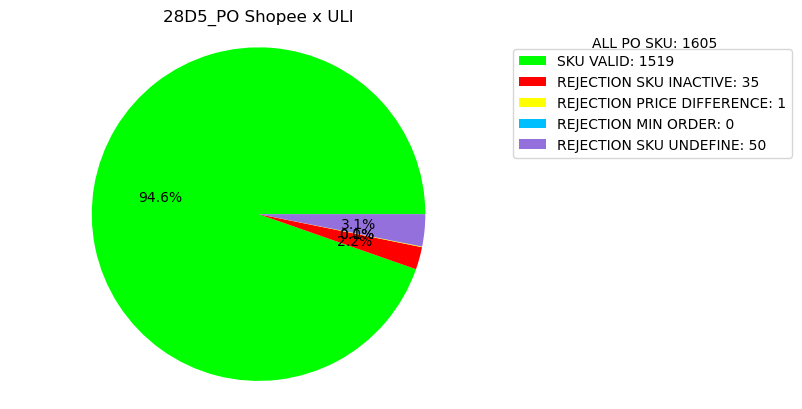

In [315]:
colors = ['#00FF00', '#FF0000', 'yellow', '#00BFFF', '#9370DB']

plt.pie(data_chart, autopct='%1.1f%%', colors=colors)
plt.axis('equal')
plt.title('28D5_PO Shopee x ULI')

jumlah_all_po_sku = len(df)
plt.text(2, 1, f"ALL PO SKU: {jumlah_all_po_sku}", fontsize=10, ha='left')

legend_labels = [
    'SKU VALID: {}'.format(submit_sku),
    'REJECTION SKU INACTIVE: {}'.format(rejection_SKUinactive),
    'REJECTION PRICE DIFFERENCE: {}'.format(rejection_Pricediff),
    'REJECTION MIN ORDER: {}'.format(rejectionMinorder),
    'REJECTION SKU UNDEFINE: {}'.format(rejectionUndefine)
]
plt.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.8))

plt.savefig('28D5_pieChart.png', bbox_inches='tight')
plt.show()

In [316]:
#save chart ke sheet -> done

In [317]:
#Pie chart copy to excel
workbook = openpyxl.load_workbook('28D5_Final PO Shopee - ULI.xlsx')
sheet_all_po_sku = workbook['ALL PO SKU']
img = openpyxl.drawing.image.Image('28D5_pieChart.png')
img.anchor = sheet_all_po_sku.cell(row=5, column=sheet_all_po_sku.max_column + 2).coordinate
sheet_all_po_sku.add_image(img)

workbook.save('28D5_Final PO Shopee - ULI.xlsx')

In [318]:
#SPIKE ORDER ANALYSIS

In [319]:
file_processing = 'PO Shopee x ULI Template Processing.xlsx'

In [320]:
df = pd.read_excel(file_processing, sheet_name='proses')

In [321]:
df.head()

unicode  unicodeNewMaterial                     PR ID Warehouse  \
0  689430809105                9105  PRIDORIDDPR1202306080467    IDDPR1   
1  678469809105                9105  PRIDORIDDPR1202306080467    IDDPR1   
2  684436059105                9105  PRIDORIDDPR1202306080467    IDDPR1   
3  695662839105                9105  PRIDORIDDPR1202306080467    IDDPR1   
4  685714489105                9105  PRIDORIDDPR1202306080467    IDDPR1   

   PR Creation Date Request Delivery Date             Shopee SKU ID  \
0  2023-06-08 19:21            15/06/2023   10017589503_66371268728   
1  2023-06-08 19:21            15/06/2023   10117589547_56371296666   
2  2023-06-08 19:21            15/06/2023   10117589719_76371296729   
3  2023-06-08 19:21            15/06/2023  10552144813_112655502191   
4  2023-06-08 19:21            15/06/2023   10617589637_93375856118   

                                     Shopee SKU Name Is Gift  \
0  Citra Night Collagen Glow Hand & Body Lotion 2...       N   
1  Ponds Age Miracle Anti Aging Day Cream Whip Mo...       N   
2  Vaseline Healthy Bright Vitamin Body Serum Sof...       N   
3  AXE MEN DEODORANT BODY SPRAY BLACK 135ML:Deodo...       N   
4  VASELINE Lip Care Tinted Lip Balm Rosy Tinted ...       N   

   Shopee Requested Qty (unit)  Supplier Confirmed Qty (unit)  \
0                           24                            NaN   
1                           12                            NaN   
2                           24                            NaN   
3                           24                            NaN   
4                          228                            NaN   

   Shopee Requested Qty (pcs) Unit Name  Shopee Request Price (before-tax)  \
0                          24       Pcs                           23746.55   
1                          12       Pcs                          142391.54   
2                          24       Pcs                           15465.46   
3                          24       Pcs                           29273.91   
4                         228       Pcs                           23138.38   

   Shopee Request Price (after-tax)  Supplier Confirmed Price (after-tax)  \
0                          26358.67                                   NaN   
1                         158054.61                                   NaN   
2                          17166.66                                   NaN   
3                          32494.04                                   NaN   
4                          25683.60                                   NaN   

   Tax %  Total Value Shopee (excl VAT)  Total Value Shopee (incl VAT)  \
0     11                      569917.20                      632608.09   
1     11                     1708698.48                     1896655.31   
2     11                      371171.04                      411999.85   
3     11                      702573.84                      779856.96   
4     11                     5275550.64                     5855861.21   

   Updated Supplier SKU ID     EAN / UPC  Updated EAN / UPC  MOQ  Updated MOQ  \
0                      NaN  9.000000e+12                NaN   24          NaN   
1                      NaN  4.800888e+12                NaN   12          NaN   
2                      NaN  9.000000e+12                NaN   24          NaN   
3                      NaN  9.000000e+12                NaN   12          NaN   
4                      NaN  9.000000e+12                NaN   12          NaN   

  Sourcing Status  Updated Sourcing Status  Next Available Date  \
0       AVAILABLE                      NaN                  NaN   
1       AVAILABLE                      NaN                  NaN   
2       AVAILABLE                      NaN                  NaN   
3       AVAILABLE                      NaN                  NaN   
4       AVAILABLE                      NaN                  NaN   

   Updated Next Available Date Selling Type   PC Code  \
0                          NaN

In [322]:
selected_orderCols = ['unicode', 'PR ID', 'PC Code', 'SKU Description', 'PLANT', 'Shopee Requested Qty (pcs)', 'Isi per Karton (UOM)', 'Konversi ke Karton', 'Request Delivery Date', 'Available PC CODE', 'QI Stock PC CODE', 'IT This wk PC CODE', 'IT Next wk PC CODE', 'RR_SO 13WK PC CODE', 'RR_ACT 13 WK PC CODE', 'RR_SO 5WK PC CODE', 'RR_ACT 5WK PC CODE']
spikeOrder = df[selected_orderCols]

In [323]:
spikeOrder.head() #Sheet spike order

unicode                     PR ID   PC Code  \
0  689430809105  PRIDORIDDPR1202306080467  68943080   
1  678469809105  PRIDORIDDPR1202306080467  67846980   
2  684436059105  PRIDORIDDPR1202306080467  68443605   
3  695662839105  PRIDORIDDPR1202306080467  69566283   
4  685714489105  PRIDORIDDPR1202306080467  68571448   

                           SKU Description  PLANT  Shopee Requested Qty (pcs)  \
0        CITRA HBL NIGHT GLOW UV 4X6X210ML   9105                          24   
1  PONDS AGE MRACLE WHIP DAY CREAM 4X3X50G   9105                          12   
2      VASELINE HB SOFT GLOW SRM 4X6X100ML   9105                          24   
3          AXE BLACK BODY SPRAY 1X12X135ML   9105                          24   
4    VASELINE LIP CARE ROSY TINTED 2X6X10G   9105                         228   

   Isi per Karton (UOM)  Konversi ke Karton Request Delivery Date  \
0                  24.0                 1.0            15/06/2023   
1                  12.0                 1.0            15/06/2023   
2                  24.0                 1.0            15/06/2023   
3                  12.0                 2.0            15/06/2023   
4                  12.0                19.0            15/06/2023   

   Available PC CODE  QI Stock PC CODE  IT This wk PC CODE  \
0              163.0               0.0                40.0   
1               12.0               0.0                20.0   
2              286.0               0.0                 0.0   
3              796.0               0.0               500.0   
4               -1.0               0.0               210.0   

   IT Next wk PC CODE  RR_SO 13WK PC CODE  RR_ACT 13 WK PC CODE  \
0                75.0           76.923077             67.615385   
1                 0.0           10.000000              9.846154   
2                 0.0           74.076923             72.307692   
3               580.0          183.769231            154.230769   
4                 0.0          242.307692            192.769231   

   RR_SO 5WK PC CODE  RR_ACT 5WK PC CODE  
0               91.0                81.4  
1                8.0                 8.0  
2               84.6                83.2  
3              244.4               198.6  
4              275.2               229.4

In [324]:
spikeOrder.dtypes

unicode                         int64
PR ID                          object
PC Code                         int64
SKU Description                object
PLANT                           int64
Shopee Requested Qty (pcs)      int64
Isi per Karton (UOM)          float64
Konversi ke Karton            float64
Request Delivery Date          object
Available PC CODE             float64
QI Stock PC CODE              float64
IT This wk PC CODE            float64
IT Next wk PC CODE            float64
RR_SO 13WK PC CODE            float64
RR_ACT 13 WK PC CODE          float64
RR_SO 5WK PC CODE             float64
RR_ACT 5WK PC CODE            float64
dtype: object

In [325]:
#function Remarks Spike Order

In [326]:
spikeOrder = spikeOrder.rename(columns={'Konversi ke Karton': 'Final Order Qty (Cs)'})

In [327]:
spikeOrder['Remarks by RR_SO 13WK'] = spikeOrder.apply(lambda row: 'ORDER SPIKE' if row['Final Order Qty (Cs)'] >= row['RR_SO 13WK PC CODE'] else 'ORDER NORMAL', axis=1)

In [328]:
spikeOrder.head()

unicode                     PR ID   PC Code  \
0  689430809105  PRIDORIDDPR1202306080467  68943080   
1  678469809105  PRIDORIDDPR1202306080467  67846980   
2  684436059105  PRIDORIDDPR1202306080467  68443605   
3  695662839105  PRIDORIDDPR1202306080467  69566283   
4  685714489105  PRIDORIDDPR1202306080467  68571448   

                           SKU Description  PLANT  Shopee Requested Qty (pcs)  \
0        CITRA HBL NIGHT GLOW UV 4X6X210ML   9105                          24   
1  PONDS AGE MRACLE WHIP DAY CREAM 4X3X50G   9105                          12   
2      VASELINE HB SOFT GLOW SRM 4X6X100ML   9105                          24   
3          AXE BLACK BODY SPRAY 1X12X135ML   9105                          24   
4    VASELINE LIP CARE ROSY TINTED 2X6X10G   9105                         228   

   Isi per Karton (UOM)  Final Order Qty (Cs) Request Delivery Date  \
0                  24.0                   1.0            15/06/2023   
1                  12.0                   1.0            15/06/2023   
2                  24.0                   1.0            15/06/2023   
3                  12.0                   2.0            15/06/2023   
4                  12.0                  19.0            15/06/2023   

   Available PC CODE  QI Stock PC CODE  IT This wk PC CODE  \
0              163.0               0.0                40.0   
1               12.0               0.0                20.0   
2              286.0               0.0                 0.0   
3              796.0               0.0               500.0   
4               -1.0               0.0               210.0   

   IT Next wk PC CODE  RR_SO 13WK PC CODE  RR_ACT 13 WK PC CODE  \
0                75.0           76.923077             67.615385   
1                 0.0           10.000000              9.846154   
2                 0.0           74.076923             72.307692   
3               580.0          183.769231            154.230769   
4                 0.0          242.307692            192.769231   

   RR_SO 5WK PC CODE  RR_ACT 5WK PC CODE Remarks by RR_SO 13WK  
0               91.0                81.4          ORDER NORMAL  
1                8.0                 8.0          ORDER NORMAL  
2               84.6                83.2          ORDER NORMAL  
3              244.4               198.6          ORDER NORMAL  
4              275.2               229.4          ORDER NORMAL

In [329]:
spikeOrder.to_excel('28D5_Shopee Spike Order Report.xlsx', sheet_name='Result', index=False)

In [330]:
FileLink('PO Shopee x ULI Template Processing.xlsx')

C:\Users\Kelvin-Kurniawan.ULI\Kelvin_Project\PO Shopee x ULI\PO Shopee x ULI Template Processing.xlsx

In [331]:
FileLink('28D5_Final PO Shopee - ULI.xlsx')

C:\Users\Kelvin-Kurniawan.ULI\Kelvin_Project\PO Shopee x ULI\28D5_Final PO Shopee - ULI.xlsx

In [332]:
FileLink('28D5_Shopee Spike Order Report.xlsx')

C:\Users\Kelvin-Kurniawan.ULI\Kelvin_Project\PO Shopee x ULI\28D5_Shopee Spike Order Report.xlsx